## Código del proyecto


## 1. ELEGIR TEMÁTICA

La temática estará relacionada con las platas solares fotovoltaicas en Europa.
Me gustaría conocer si los países europeos que apuestan por está energía renovable es únicamente por la irradiancia solar que reciben o si hay algún parámetro más que afecte.


## 2. OBTENCIÓN DE DATOS

He buscado en las siguientes plataformas que datos hay disponibles para Europa:

-	https://datacommons.org/

	Población total, Esperanza de vida, Personas desempleadas, Nivel de educación, Generación anual de energía solar, Capacidad instalada de energía solar, Flujo financiero de apoyo a la energía solar, Precipitación media, Superficie país
-	https://datacatalog.worldbank.org

	Irradiancia solar, Desarrollo humano, PIB, Consumo energía, Coste de construcción

	
En líneas generales, los datos estaban aceptables y manejables a excepción de la precipitación media. Estos datos han tenido que ser buscados en reiteradas ocasiones puesto que no eran representativos. 
Con el resto de los datos no se han necesitado hacer más búsquedas.


## 3. DEFINICIÓN DE HIPÓTESIS

Las plantas fotovoltaicas...
-	¿Dependen exclusivamente de la irradiación horizontal global (GHI)?
-	¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
-	¿Dependerá del tipo de población?
    	Habitantes / km2, Desarrollo humano, Consumo energético medio
-	¿Dependerá del clima?
    	Precipitaciones medias
-	¿Dependerá de la superficie del país?
        Superficie km2
-	¿Dependerá de parámetros económicos?
        PIB, Coste de construcción


## 4. PROCESADO DE DATOS

Importamos bibliotecas

In [58]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Cargamos archivos e informacion, en el proyecto del EDA ya limpiamos los datos. Solo nos quedamos con los paises Europeos.

In [59]:

# Ruta info de irradiancia
file_path = "./src/data/df_eu_final.csv"
df_ = pd.read_csv(file_path, header=0)

In [60]:
df_.head(2)

Unnamed: 0     País  Población (hab)  Área país (km²)  \
0           0  Albania          2866376          27400.0   
1           2  Armenia          2951776          28470.0   

   Desarrollo humano (%)    PIB (USD)  Precipitación media (mm)  \
0               0.784911  5253.630064                    1485.0   
1               0.755113  4212.070943                     562.0   

   Irradiancia global horizontal (kWh/m²/día)  Coste construcción (USD/kWh)  \
0                                      4.1954                        0.1051   
1                                      4.2241                        0.1038   

   Capacidad instalada (Wp per cápita)  Consumo energía (kWh per cápita)  \
0                             0.348873                       2309.366503   
1                             5.860878                       1961.610395   

   Precio tarifa luz (USD/kWh)  
0                          8.7  
1                          7.6

In [61]:
df_.drop(columns = "Unnamed: 0", inplace = True)

## 6. EXPLORATORIO Y VISUALIZACIÓN

Análisis exploratorio

In [62]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   País                                        39 non-null     object 
 1   Población (hab)                             39 non-null     int64  
 2   Área país (km²)                             39 non-null     float64
 3   Desarrollo humano (%)                       39 non-null     float64
 4   PIB (USD)                                   39 non-null     float64
 5   Precipitación media (mm)                    39 non-null     float64
 6   Irradiancia global horizontal (kWh/m²/día)  39 non-null     float64
 7   Coste construcción (USD/kWh)                39 non-null     float64
 8   Capacidad instalada (Wp per cápita)         39 non-null     float64
 9   Consumo energía (kWh per cápita)            39 non-null     float64
 10  Precio tarifa lu

In [63]:
df_.describe()

Población (hab)  Área país (km²)  Desarrollo humano (%)      PIB (USD)  \
count     3.900000e+01     3.900000e+01              39.000000      39.000000   
mean      1.802926e+07     2.272659e+05               0.858174   30271.577083   
std       2.375618e+07     4.474004e+05               0.062661   26234.056586   
min       4.835300e+05     3.200000e+02               0.699753    3095.173581   
25%       3.248830e+06     3.660300e+04               0.812099    9321.206534   
50%       8.847037e+06     8.252300e+04               0.868784   22927.744417   
75%       1.775376e+07     2.680350e+05               0.905847   44523.732001   
max       8.292792e+07     2.699700e+06               0.952522  114340.498742   

       Precipitación media (mm)  Irradiancia global horizontal (kWh/m²/día)  \
count                 39.000000                                   39.000000   
mean                 690.230769                                    3.511308   
std                  394.382560                                    0.711955   
min                    0.000000                                    2.533000   
25%                  561.000000                                    2.940650   
50%                  637.000000                                    3.452200   
75%                  860.500000                                    3.957550   
max                 1537.000000                                    5.210400   

       Coste construcción (USD/kWh)  Capacidad instalada (Wp per cápita)  \
count                     39.000000                            39.000000   
mean                       0.112636                           112.571405   
std                        0.018146                           125.280171   
min                        0.067300                             0.348873   
25%                        0.103900                            12.122657   
50%                        0.116300                            68.073972   
75%                        0.124100                           183.830696   
max                        0.152100                           553.854467   

       Consumo energía (kWh per cápita)  Precio tarifa luz (USD/kWh)  
count                         39.000000                    39.000000  
mean                        5727.721353                    13.310256  
std                         3845.878574                     5.921006  
min                         1386.234439                     5.000000  
25%                         3697.180914                     9.300000  
50%                         5002.406680                    12.100000  
75%                         6720.387030                    17.100000  
max                        22999.934595                    32.200000

Estudiamos la cardinalidad

In [64]:
#Cardinalidad funcion
def cardinalidad(df,categoria = 10, continua = 30):
    # Nuevo df con columnas, cardinalidades, % variación cardinalidad, tipo de dato y variables
    df_cardi = pd.DataFrame([df.columns, df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_cardi = df_cardi.T 
    df_cardi = df_cardi.rename(columns = {0:"Columnas" , 1:"Cardinalidad", 2: "Porcentaje_Cardi", 3: "Tipo_dato"}) 

    # Corrección para cuando solo tengo un valor
    df_cardi.loc[df_cardi["Cardinalidad"] == 1, "Porcentaje_Cardi"] = 0.00

    # Tipo de variables
    df_cardi["Variable"] = "Categorica"
    df_cardi.loc[df_cardi["Cardinalidad"] == 2, "Variable"] = "Binaria"
    df_cardi.loc[df_cardi["Cardinalidad"] >= categoria, "Variable"] = "Numerica discreta"
    df_cardi.loc[df_cardi["Porcentaje_Cardi"] >= continua, "Variable"] = "Numerica continua"

    return df_cardi


In [65]:
df_eu_cardi = cardinalidad(df_)
df_eu_cardi

Columnas Cardinalidad Porcentaje_Cardi  \
0                                         País           39            100.0   
1                              Población (hab)           39            100.0   
2                              Área país (km²)           39            100.0   
3                        Desarrollo humano (%)           39            100.0   
4                                    PIB (USD)           39            100.0   
5                     Precipitación media (mm)           35         89.74359   
6   Irradiancia global horizontal (kWh/m²/día)           39            100.0   
7                 Coste construcción (USD/kWh)           35         89.74359   
8          Capacidad instalada (Wp per cápita)           39            100.0   
9             Consumo energía (kWh per cápita)           39            100.0   
10                 Precio tarifa luz (USD/kWh)           37        94.871795   

   Tipo_dato           Variable  
0     object  Numerica continua  
1      int64  Numerica continua  
2    float64  Numerica continua  
3    float64  Numerica continua  
4    float64  Numerica continua  
5    float64  Numerica continua  
6    float64  Numerica continua  
7    float64  Numerica continua  
8    float64  Numerica continua  
9    float64  Numerica continua  
10   float64  Numerica continua

In [66]:
#Vemos que Pais deberia ser categorica
cond = df_eu_cardi["Columnas"] == "País"
df_eu_cardi.loc[cond, "Variable"] = "Categorica"
df_eu_cardi


Columnas Cardinalidad Porcentaje_Cardi  \
0                                         País           39            100.0   
1                              Población (hab)           39            100.0   
2                              Área país (km²)           39            100.0   
3                        Desarrollo humano (%)           39            100.0   
4                                    PIB (USD)           39            100.0   
5                     Precipitación media (mm)           35         89.74359   
6   Irradiancia global horizontal (kWh/m²/día)           39            100.0   
7                 Coste construcción (USD/kWh)           35         89.74359   
8          Capacidad instalada (Wp per cápita)           39            100.0   
9             Consumo energía (kWh per cápita)           39            100.0   
10                 Precio tarifa luz (USD/kWh)           37        94.871795   

   Tipo_dato           Variable  
0     object         Categorica  
1      int64  Numerica continua  
2    float64  Numerica continua  
3    float64  Numerica continua  
4    float64  Numerica continua  
5    float64  Numerica continua  
6    float64  Numerica continua  
7    float64  Numerica continua  
8    float64  Numerica continua  
9    float64  Numerica continua  
10   float64  Numerica continua

In [67]:
#Añadimos al dataframe, Descripcion, Importancia
descripcion = ["Pais en ingles",
                "Habitantes",
                "Superficie",
                "Indicador donde 100 es el máximo desarrollo",
                "Producto Interior Bruto del pais en dolares", 
                "Precipitacion media",
                "Irraciandia global horizonal",
                "Coste de implantación (kWh), a menor coste más rentabilidad",
                "(Wp per capita) Capacidad ya instalada en el pais",
                "Consumo energía de la población",
                "Precio de tarifa de la luz"]
importancia =  ["0",
                "2",
                "1", 
                "2",
                "2",
                "1", 
                "1",
                "0",
                "0",
                "2",
                "2"]
df_eu_cardi.insert(1,"Descripción", descripcion )
df_eu_cardi.insert(2,"Importancia", importancia )
df_eu_cardi


Columnas  \
0                                         País   
1                              Población (hab)   
2                              Área país (km²)   
3                        Desarrollo humano (%)   
4                                    PIB (USD)   
5                     Precipitación media (mm)   
6   Irradiancia global horizontal (kWh/m²/día)   
7                 Coste construcción (USD/kWh)   
8          Capacidad instalada (Wp per cápita)   
9             Consumo energía (kWh per cápita)   
10                 Precio tarifa luz (USD/kWh)   

                                          Descripción Importancia  \
0                                      Pais en ingles           0   
1                                          Habitantes           2   
2                                          Superficie           1   
3         Indicador donde 100 es el máximo desarrollo           2   
4         Producto Interior Bruto del pais en dolares           2   
5                                 Precipitacion media           1   
6                        Irraciandia global horizonal           1   
7   Coste de implantación (kWh), a menor coste más...           0   
8   (Wp per capita) Capacidad ya instalada en el pais           0   
9                     Consumo energía de la población           2   
10                         Precio de tarifa de la luz           2   

   Cardinalidad Porcentaje_Cardi Tipo_dato           Variable  
0            39            100.0    object         Categorica  
1            39            100.0     int64  Numerica continua  
2            39            100.0   float64  Numerica continua  
3            39            100.0   float64  Numerica continua  
4            39            100.0   float64  Numerica continua  
5            35         89.74359   float64  Numerica continua  
6            39            100.0   float64  Numerica continua  
7            35         89.74359   float64  Numerica continua  
8            39            100.0   float64  Numerica continua  
9            39            100.0   float64  Numerica continua  
10           37        94.871795   float64  Numerica continua

In [68]:
#Añadimos infice al dataframe final INDICE
df_sin_index = df_.copy()
df_index = df_.copy()


In [69]:
df_index.head(2)

País  Población (hab)  Área país (km²)  Desarrollo humano (%)  \
0  Albania          2866376          27400.0               0.784911   
1  Armenia          2951776          28470.0               0.755113   

     PIB (USD)  Precipitación media (mm)  \
0  5253.630064                    1485.0   
1  4212.070943                     562.0   

   Irradiancia global horizontal (kWh/m²/día)  Coste construcción (USD/kWh)  \
0                                      4.1954                        0.1051   
1                                      4.2241                        0.1038   

   Capacidad instalada (Wp per cápita)  Consumo energía (kWh per cápita)  \
0                             0.348873                       2309.366503   
1                             5.860878                       1961.610395   

   Precio tarifa luz (USD/kWh)  
0                          8.7  
1                          7.6

In [70]:
df_index.set_index("País", inplace= True)

In [71]:
df_index.head(2)

Población (hab)  Área país (km²)  Desarrollo humano (%)    PIB (USD)  \
País                                                                            
Albania          2866376          27400.0               0.784911  5253.630064   
Armenia          2951776          28470.0               0.755113  4212.070943   

         Precipitación media (mm)  Irradiancia global horizontal (kWh/m²/día)  \
País                                                                            
Albania                    1485.0                                      4.1954   
Armenia                     562.0                                      4.2241   

         Coste construcción (USD/kWh)  Capacidad instalada (Wp per cápita)  \
País                                                                         
Albania                        0.1051                             0.348873   
Armenia                        0.1038                             5.860878   

         Consumo energía (kWh per cápita)  Precio tarifa luz (USD/kWh)  
País                                                                    
Albania                       2309.366503                          8.7  
Armenia                       1961.610395                          7.6

Visualización de variables

Voy a dejar las variables con un # para que no se haga tan extenso el notebook, en el notebook codigo podeis encontrarlo

1 variable - Histograma y función densidad

In [72]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

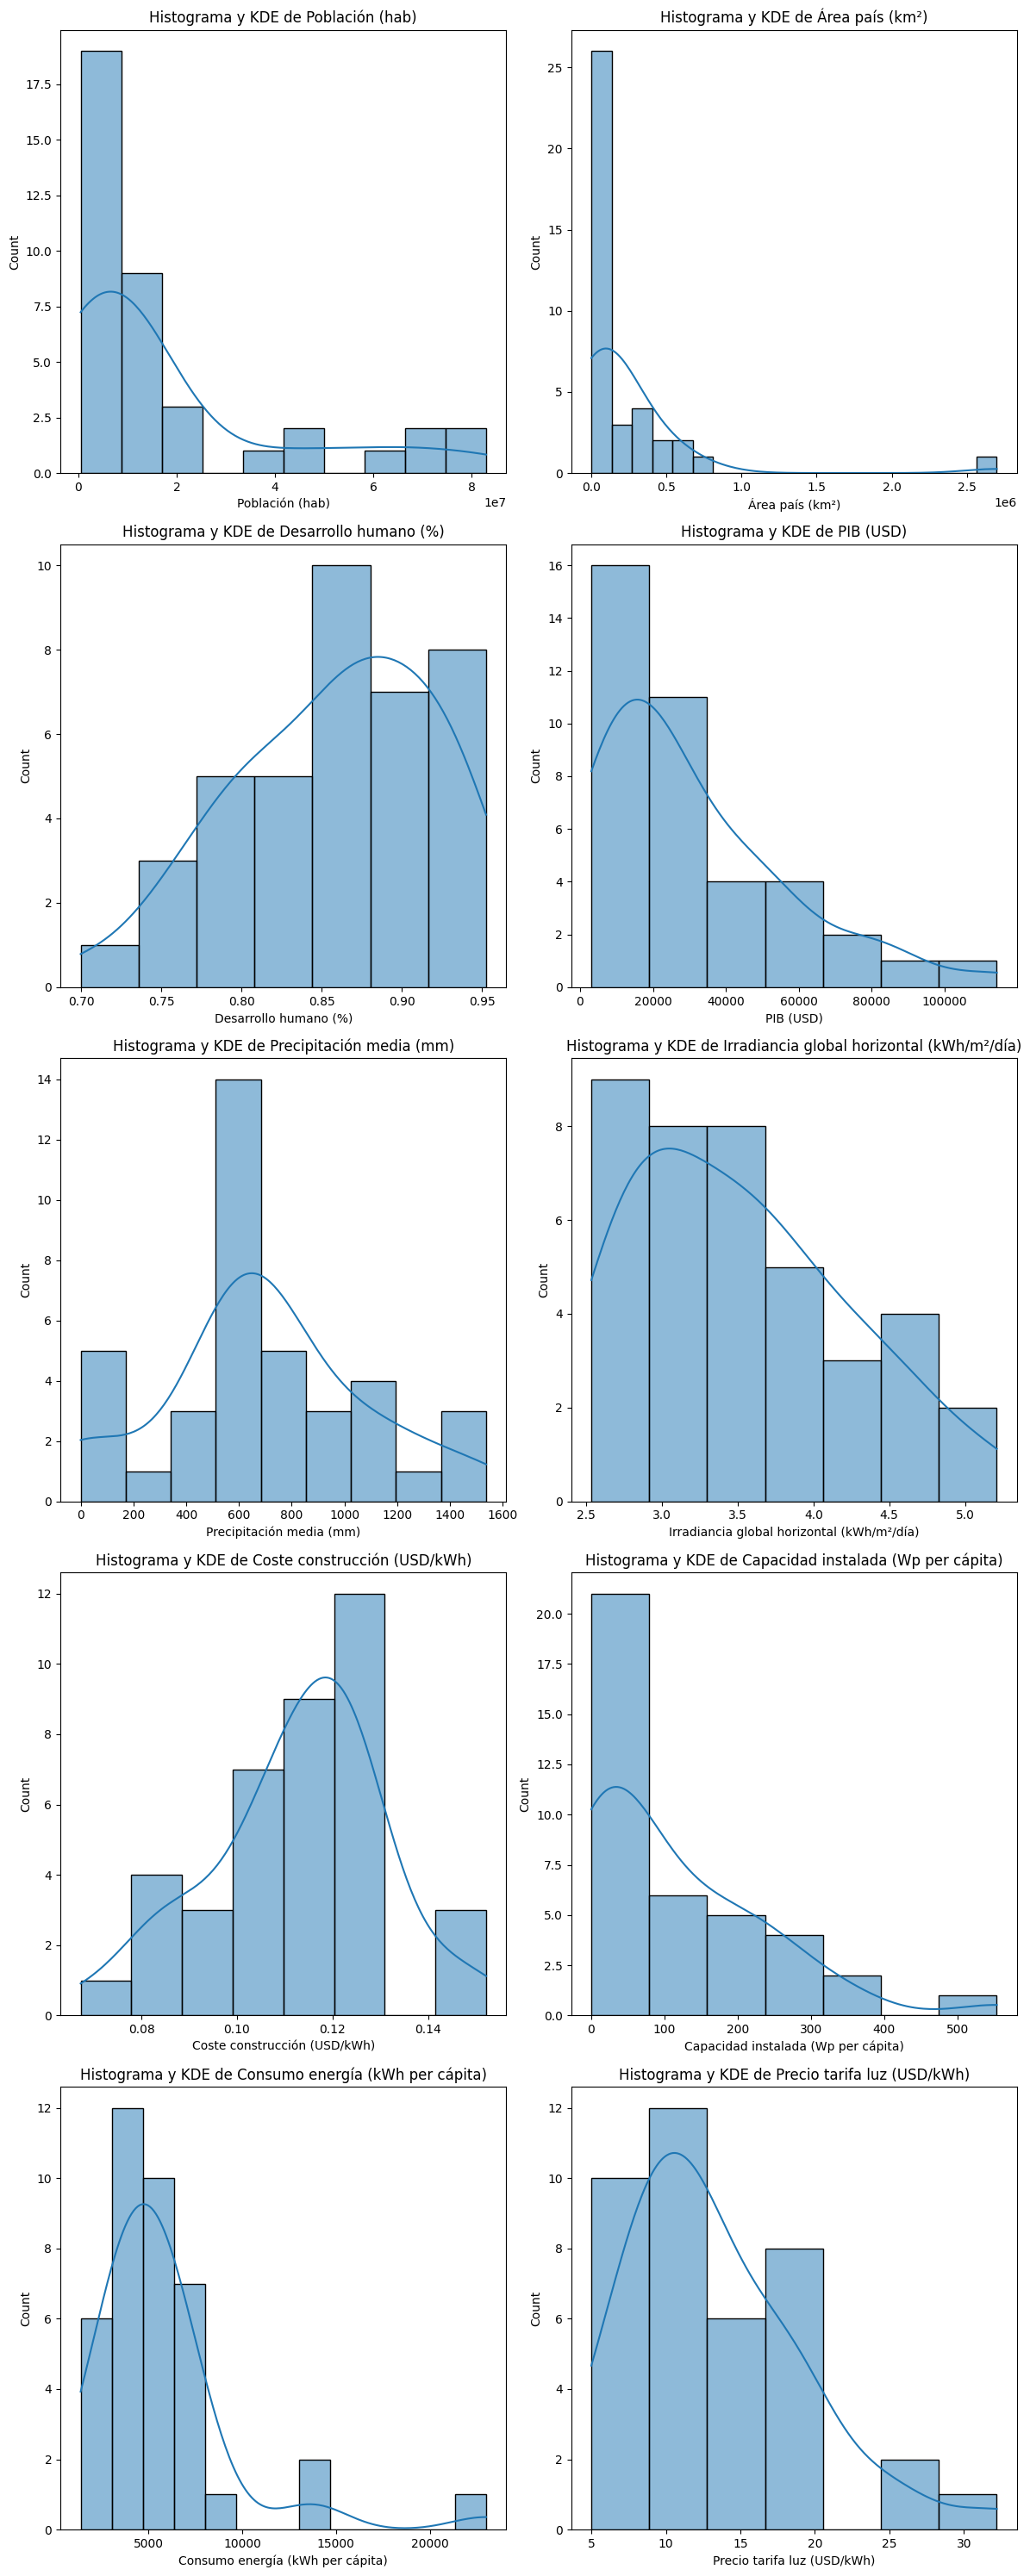

In [73]:
#Vemos todos los histogramas de df_eu_final
plot_histo_dens(df_index, df_index.columns)

In [74]:
#Estas gráficas no aportan mucha información. Necesitamos ver como se comportan en conjunto.

1 variable - Tratar las variables numericas como si fueran categoricas

In [75]:
#Función para Graficas de distribución categoricas 
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


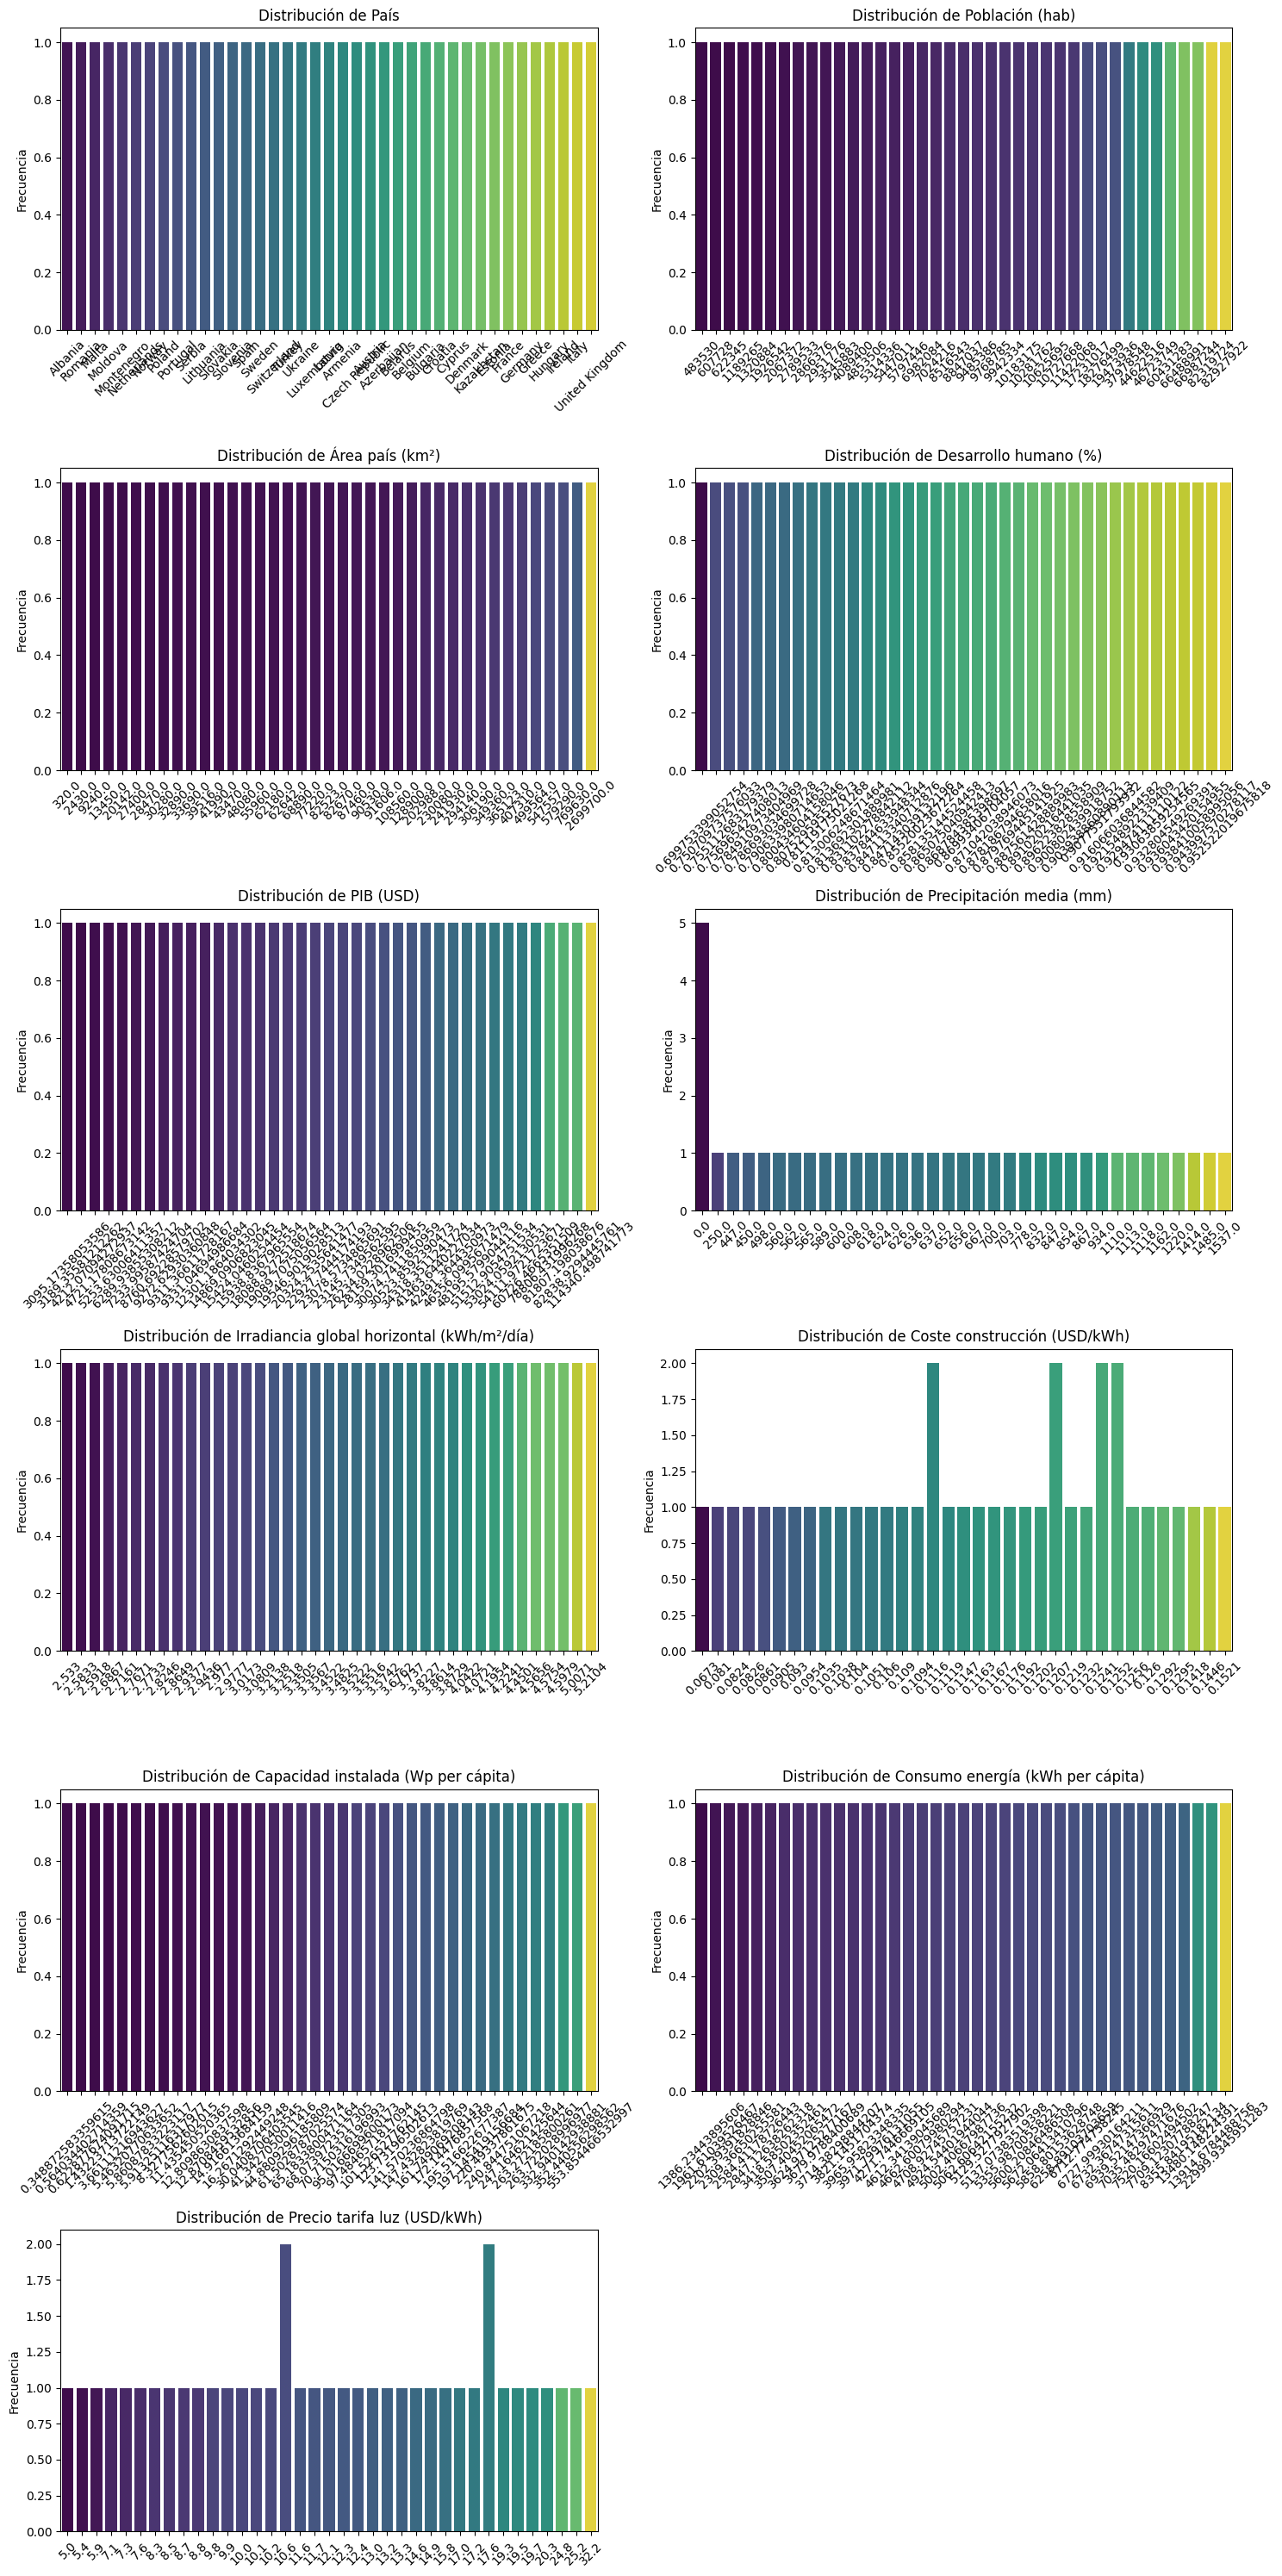

In [76]:
pinta_distribucion_categoricas(df_, df_.columns, relativa=False, mostrar_valores=False)
#Estas graficas apenas nos reportan info, tiene más importancia analizar bivariante

1 variable - Diagramas de cajas

In [77]:
#Función diagramas de caja
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

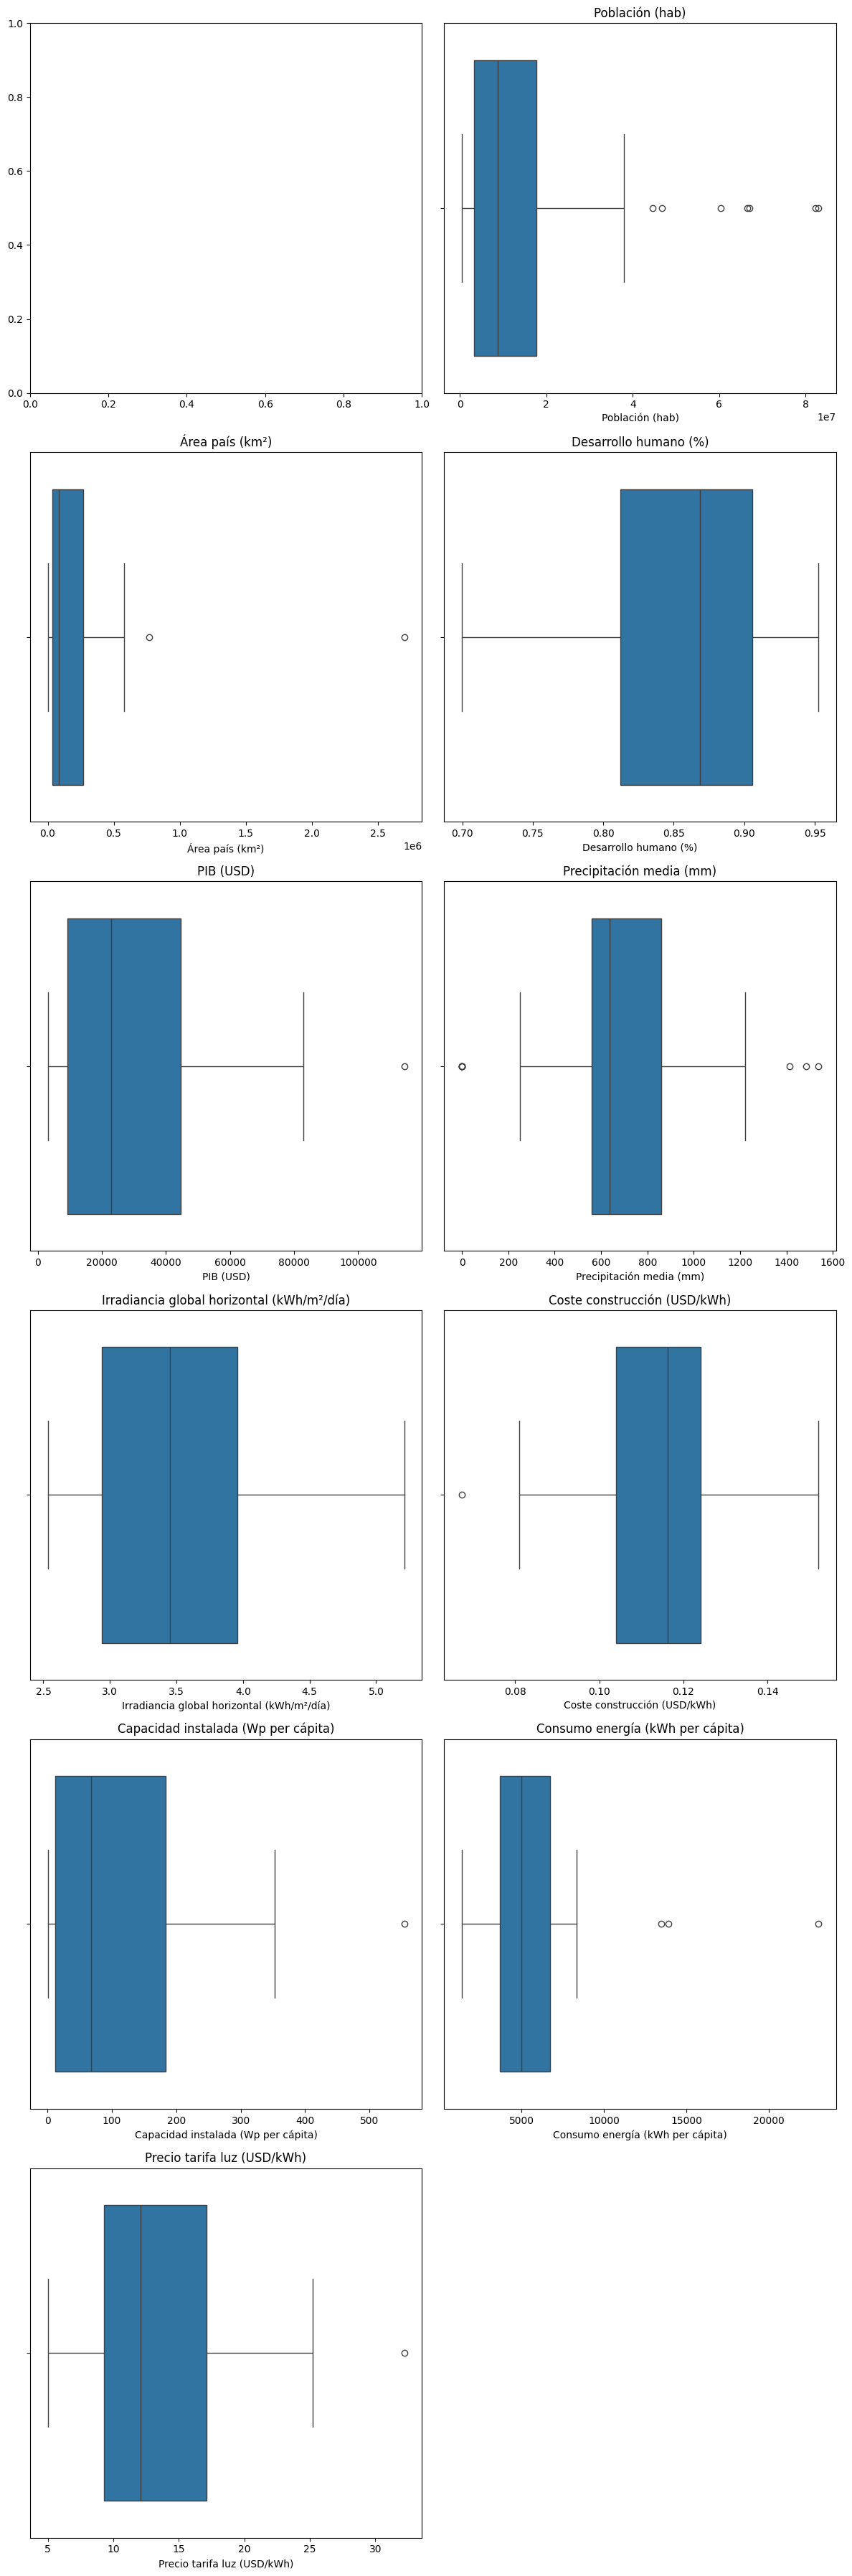

In [78]:
plot_multiple_boxplots(df_, df_.columns, dim_matriz_visual = 2)
#Vemos que hay pocos outliers, seguimos necesitando visión de conjunto

Matriz de correlación

<Axes: >

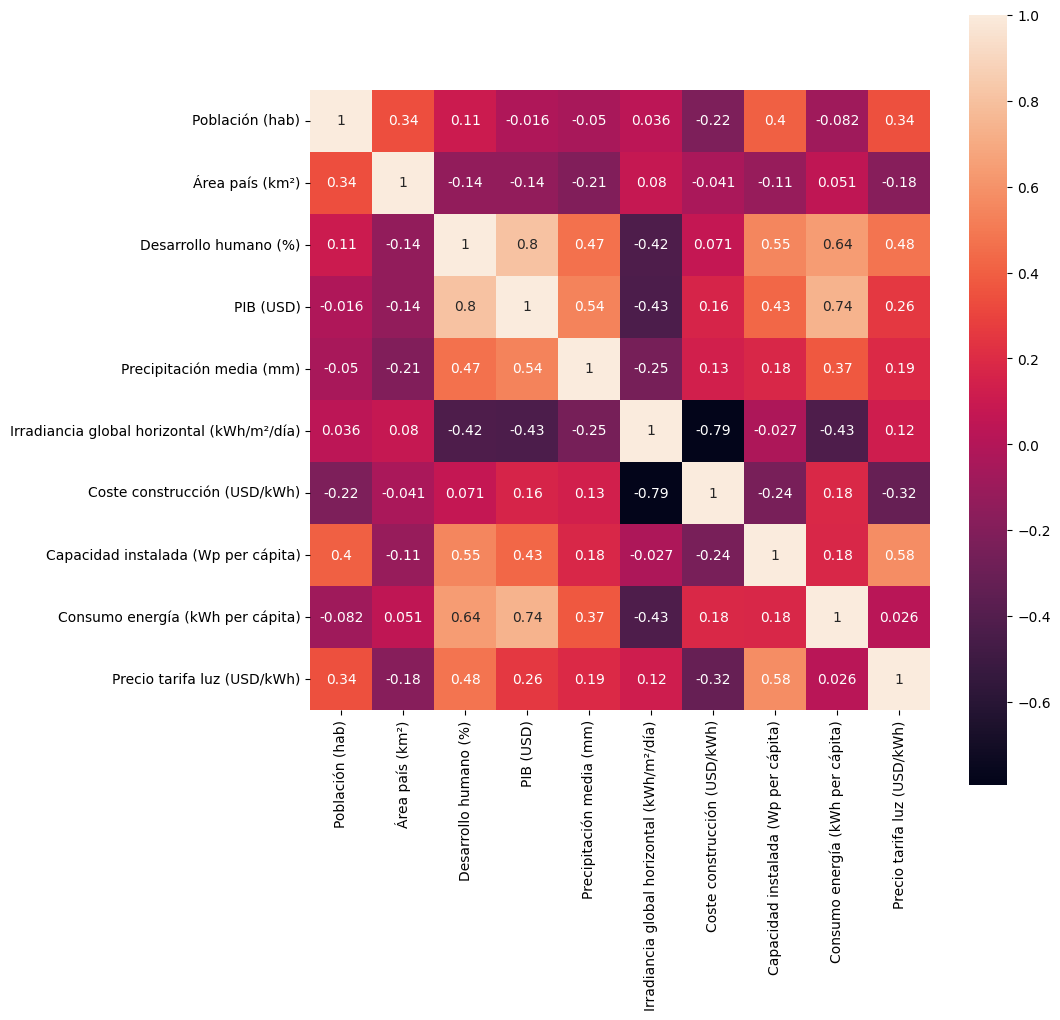

In [79]:
#Matriz de correlación
matriz_correlacion = df_index.corr()

matriz_correlacion
#Mapa calor
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacion,
            square=True, 
            annot=True)
#Aporta información pero no me gusta el formato

C:\Users\USER\AppData\Local\Temp\ipykernel_10728\2959423950.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


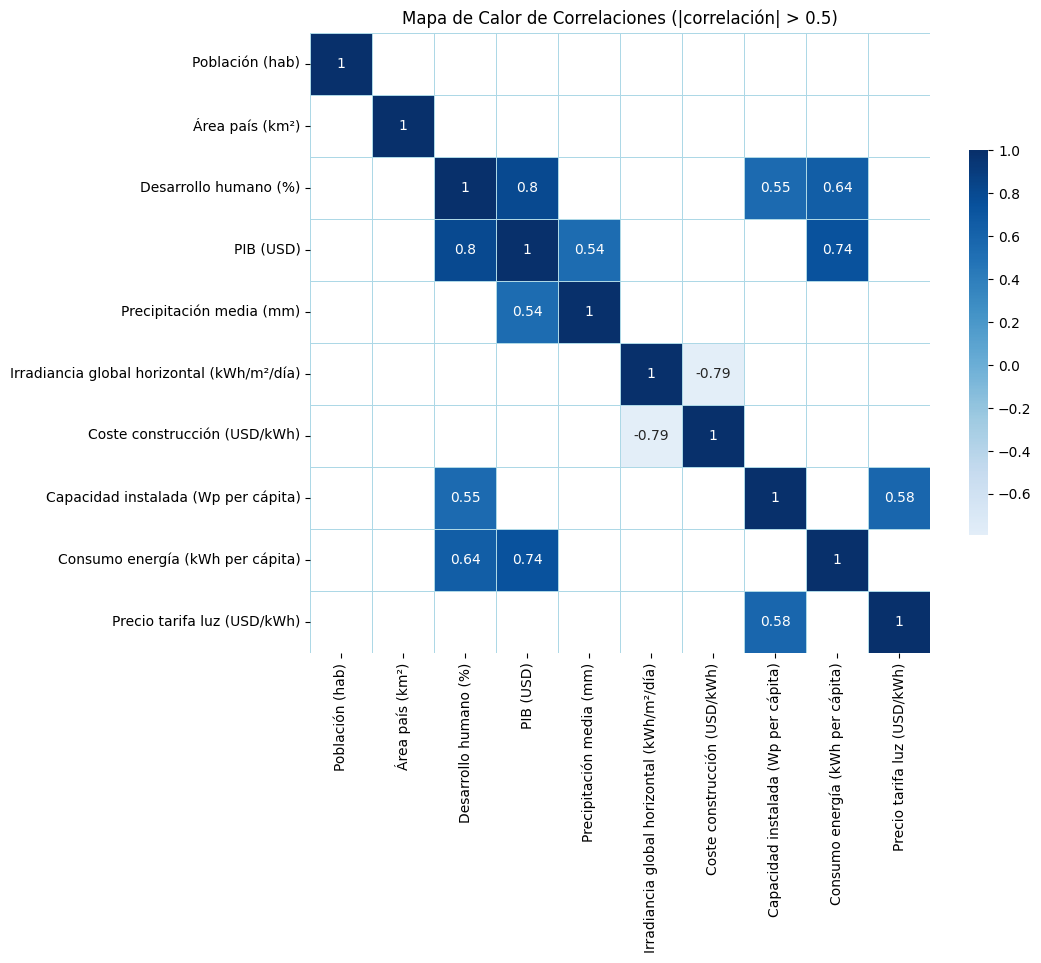

In [80]:
#Ver matriz de correlaciones solo valores más representativos
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()


mapa_calor_correlacion(df_index, 0.5)
#Esta imagen, ira a la presentación

Conclusiones del mapa de correlaciones
1. El coste economico de construir la planta y mantenerla es lo que determina junto con la irradiancia en qué paises se construira
2. El area del pais no tiene que ver, para colocar plantas fotovoltaicas
3. El PIB si que tiene una relación con las areas con instalaciones fotovoltaicas, 
4. Ver el consumo per capita
5. El aumento de precipitacion solo indica que hacen más consumo de luz


In [81]:
#Con esas conclusiones podemos empezar a buscar patrones
df_sin_index

País  Población (hab)  Área país (km²)  Desarrollo humano (%)  \
0          Albania          2866376          27400.0               0.784911   
1          Armenia          2951776          28470.0               0.755113   
2          Austria          8847037          82523.0               0.907755   
3       Azerbaijan          9942334          82670.0               0.756965   
4          Belarus          9485386         202988.0               0.807530   
5          Belgium         11422068          30280.0               0.916066   
6         Bulgaria          7024216         108560.0               0.813006   
7          Croatia          4089400          55960.0               0.831102   
8           Cyprus          1189265           9240.0               0.868784   
9   Czech Republic         10625695          77220.0               0.887561   
10         Denmark          5797446          41990.0               0.929474   
11         Estonia          1320884          43470.0               0.871042   
12          France         66987244         547557.0               0.900802   
13         Germany         82927922         349360.0               0.936043   
14          Greece         10727668         128900.0               0.869934   
15         Hungary          9768785          90530.0               0.837845   
16         Ireland          4853506          68890.0               0.938410   
17           Italy         60431283         294140.0               0.879769   
18      Kazakhstan         18276499        2699700.0               0.800435   
19          Latvia          1926542          62180.0               0.847143   
20       Lithuania          2789533          62642.0               0.858135   
21      Luxembourg           607728           2430.0               0.903939   
22           Malta           483530            320.0               0.878187   
23         Moldova          3545883          32890.0               0.699753   
24      Montenegro           622345          13450.0               0.813692   
25     Netherlands         17231017          33690.0               0.930639   
26          Norway          5314336         365123.0               0.952522   
27          Poland         37978548         306190.0               0.865075   
28        Portugal         10281762          91606.0               0.847113   
29         Romania         19473936         230080.0               0.811192   
30          Serbia          6982084          87460.0               0.786693   
31        Slovakia          5447011          48080.0               0.855200   
32        Slovenia          2067372          20142.0               0.896224   
33           Spain         46723749         499564.0               0.891020   
34          Sweden         10183175         407310.0               0.932805   
35     Switzerland          8516543          39516.0               0.943998   
36          Turkey         82319724         769630.0               0.790634   
37         Ukraine         44622516         579290.0               0.750710   
38  United Kingdom         66488991         241930.0               0.921549   

        PIB (USD)  Precipitación media (mm)  \
0     5253.630064                    1485.0   
1     4212.070943                     562.0   
2    51512.905475                    1110.0   
3     4721.178087                     447.0   
4     6289.938553                     618.0   
5    46556.099567                     847.0   
6     9272.629304                     608.0   
7    14869.090682                    1113.0   
8    28159.301700                     498.0   
9    23078.573487                       0.0   
10   60726.466535                     703.0   
11   22927.744417                     626.0   
12   41463.644023                     867.0   
13   48195.579904                     700.0   
14   20324.253564                     652.0   
15   15938.836797                     589.0   
16   78806.431996                    1118.0   
17   34

1 variable - Representación del mapa europeo

In [82]:
#Creamos una función para imprimir todos los mapas de golpe
def mapa_europa(df_index, df_no_index,dato):
    import geopandas as gpd
    import matplotlib.pyplot as plt

    # Cargar el shapefile del mundo
    gdf_mundo = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo.rename(columns={"NAME": "País"}, inplace=True)

    # Filtrar para mantener solo los países de Europa
    gdf_eu = gdf_mundo[gdf_mundo['CONTINENT'] == 'Europe']

    # Establecer el índice para poder unirlos
    gdf_eu.set_index("País", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_eu_final = gdf_eu.join(df_index, how="inner")

    # Filtrar para mantener solo los países presentes en df_eu
    gdf_eu_final = gdf_eu_final[gdf_eu_final.index.isin(df_no_index["País"])]

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_eu_final.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")
        
    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Dibujar el mapa de Europa con colores basados en 'dato'
    gdf_eu_final.plot(column=dato,
                        ax=ax,
                        legend=True,
                        legend_kwds={'label': dato,
                                     'orientation': "vertical"},
                        cmap ="Blues",
                        edgecolor='grey',
                        linewidth = 0.5)

    # Ajustar los detalles del mapa
    ax.set_title(dato)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa

    return plt.show()

Generando mapa para: Población (hab)


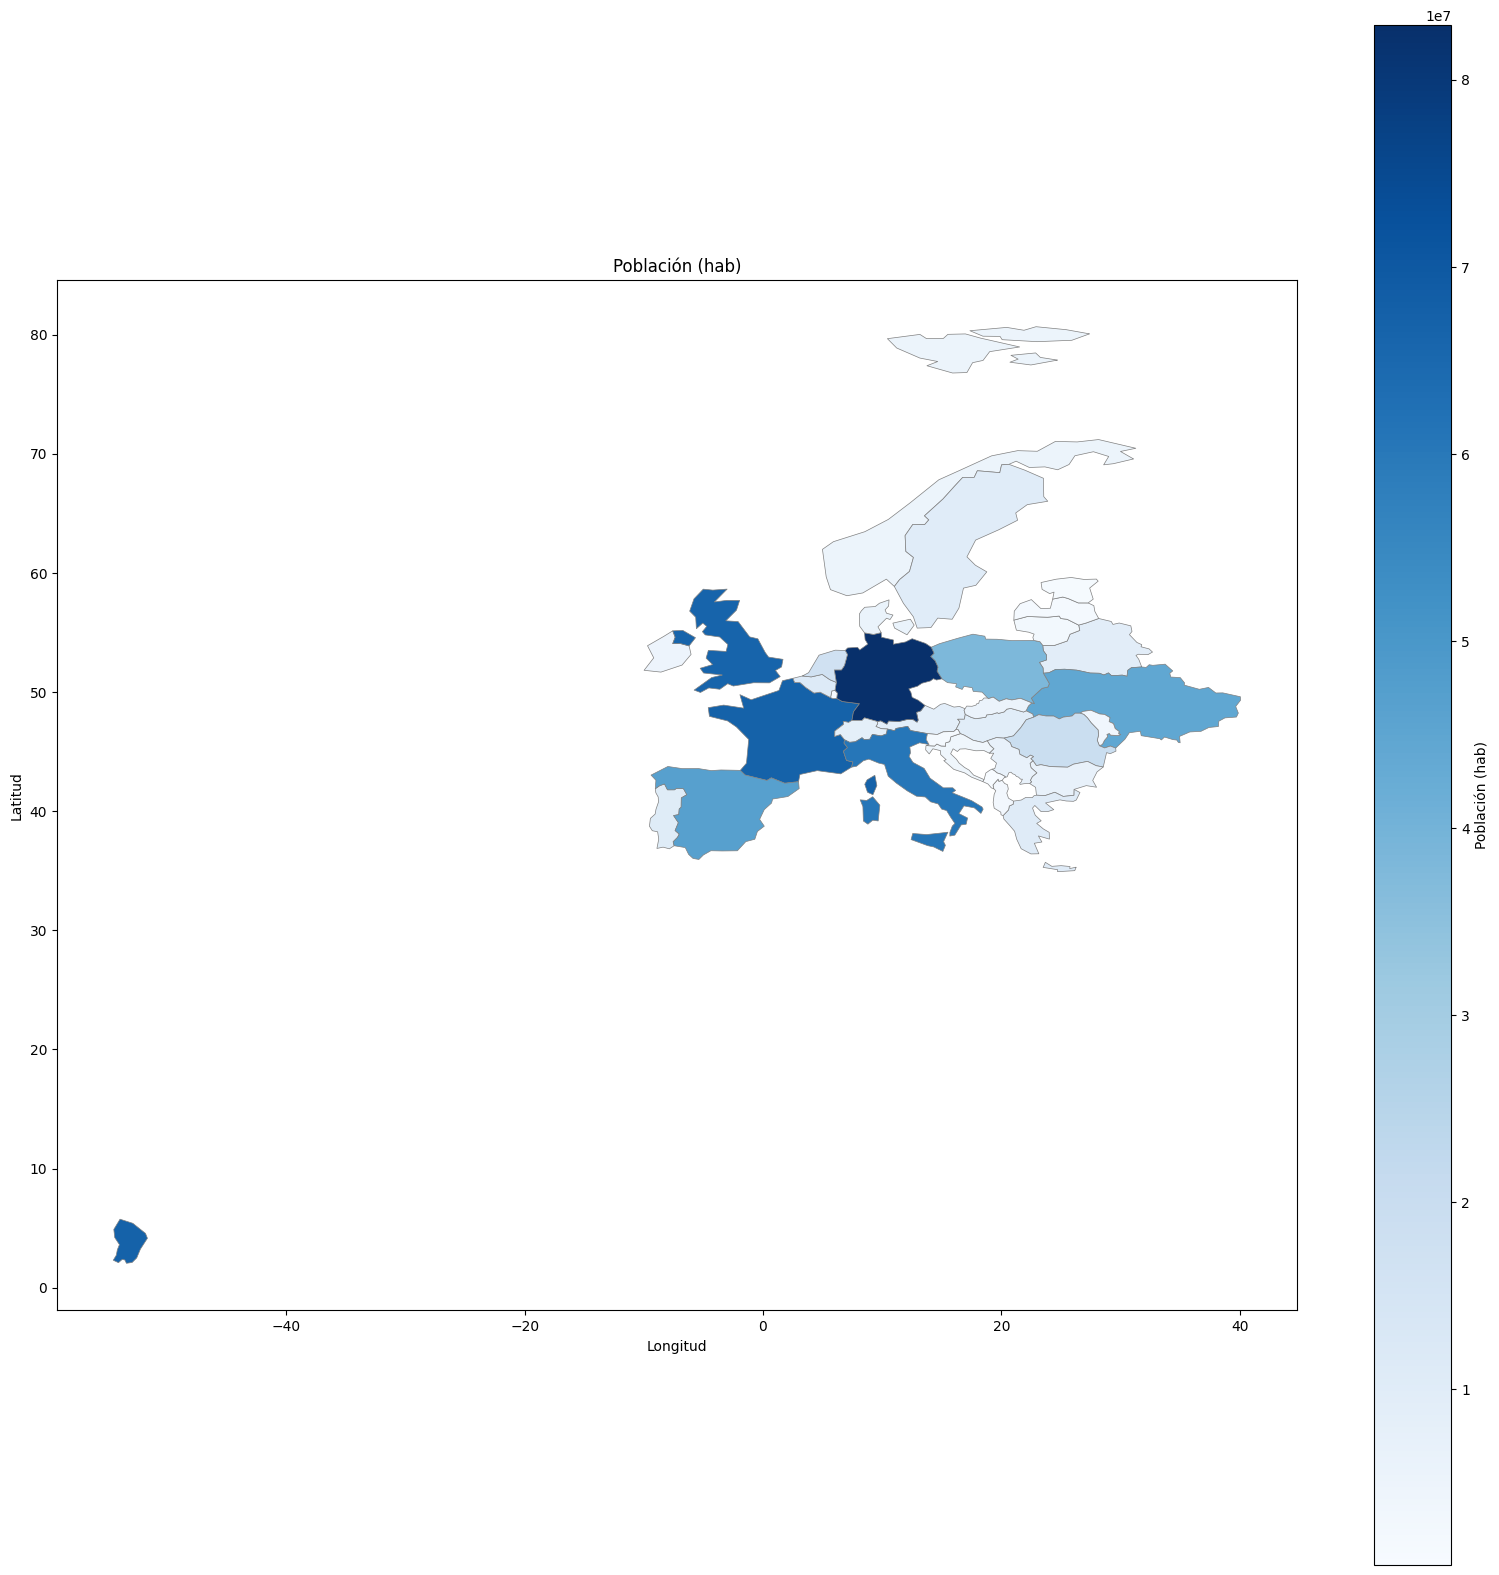

Generando mapa para: Área país (km²)


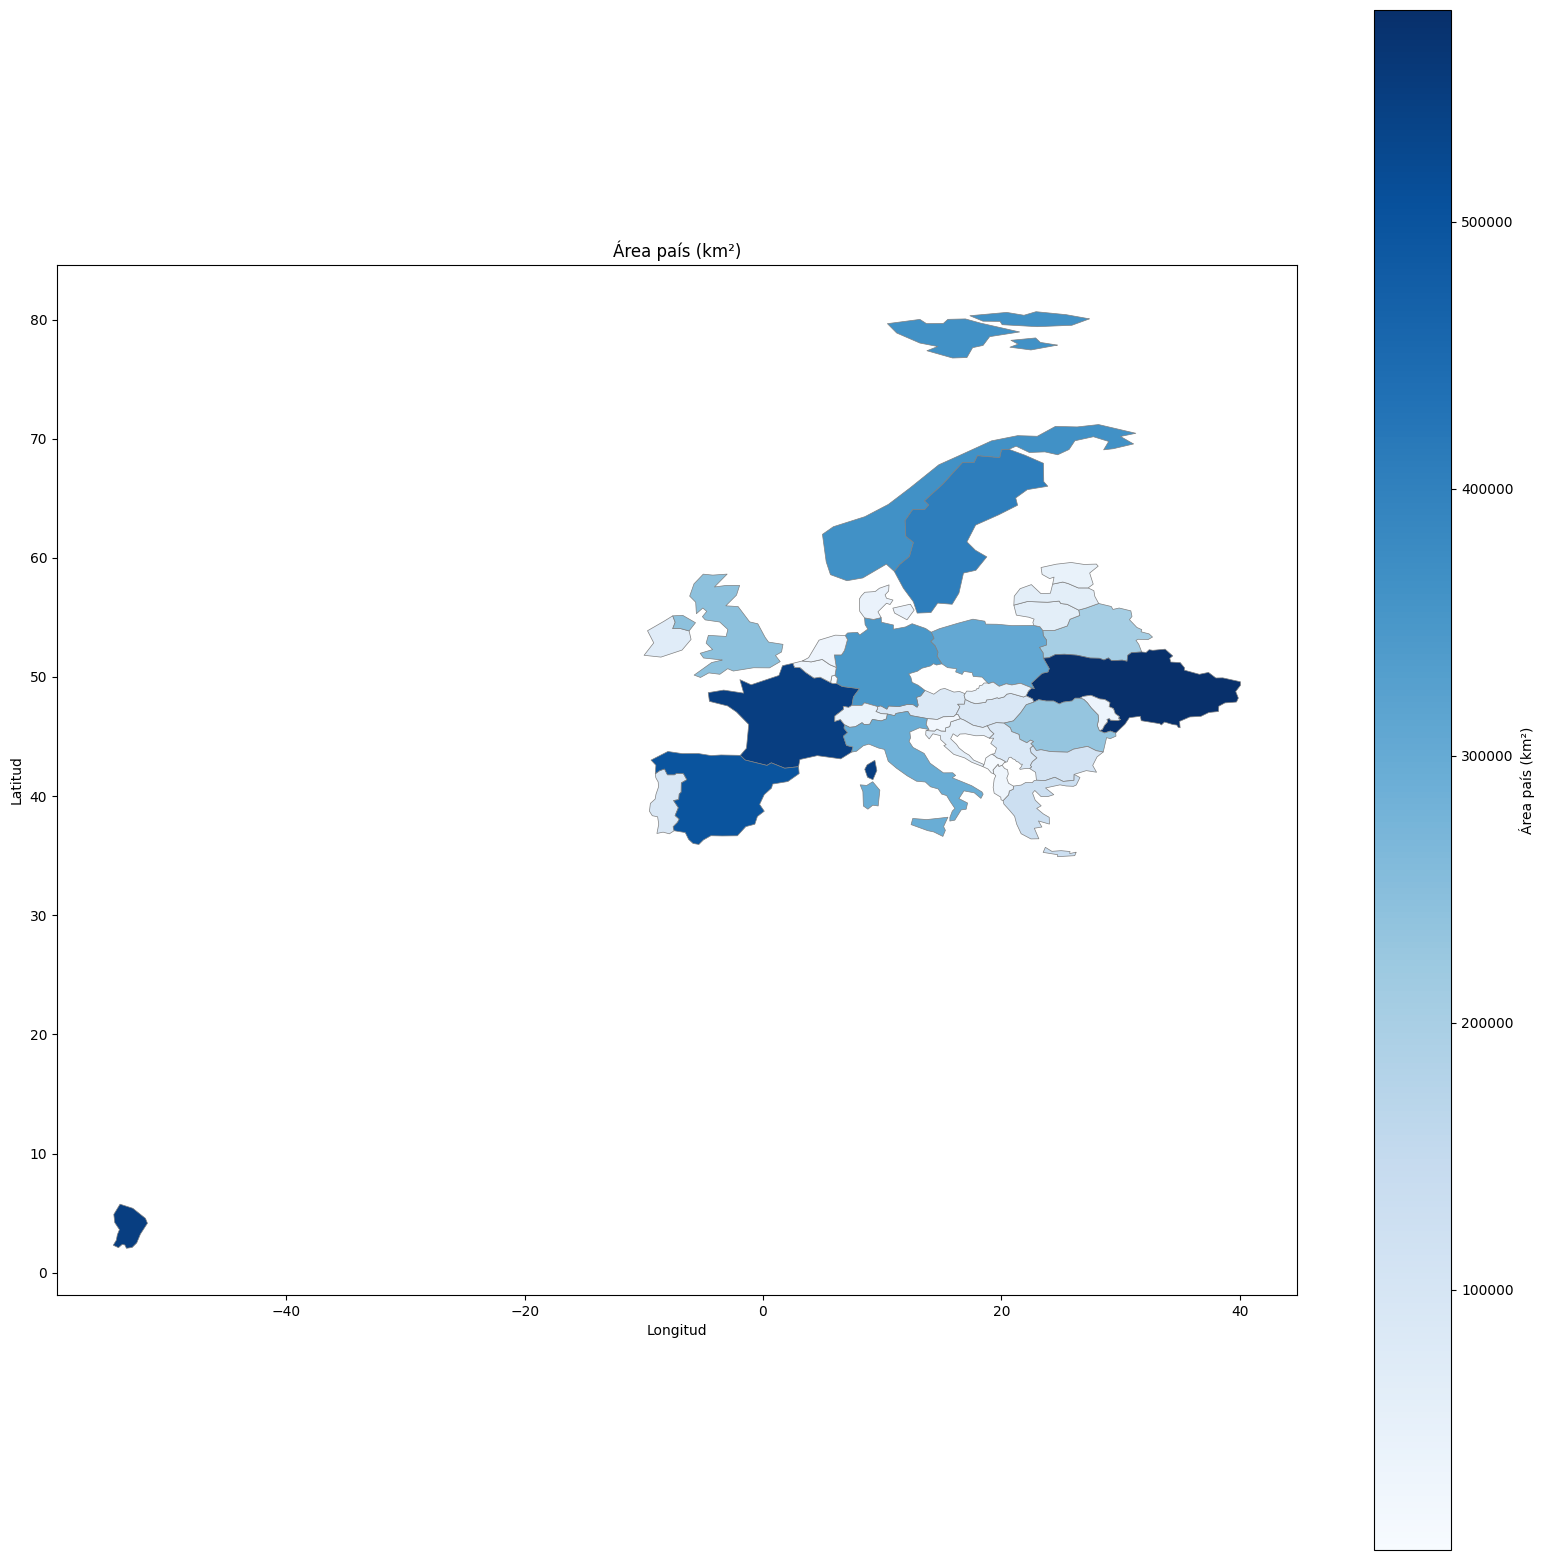

Generando mapa para: Desarrollo humano (%)


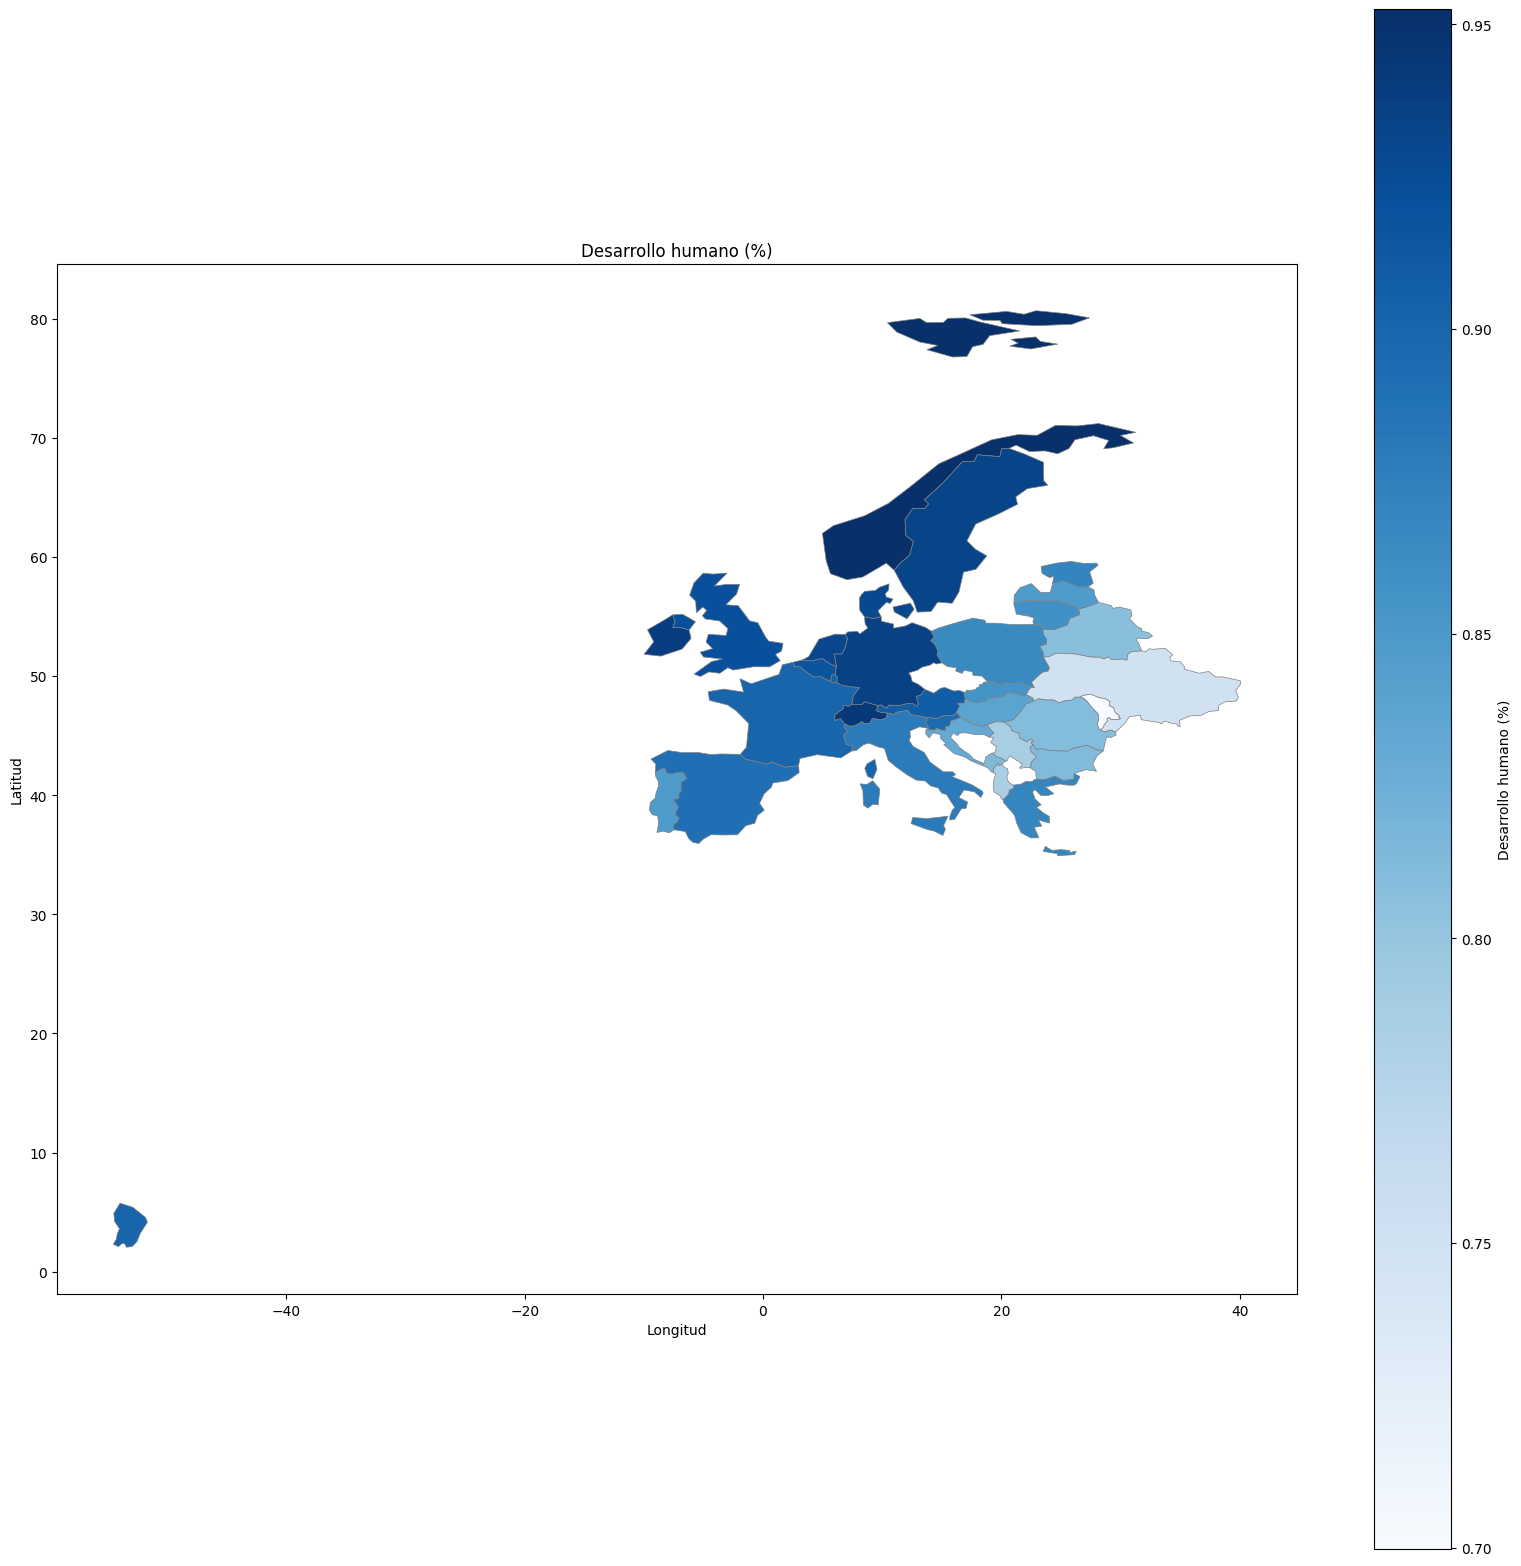

Generando mapa para: PIB (USD)


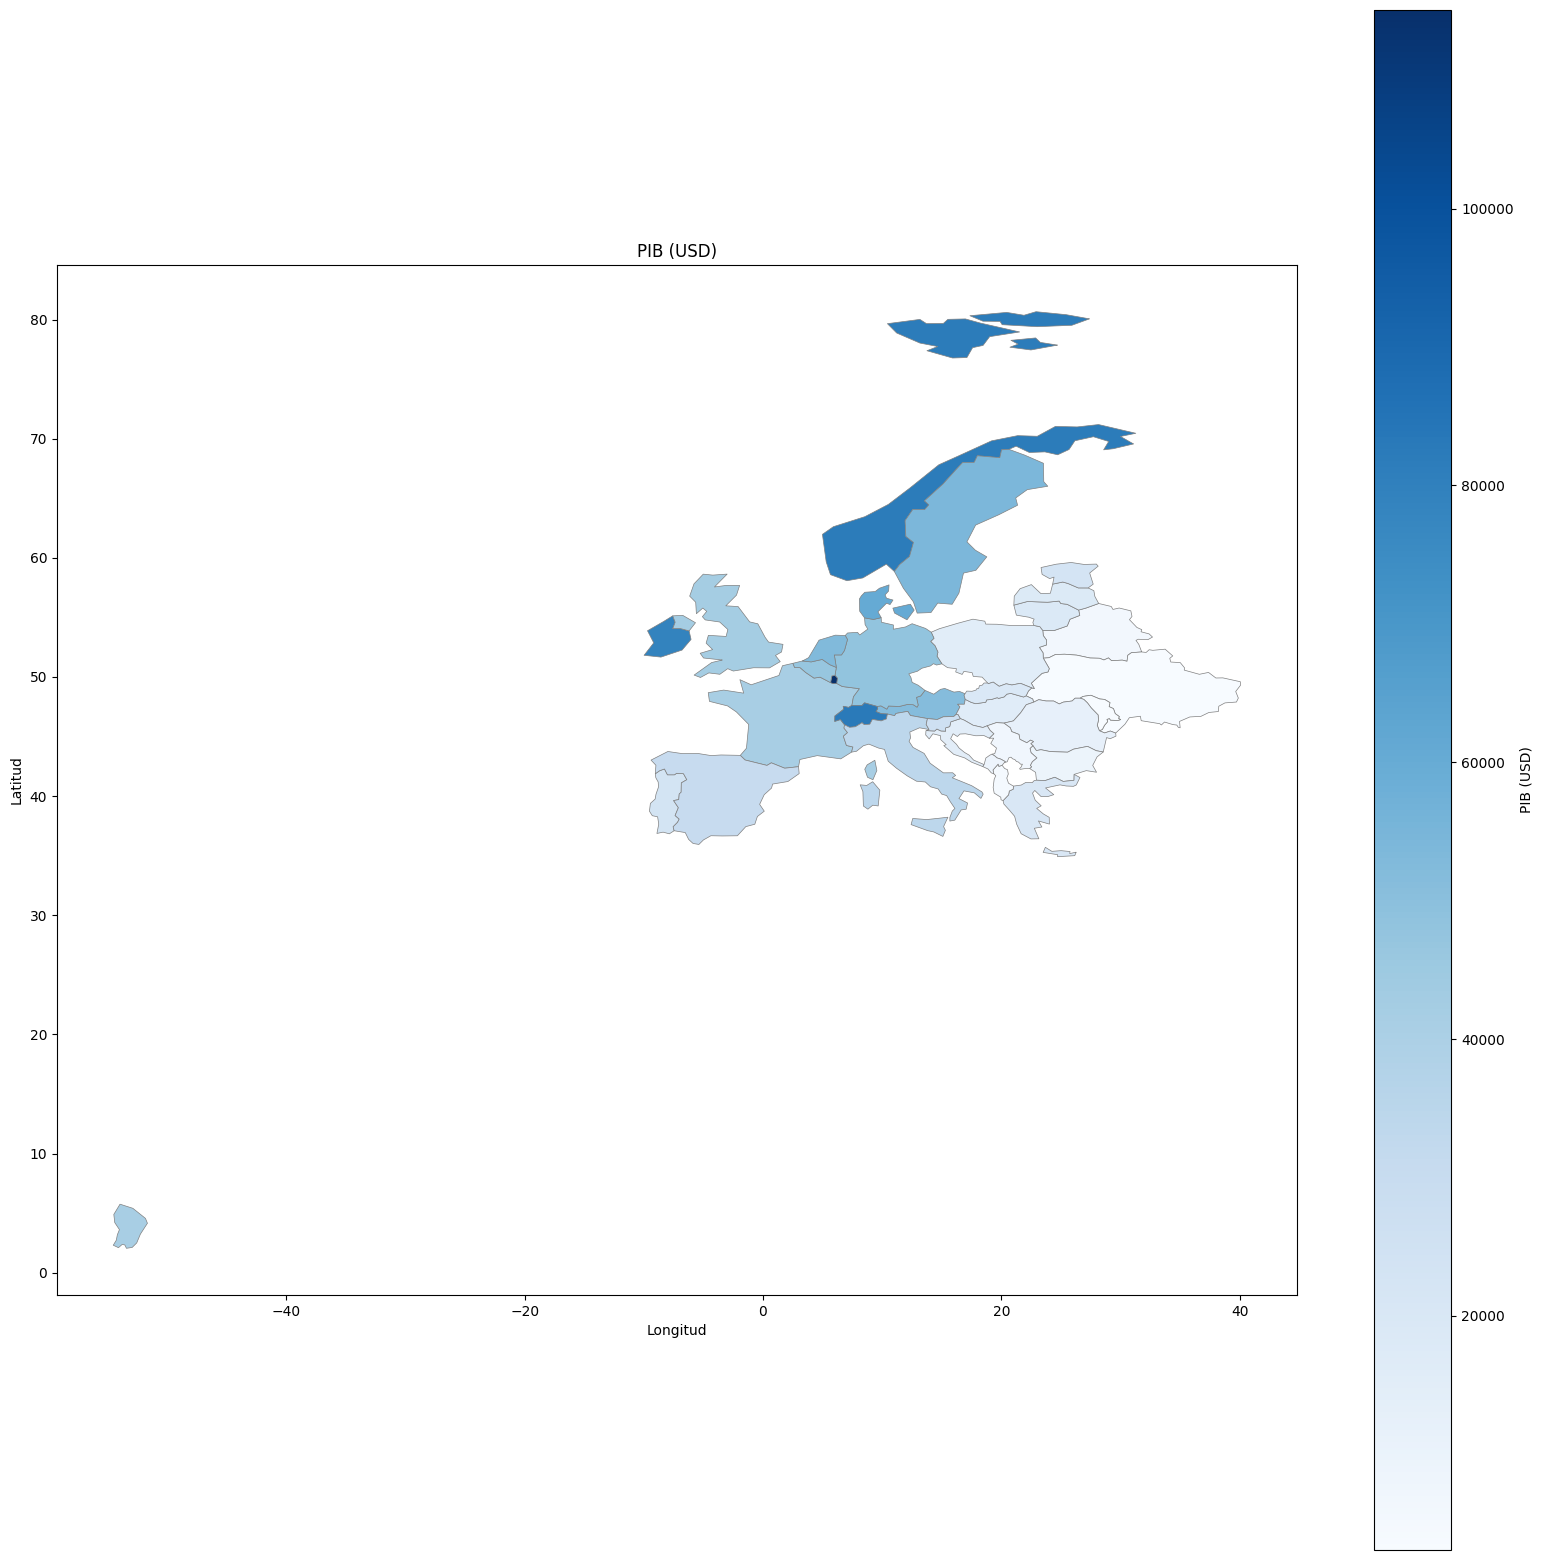

Generando mapa para: Precipitación media (mm)


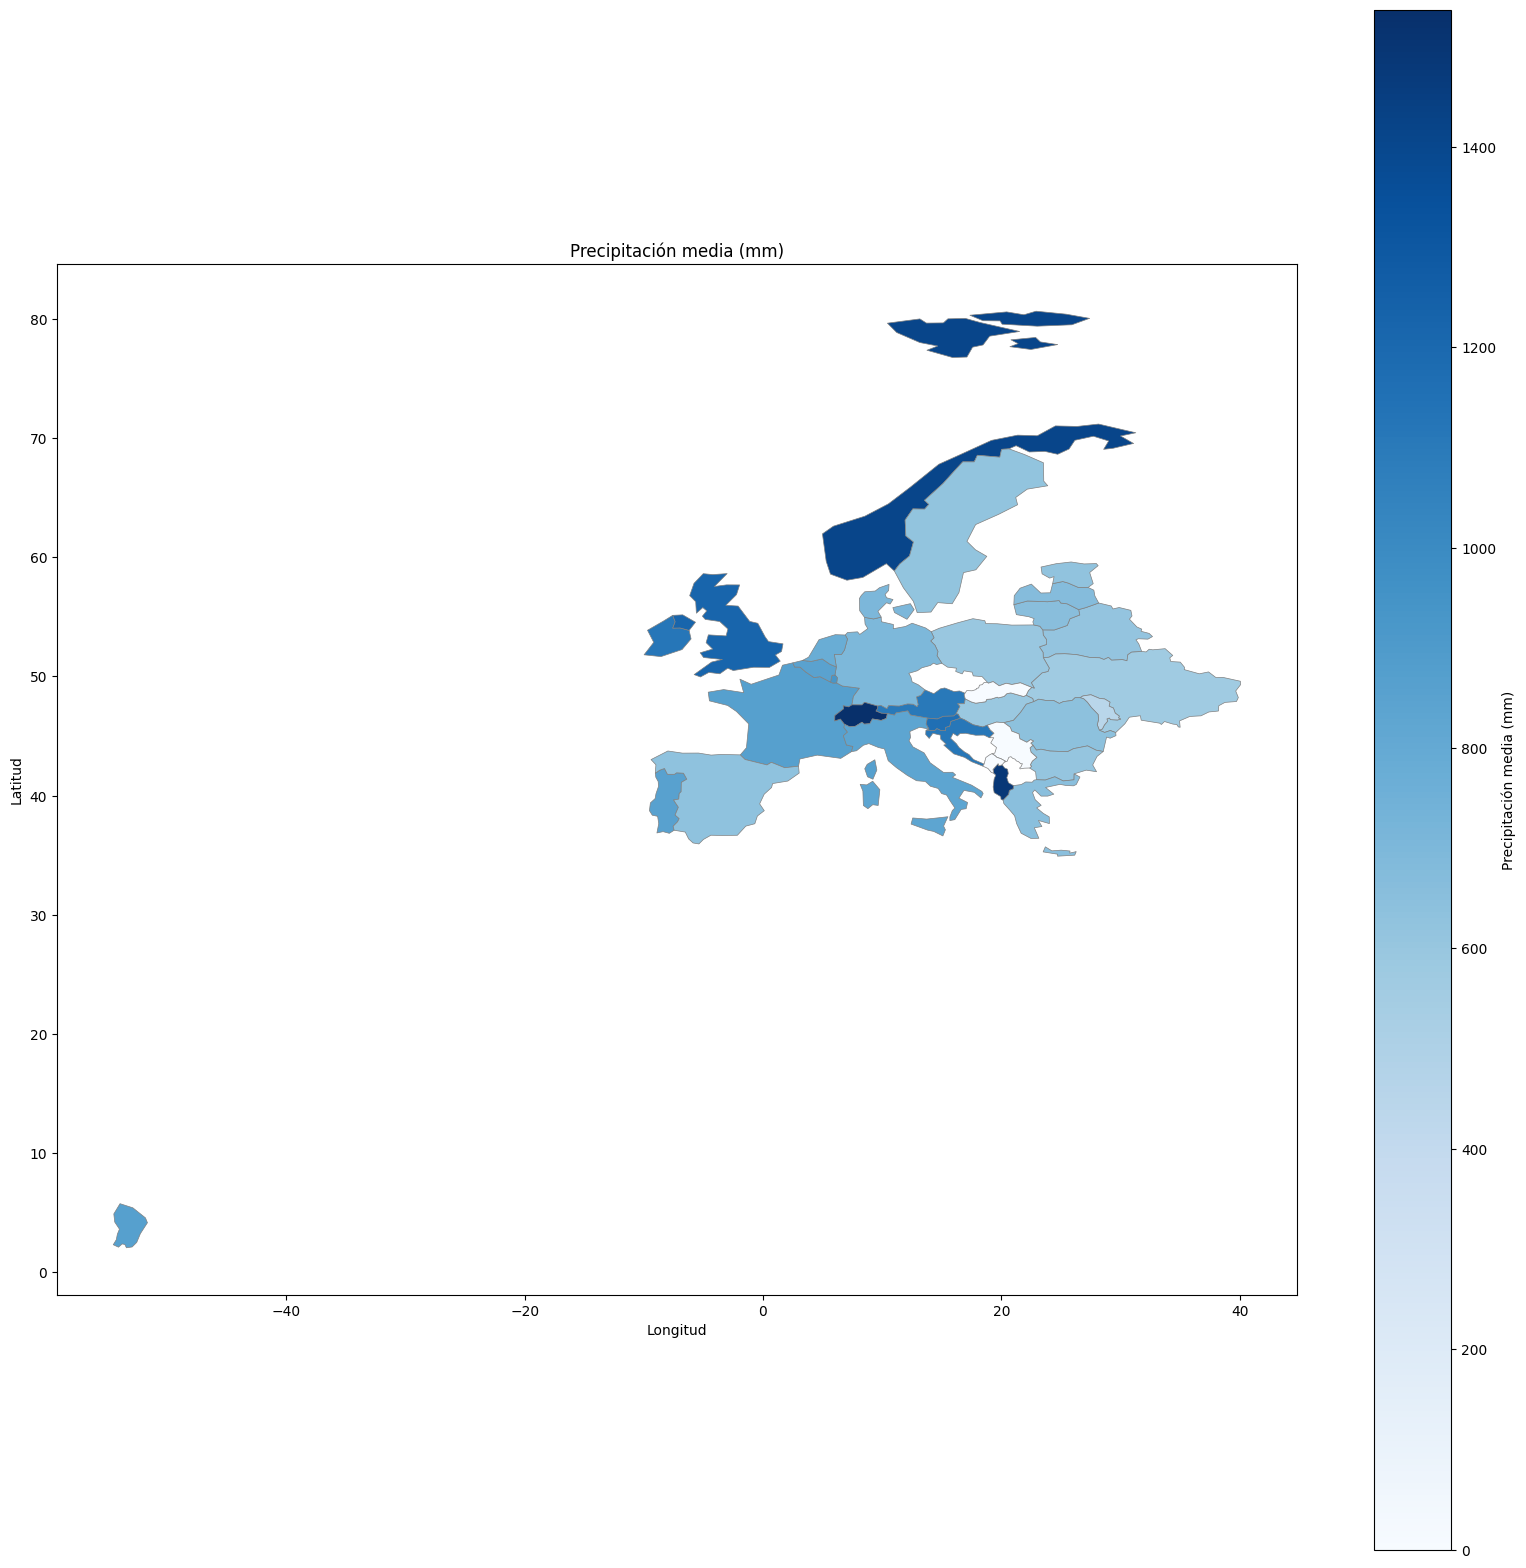

Generando mapa para: Irradiancia global horizontal (kWh/m²/día)


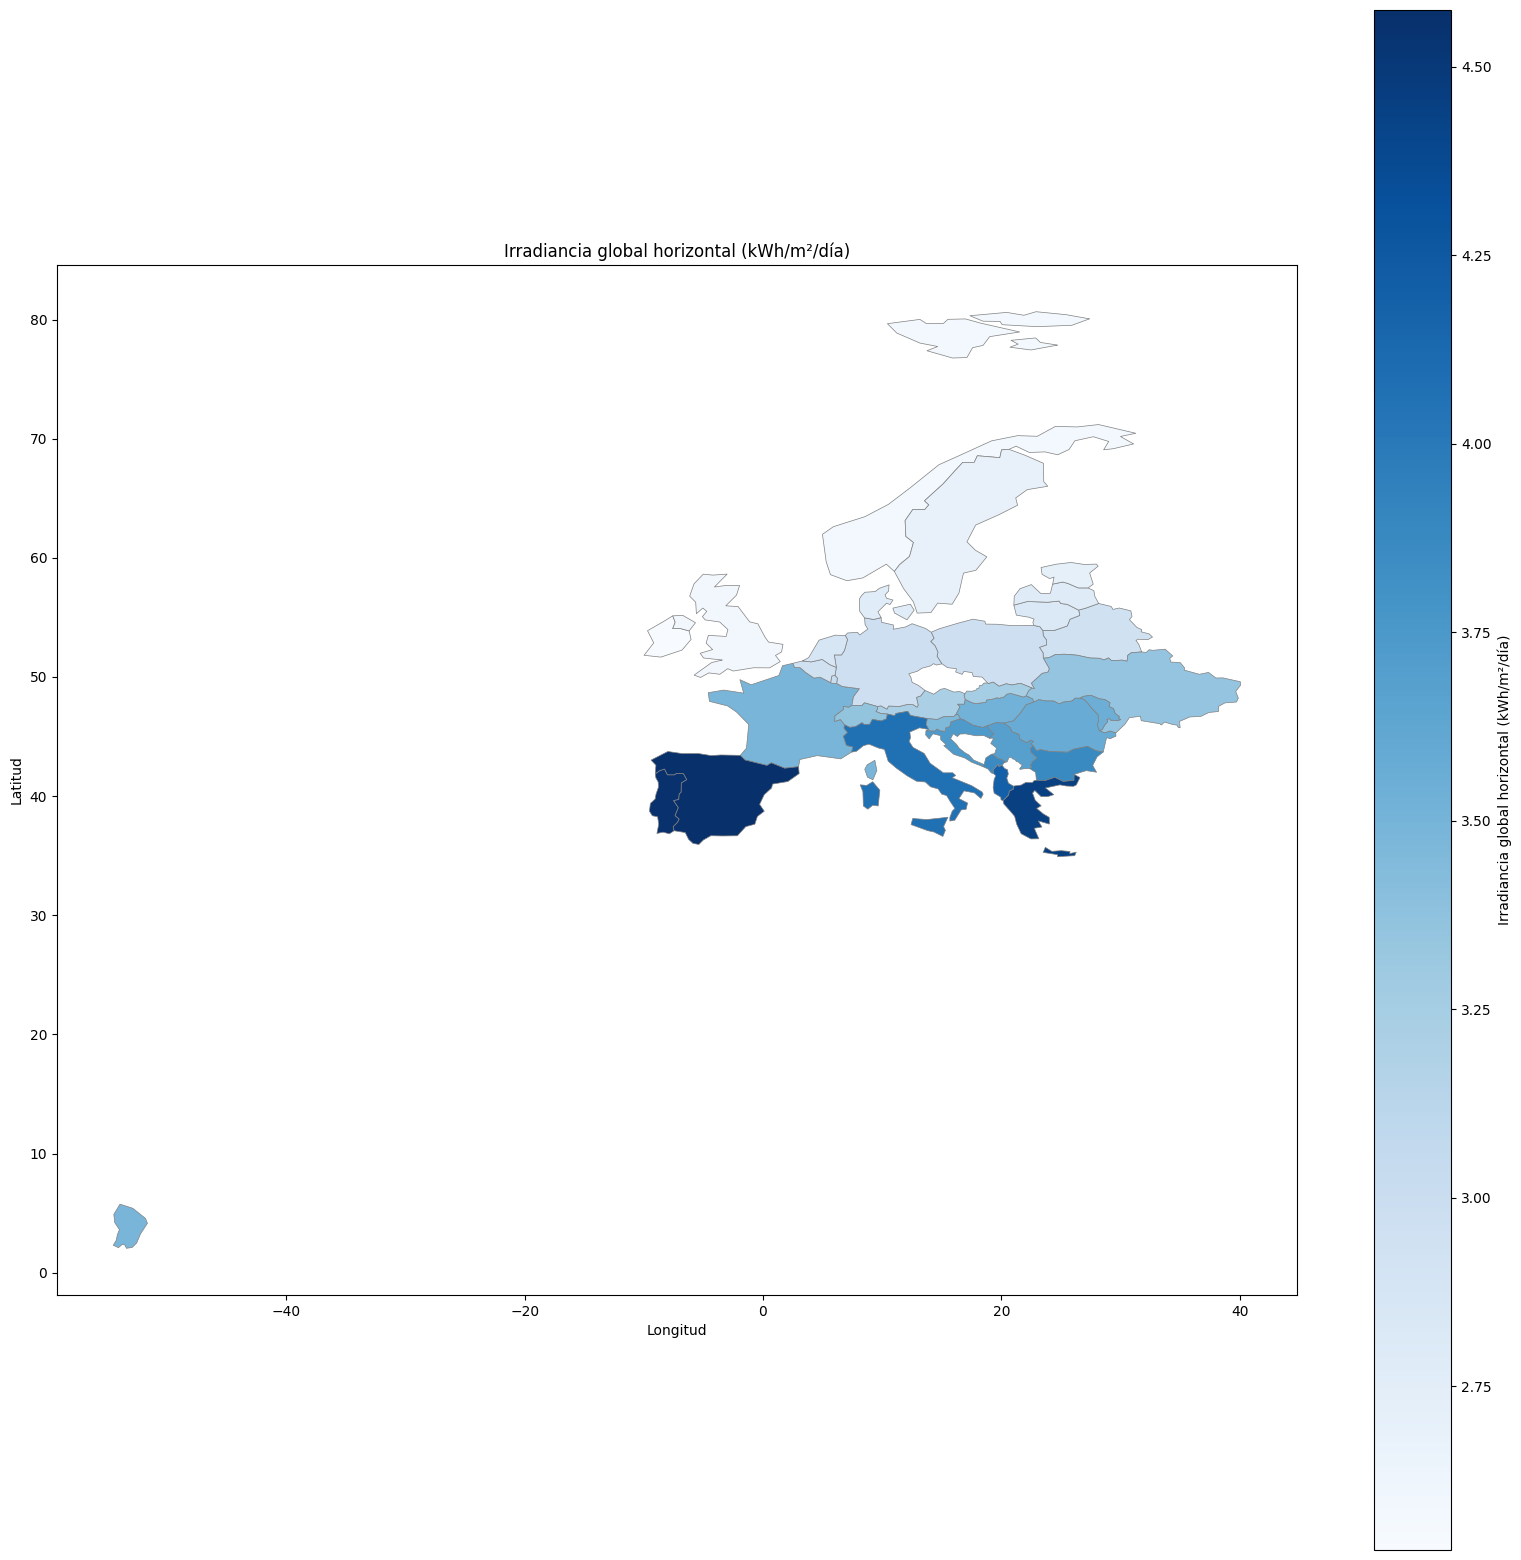

Generando mapa para: Coste construcción (USD/kWh)


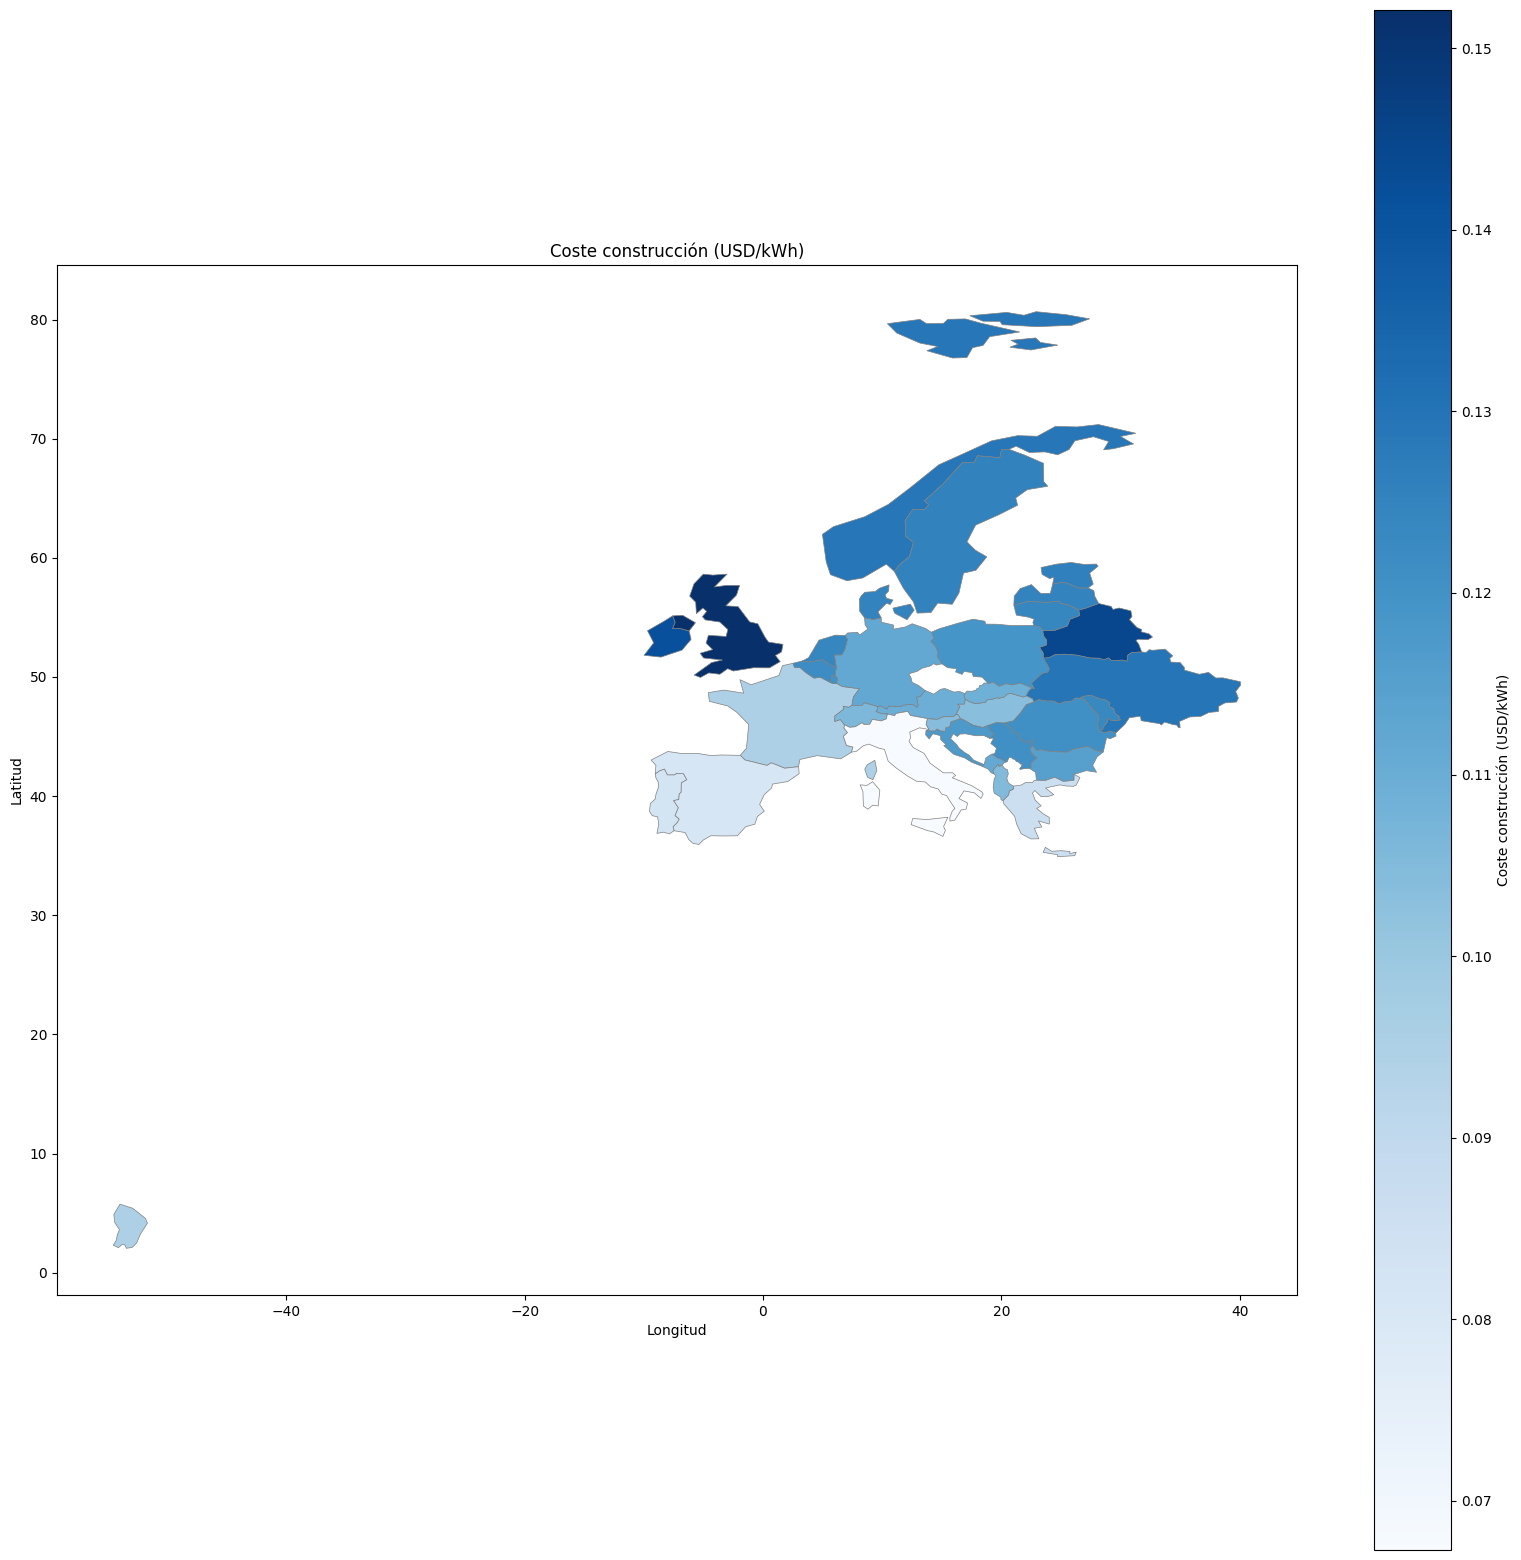

Generando mapa para: Capacidad instalada (Wp per cápita)


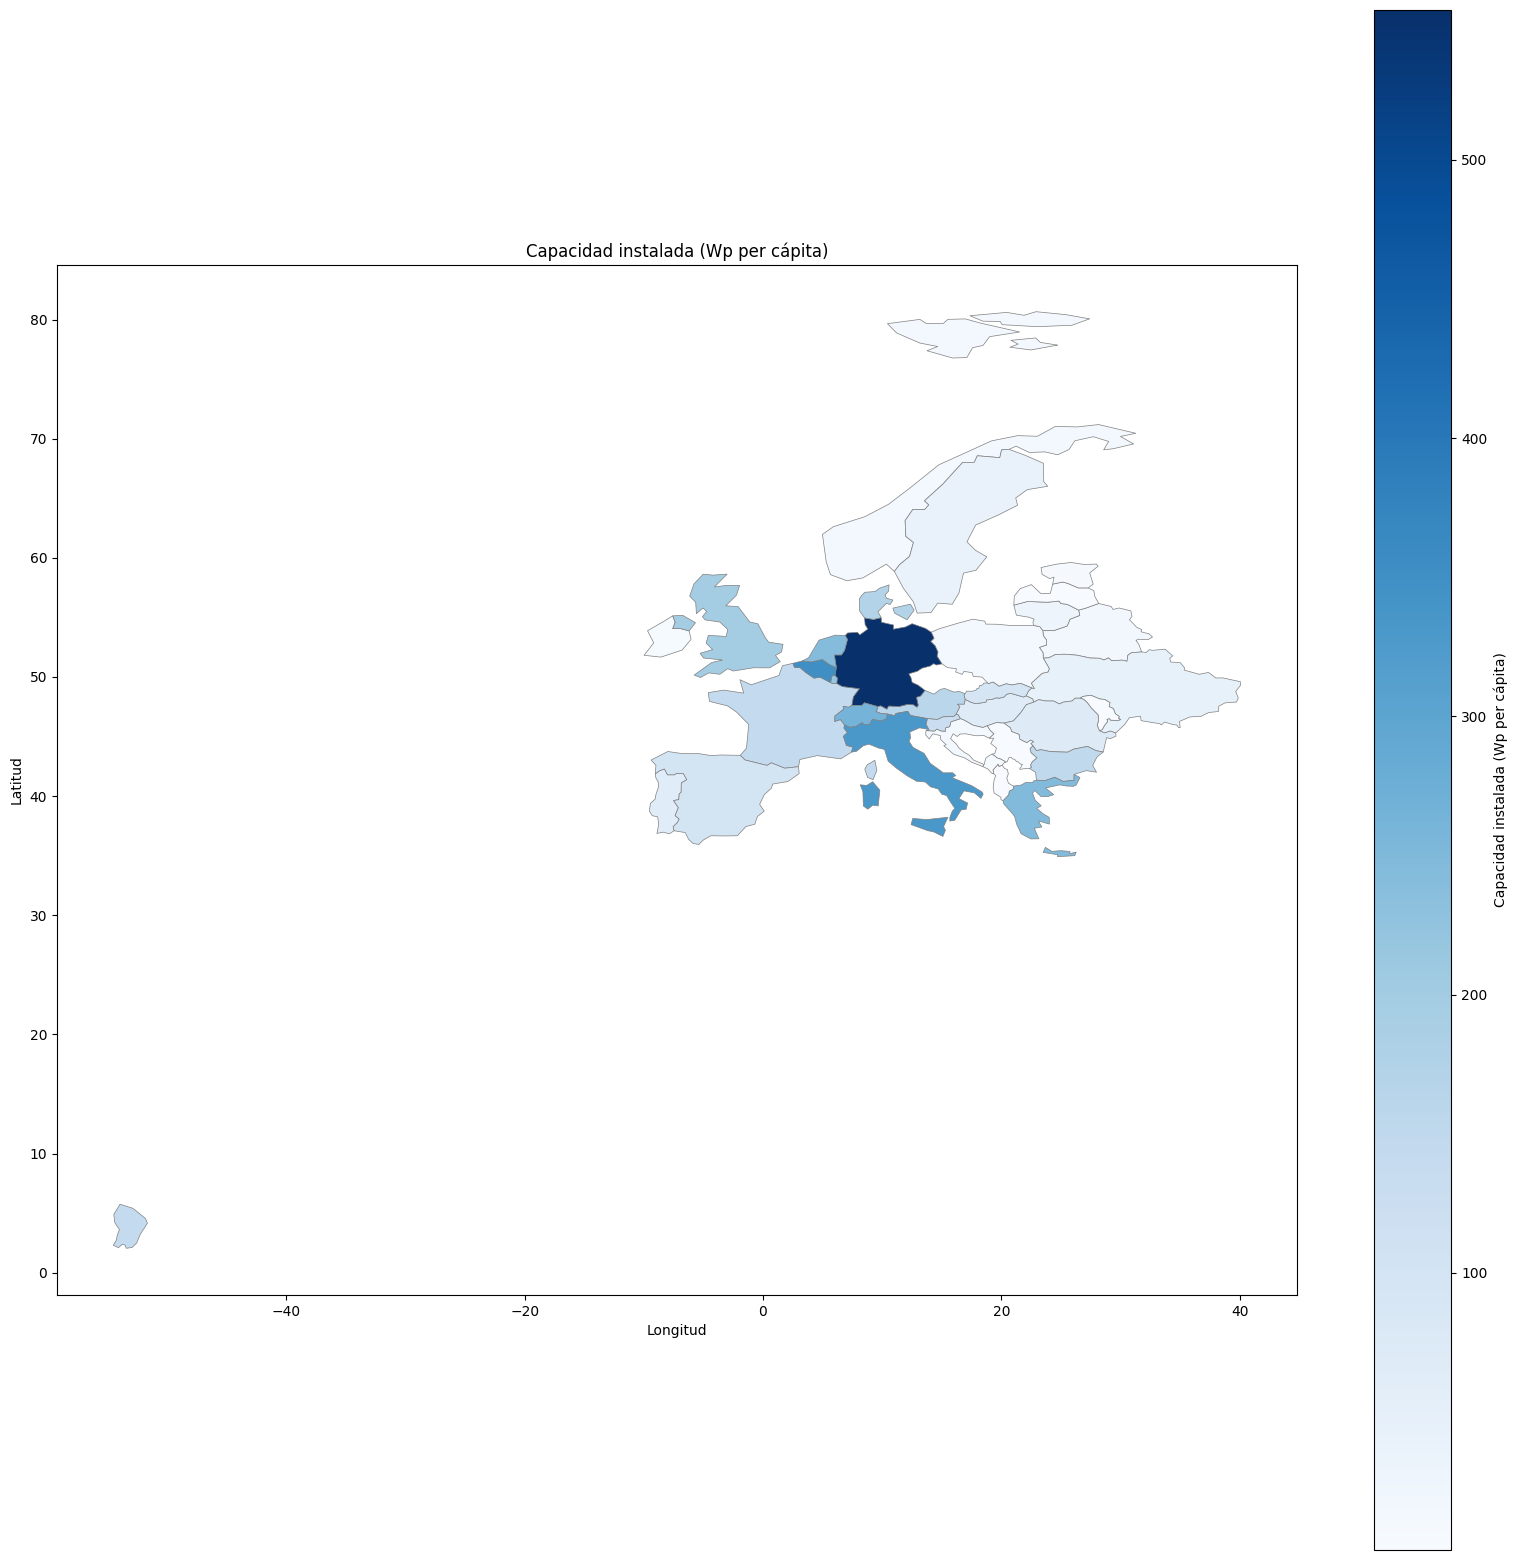

Generando mapa para: Consumo energía (kWh per cápita)


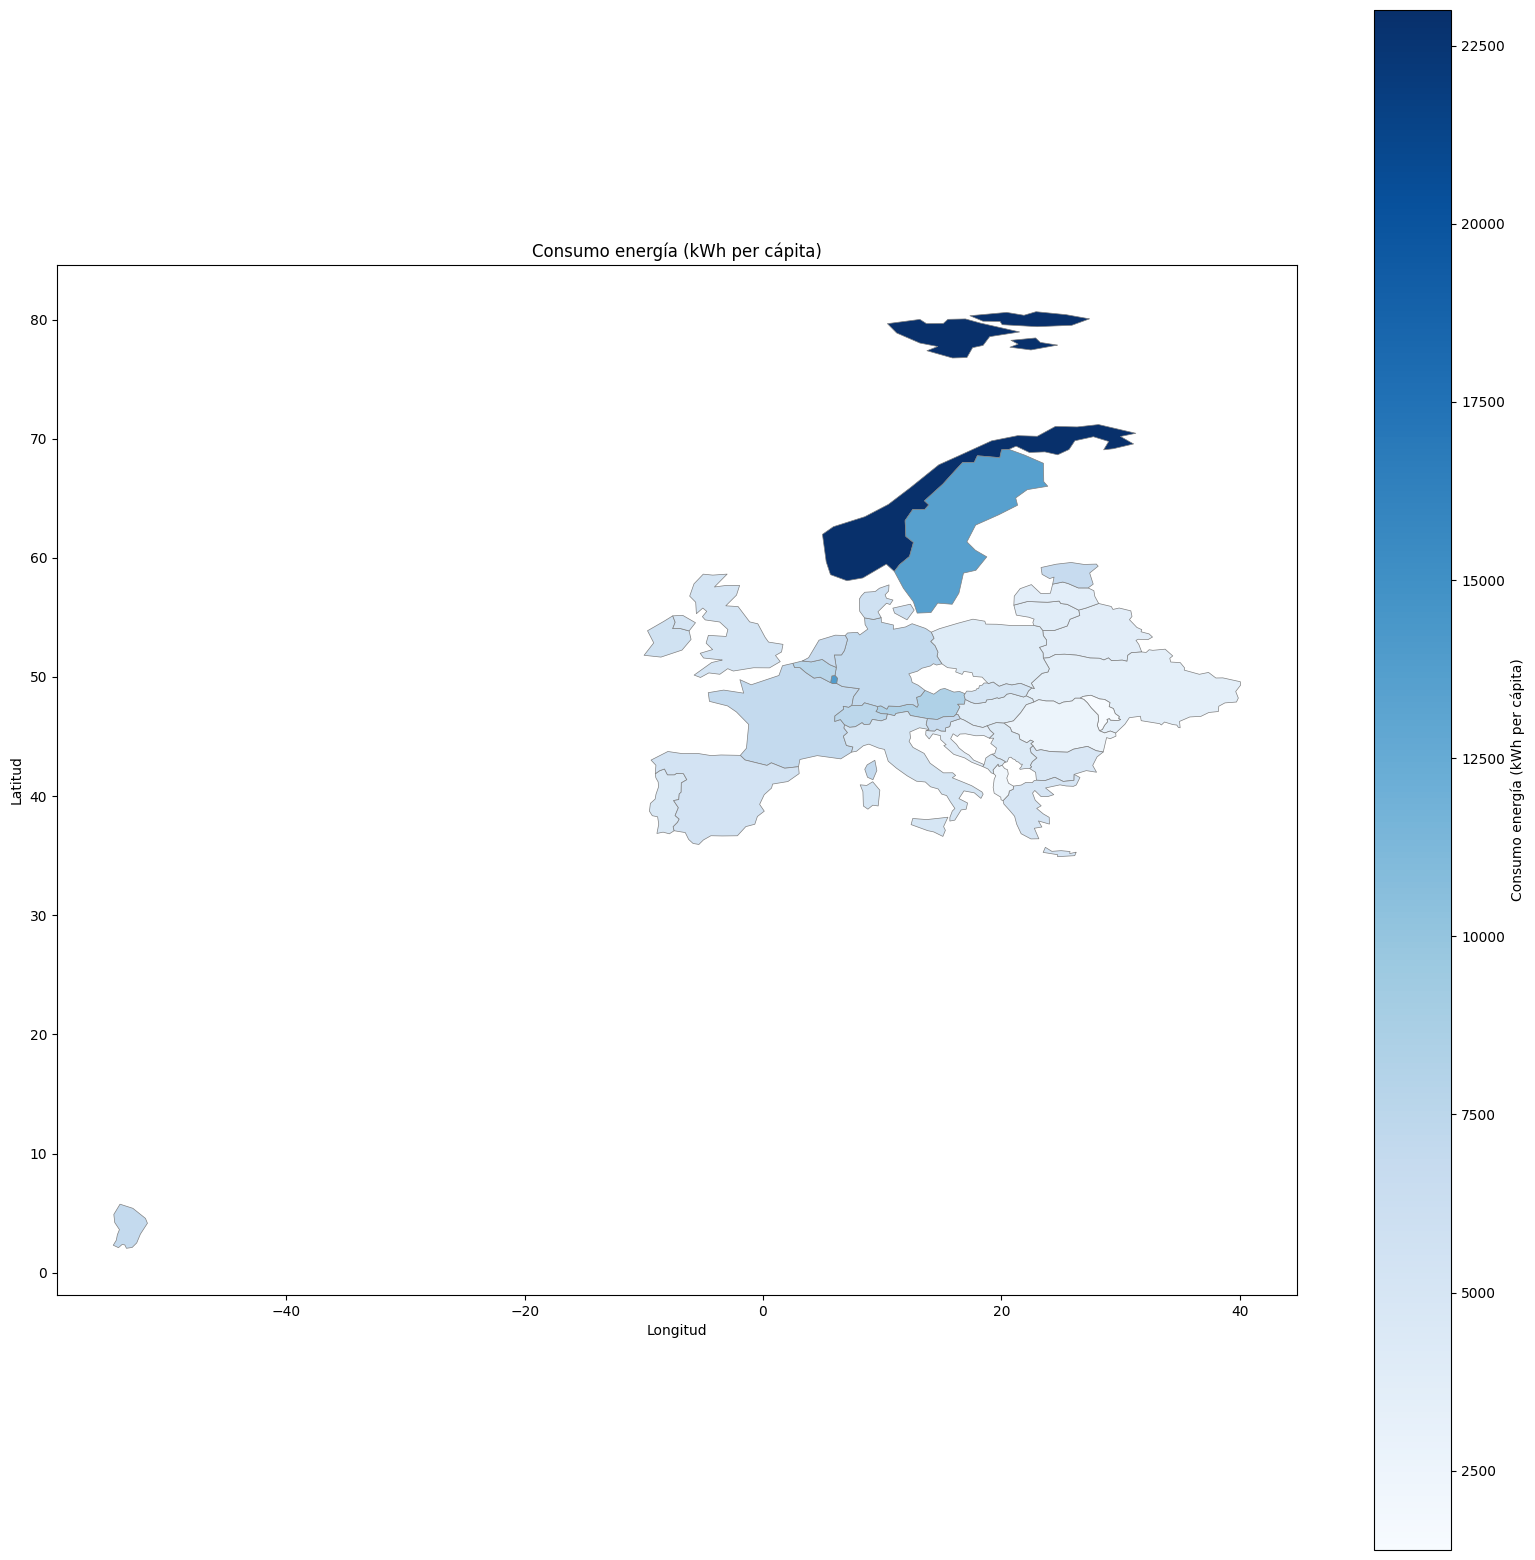

Generando mapa para: Precio tarifa luz (USD/kWh)


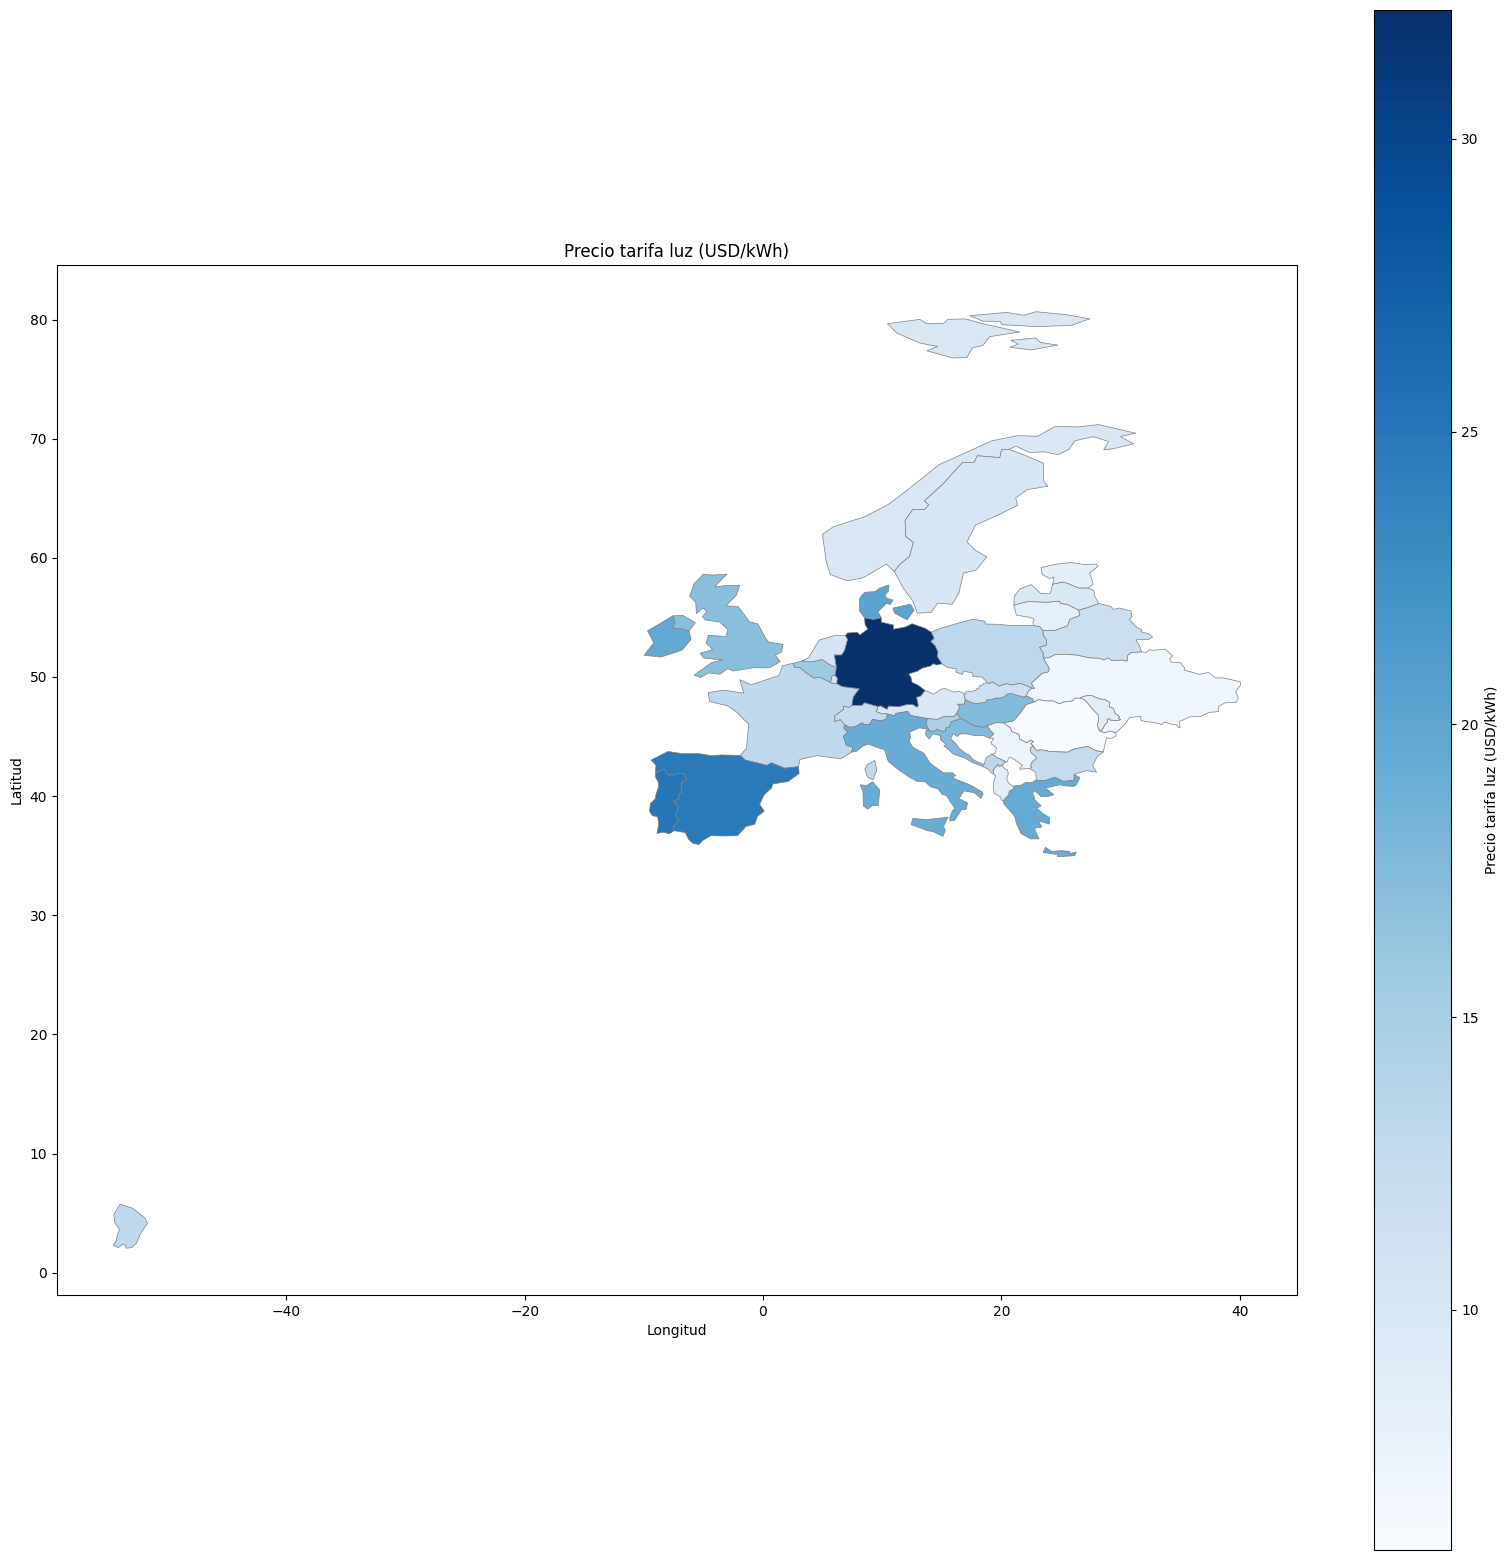

In [83]:
for elemento in df_index.columns:
    try:
        print(f"Generando mapa para: {elemento}")
        mapa_europa(df_index, df_sin_index, elemento)
    except ValueError as e:
        print(f"Error al generar el mapa para '{elemento}': {e}")

In [84]:
#Volvemos a ver el mapa de calor de las correlaciones para ver que dirección tomamos puesto que aun no he encontrado relaciones
df_eu_capacidad_upper = df_index.sort_values(by = "Capacidad instalada (Wp per cápita)",ascending= False )

C:\Users\USER\AppData\Local\Temp\ipykernel_10728\2959423950.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


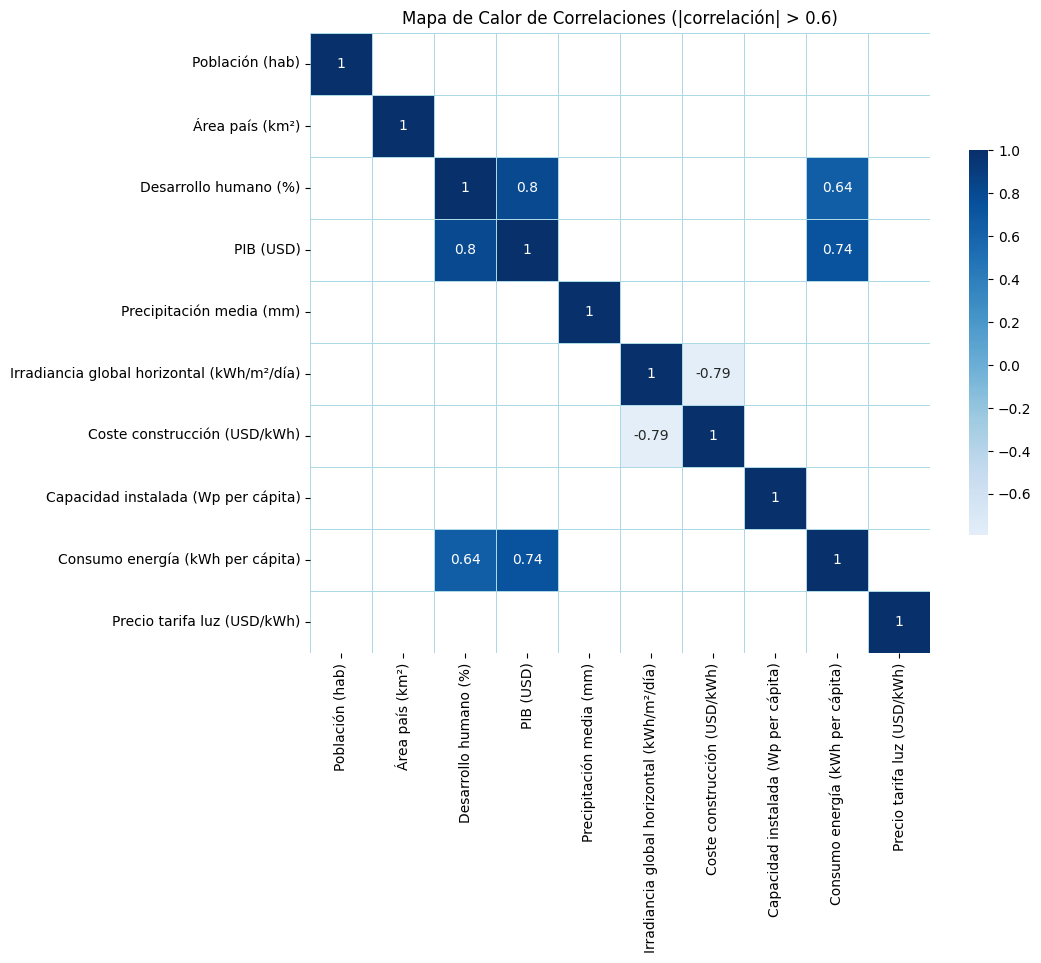

In [85]:
mapa_calor_correlacion(df_eu_capacidad_upper, 0.6)

In [86]:
#Relaciones a estudiar en grafico de dispersión con burbujas, x pais, burbuja variables, y capacidad
''' 
1. Tarifa luz vs Capacidad
2. Poblacion vs Capacidad
3. Area vs Capacidad (No es necesario porque población y area están muy similar)
________________

'''

' \n1. Tarifa luz vs Capacidad\n2. Poblacion vs Capacidad\n3. Area vs Capacidad (No es necesario porque población y area están muy similar)\n________________\n\n'

In [87]:
df_sin_index.columns

Index(['País', 'Población (hab)', 'Área país (km²)', 'Desarrollo humano (%)',
       'PIB (USD)', 'Precipitación media (mm)',
       'Irradiancia global horizontal (kWh/m²/día)',
       'Coste construcción (USD/kWh)', 'Capacidad instalada (Wp per cápita)',
       'Consumo energía (kWh per cápita)', 'Precio tarifa luz (USD/kWh)'],
      dtype='object')

3 variables - Gráficos de dispersion

In [88]:
#Funcion para grafico de dispersión con 3 variables y todos los parametros
def dispersion_3_var(df,x1, z1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[z1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

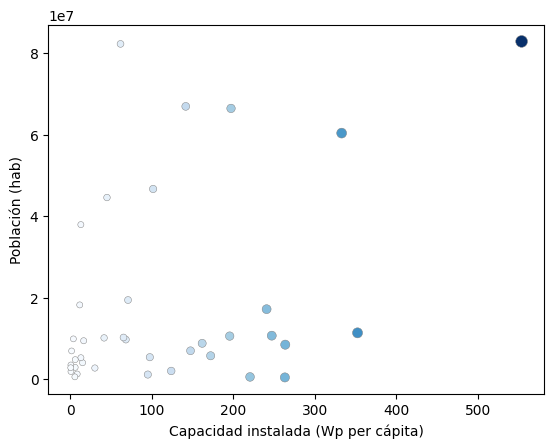

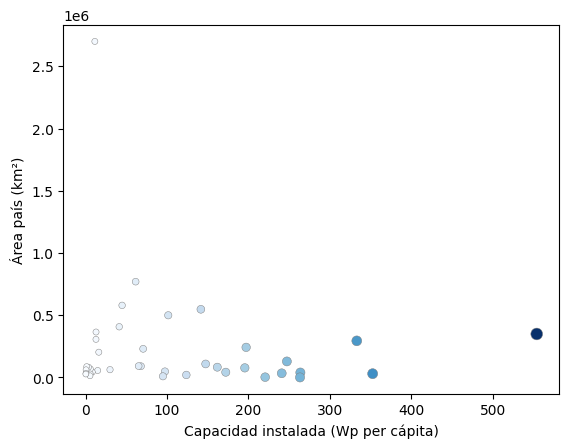

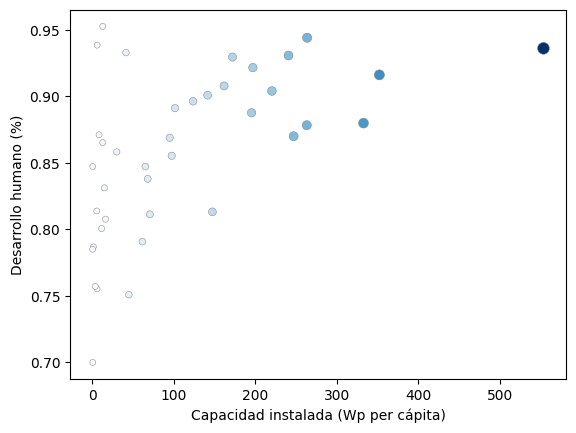

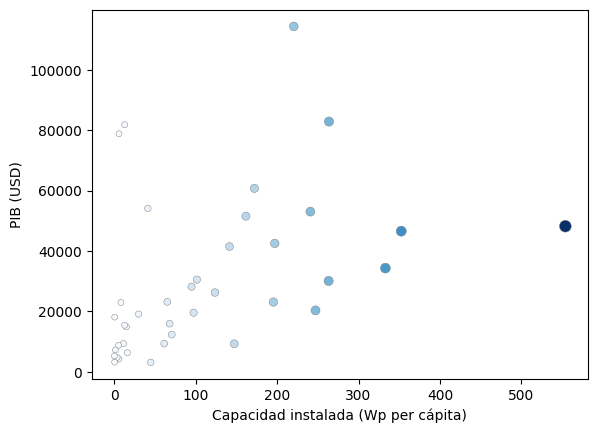

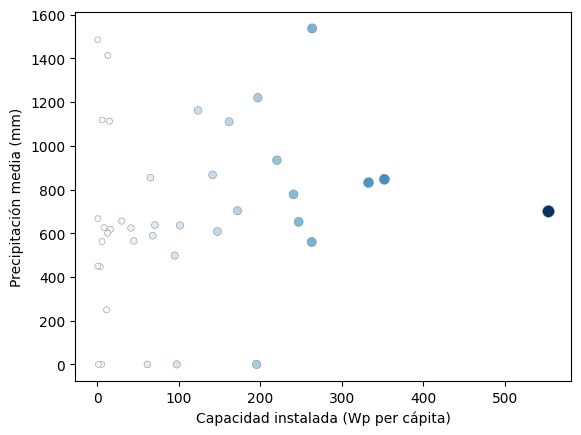

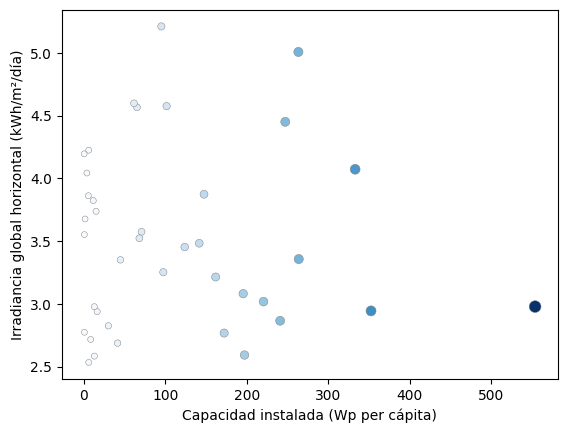

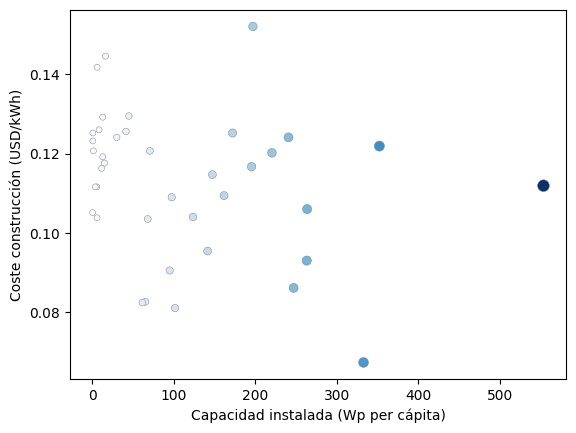

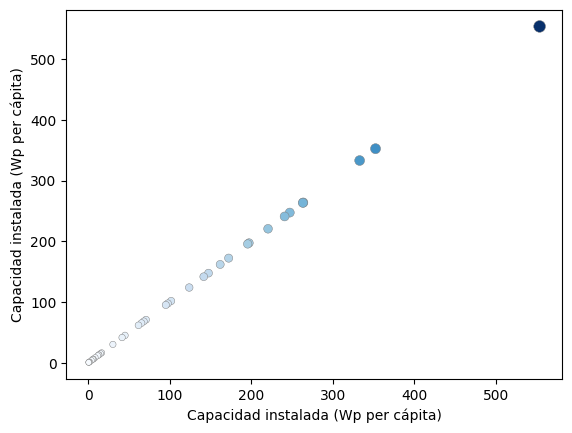

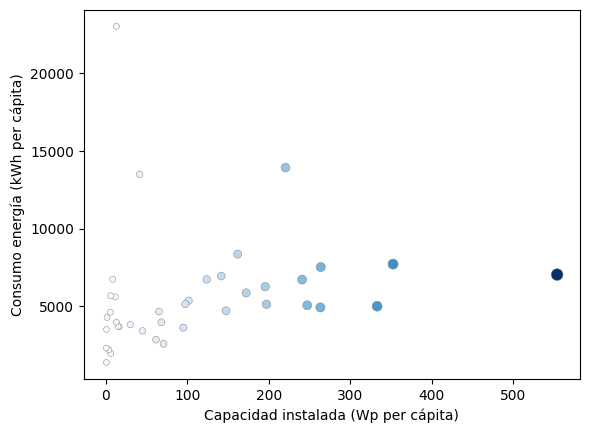

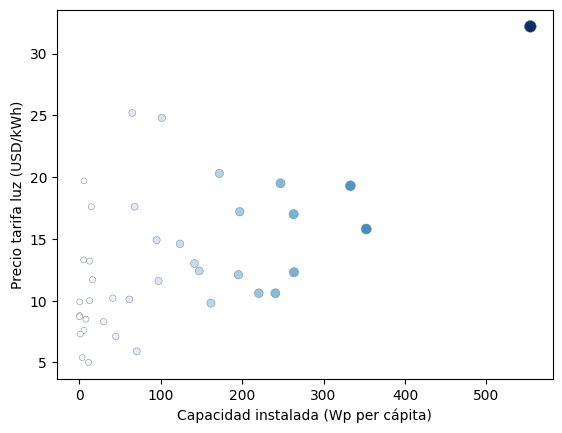

In [89]:
#VARIABLE CAPACIDAD INSTALADA COMO PRINCIPAL
dispersion_3_var(df_eu_capacidad_upper,"Capacidad instalada (Wp per cápita)","Capacidad instalada (Wp per cápita)")

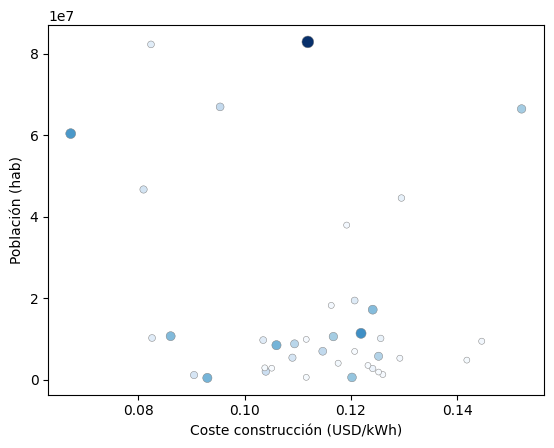

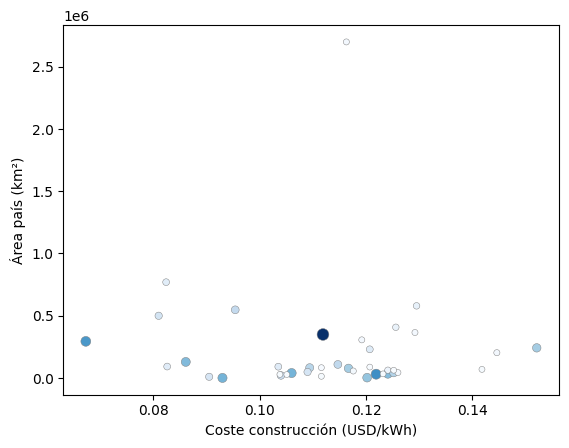

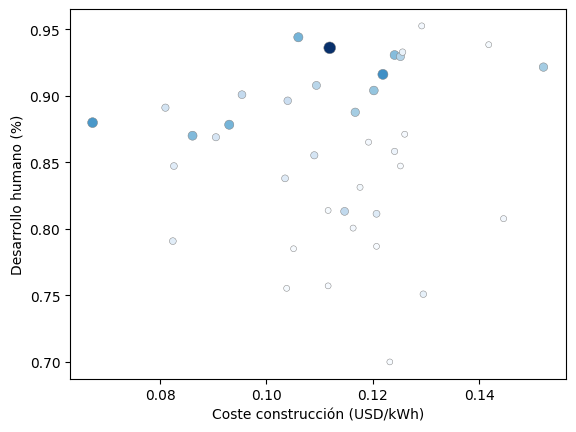

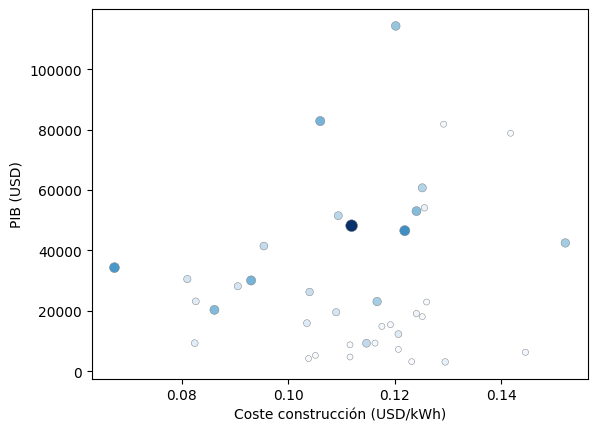

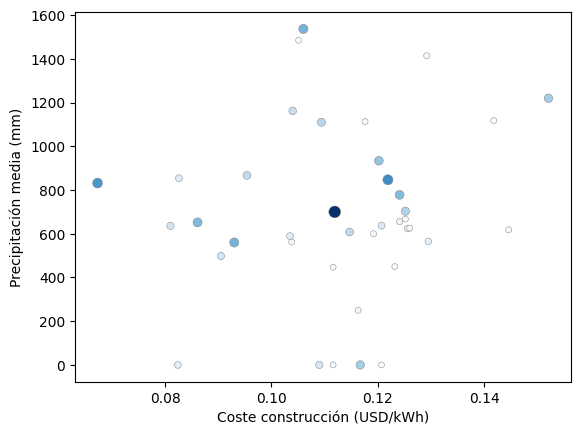

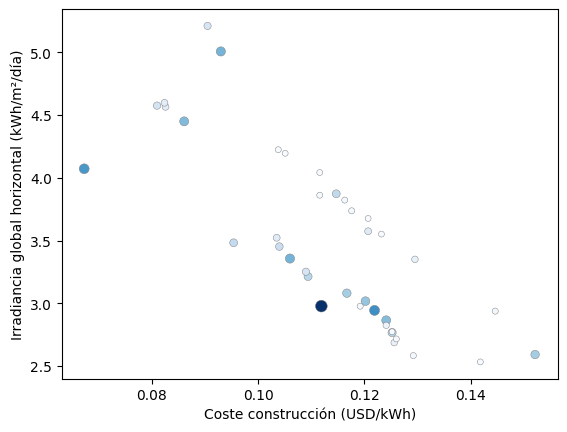

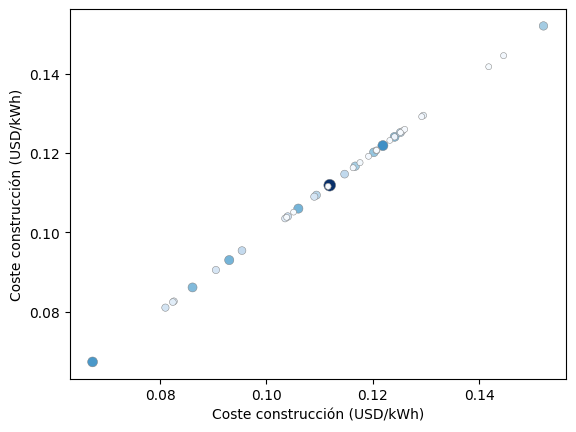

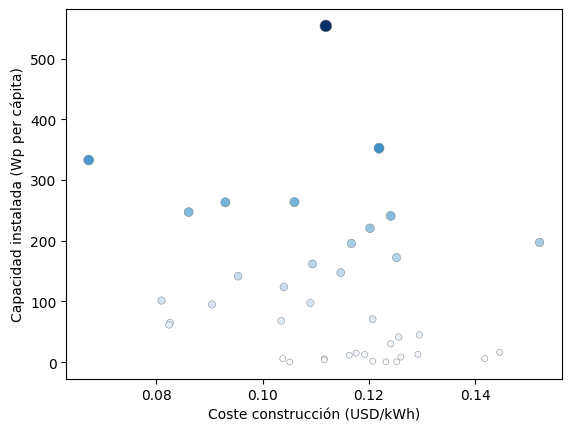

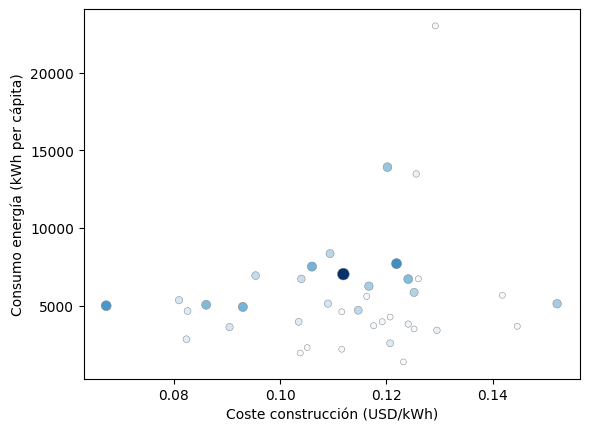

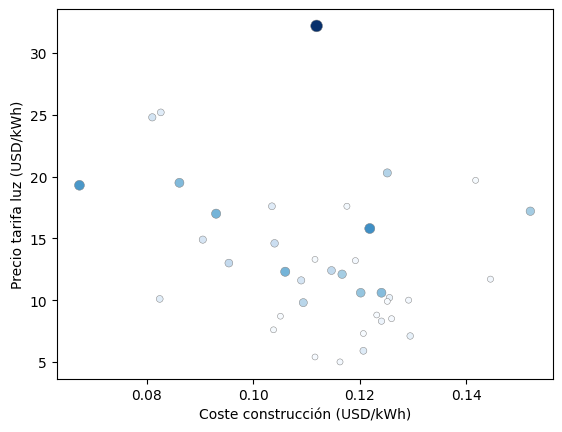

In [90]:
#VARIABLE PRINCIPAL COSTE
dispersion_3_var(df_eu_capacidad_upper, "Coste construcción (USD/kWh)","Capacidad instalada (Wp per cápita)")

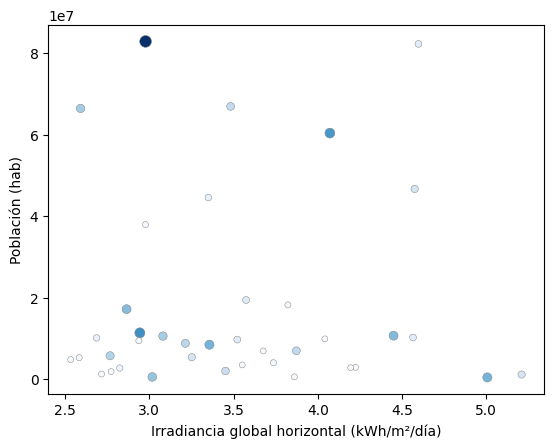

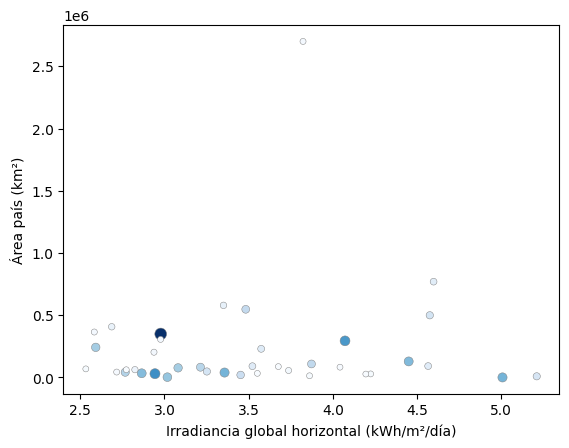

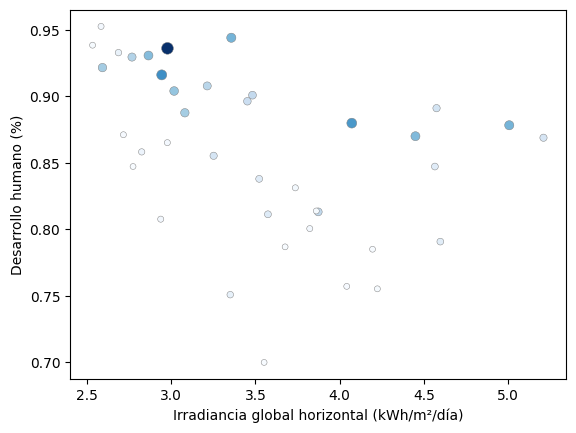

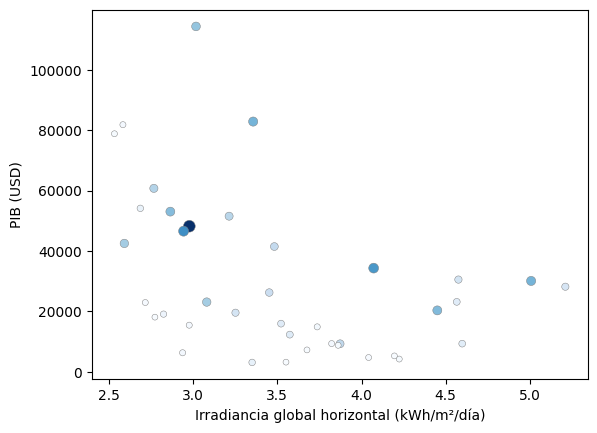

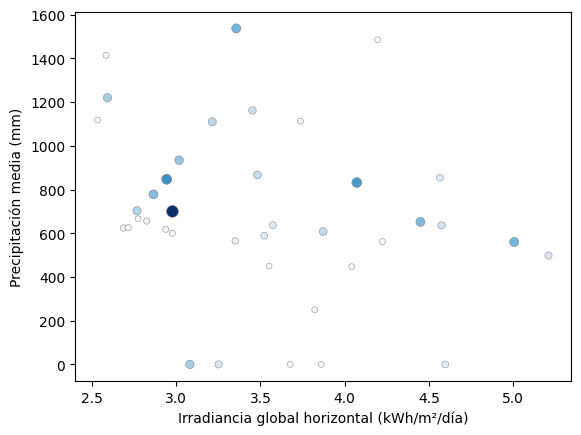

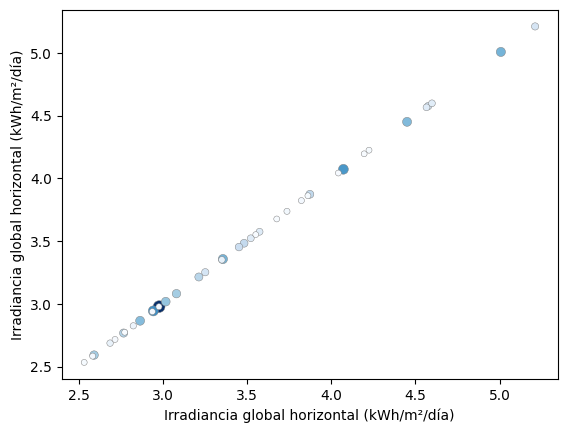

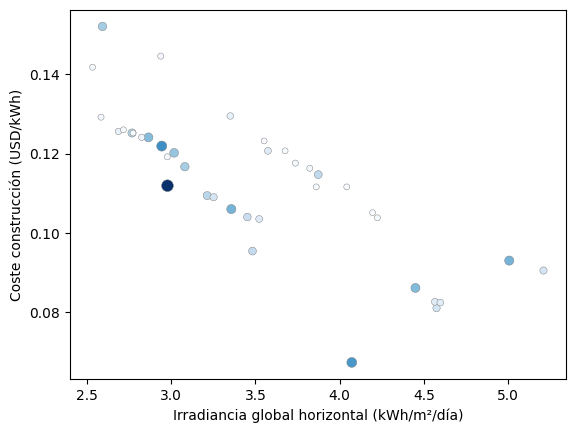

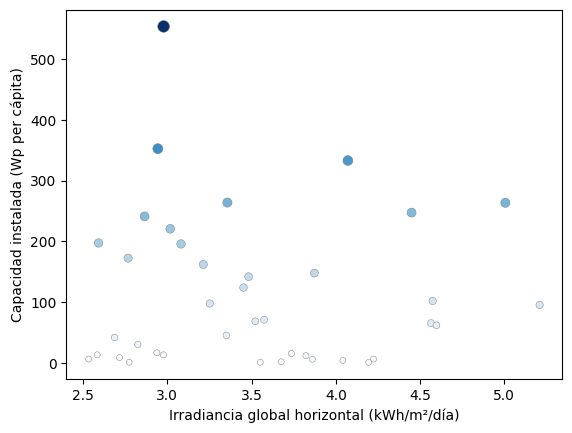

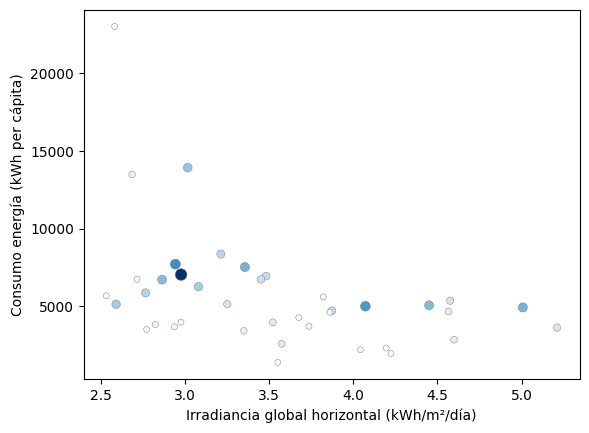

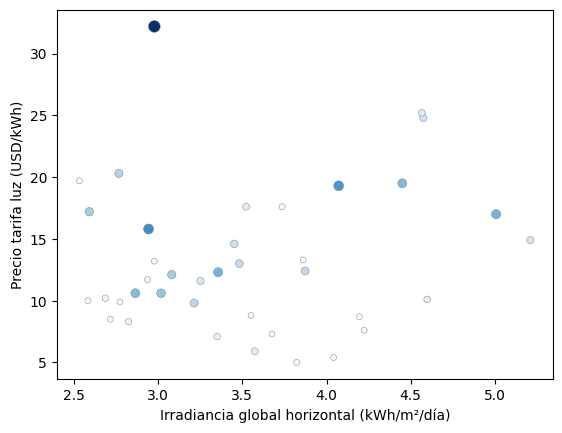

In [91]:
#VARIABLE PRINCIPAL IRRADIANCIA
dispersion_3_var(df_eu_capacidad_upper, "Irradiancia global horizontal (kWh/m²/día)","Capacidad instalada (Wp per cápita)" )

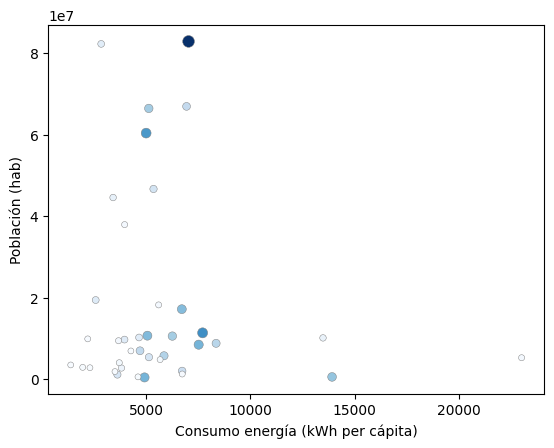

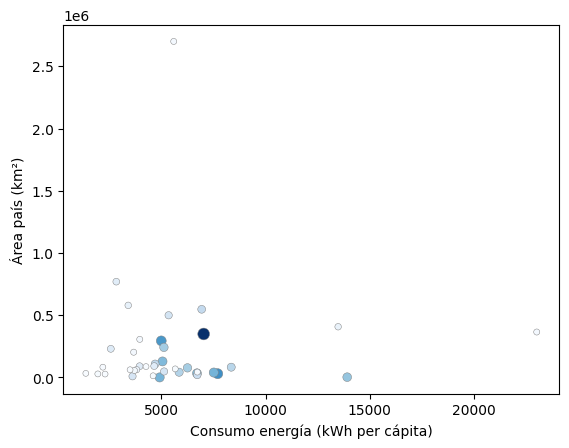

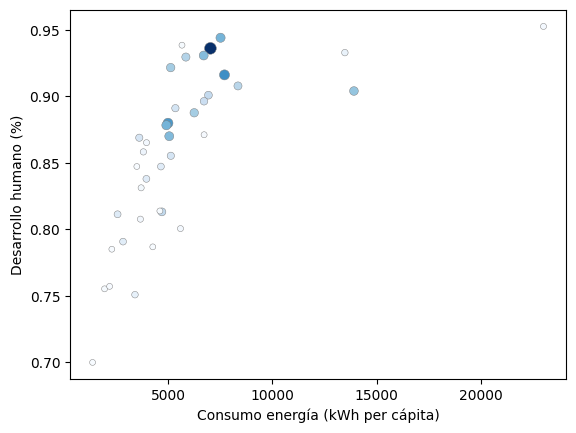

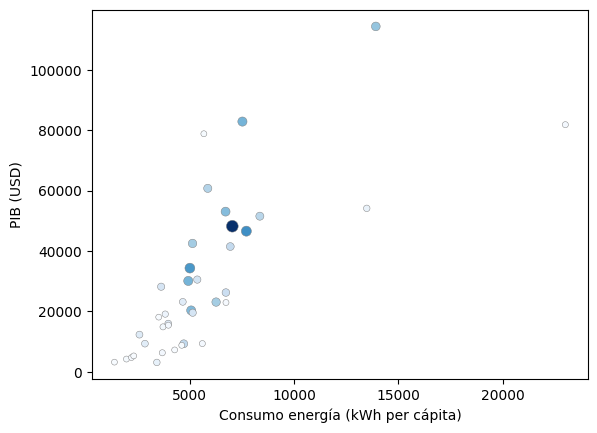

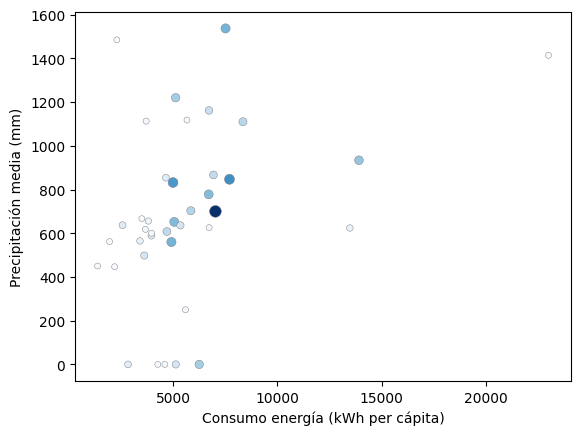

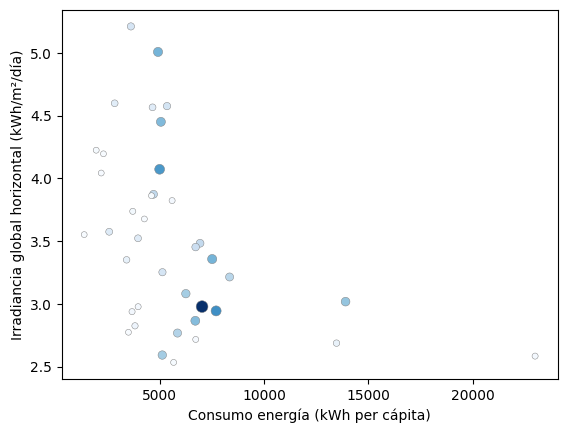

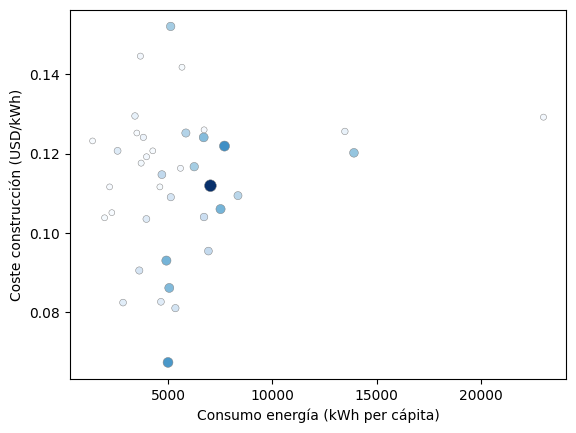

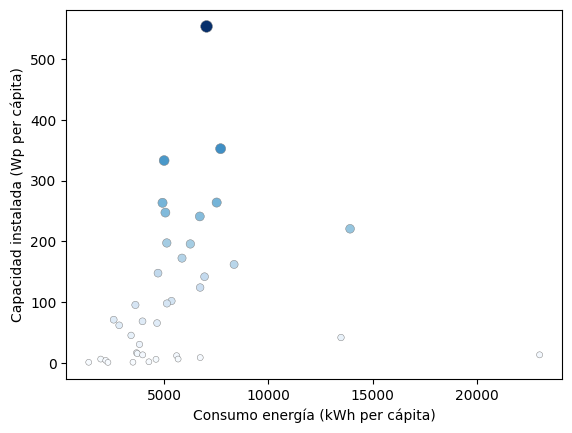

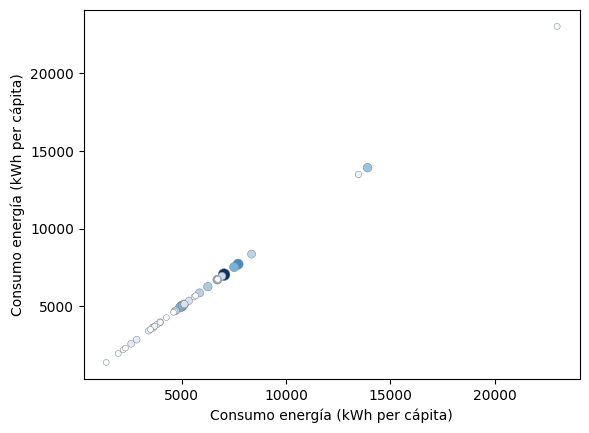

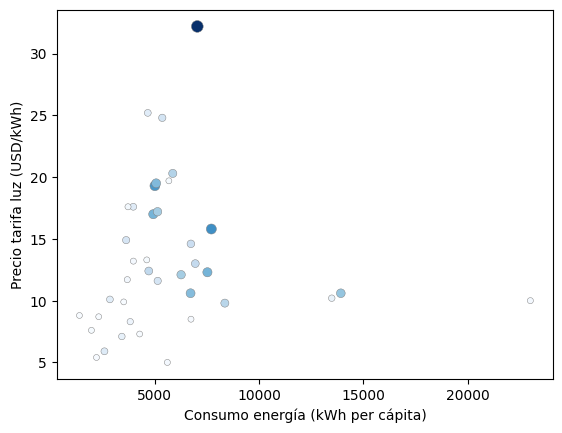

In [92]:
#VARIABLE PRINCIPAL CONSUMO PER CAPITA
dispersion_3_var(df_eu_capacidad_upper,"Consumo energía (kWh per cápita)","Capacidad instalada (Wp per cápita)")

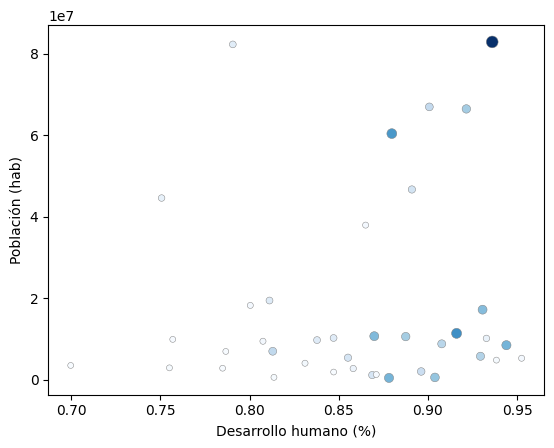

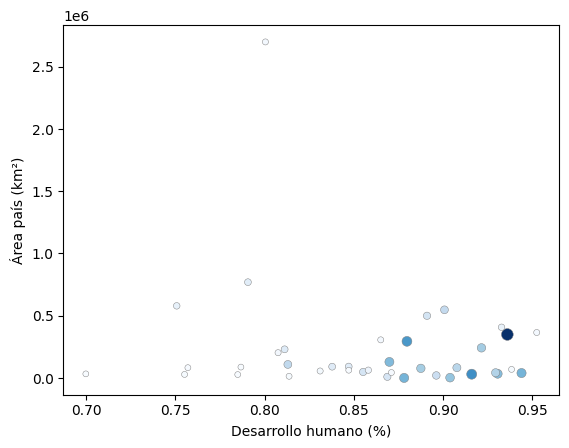

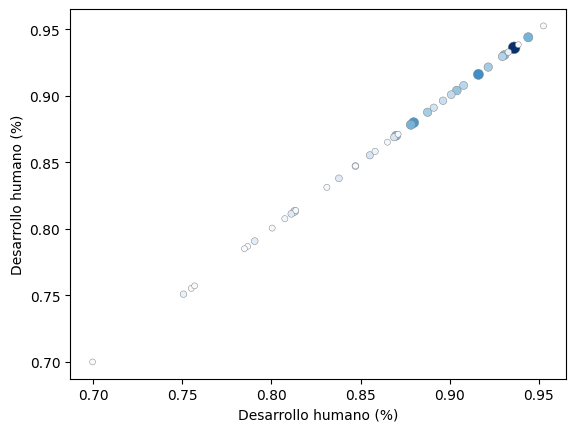

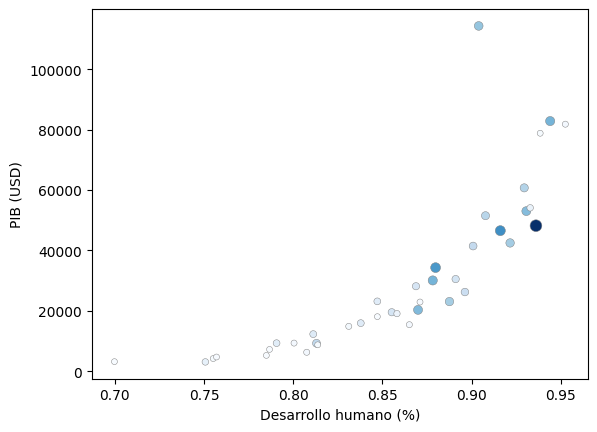

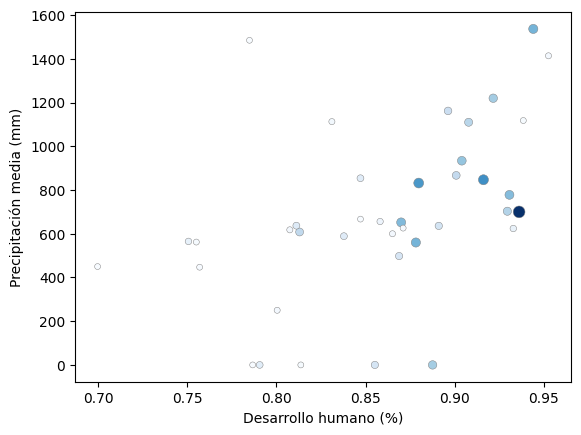

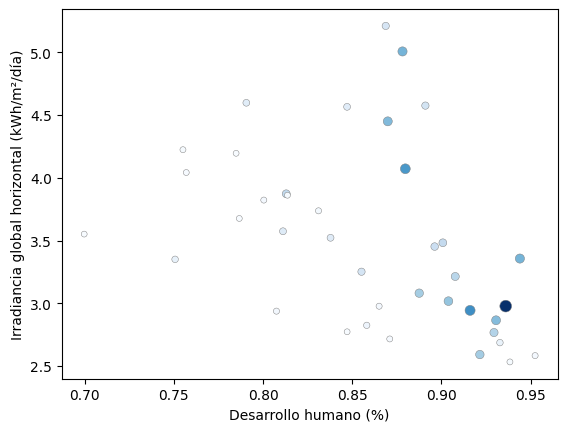

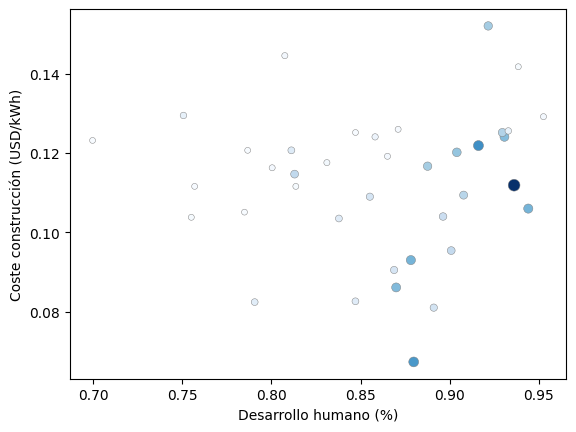

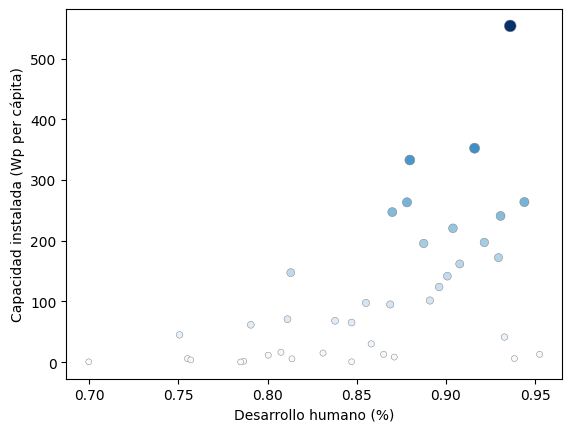

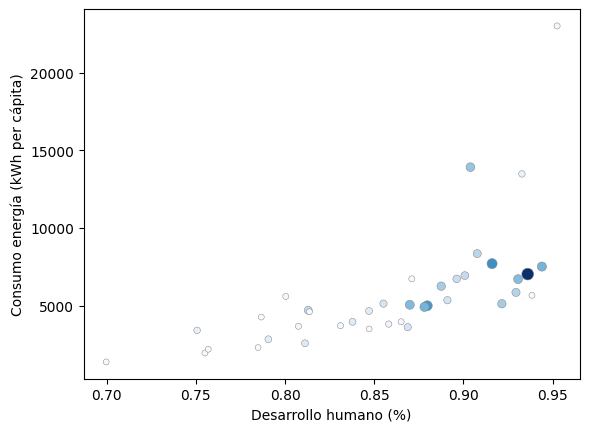

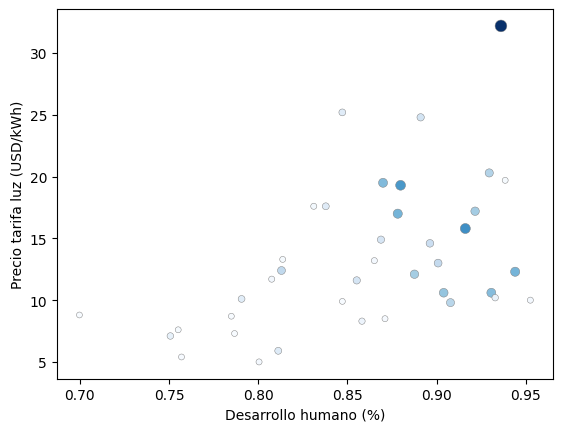

In [93]:
#VARIABLE PRINCIPAL DESARROLLO HUMANO
dispersion_3_var(df_eu_capacidad_upper, "Desarrollo humano (%)","Capacidad instalada (Wp per cápita)")

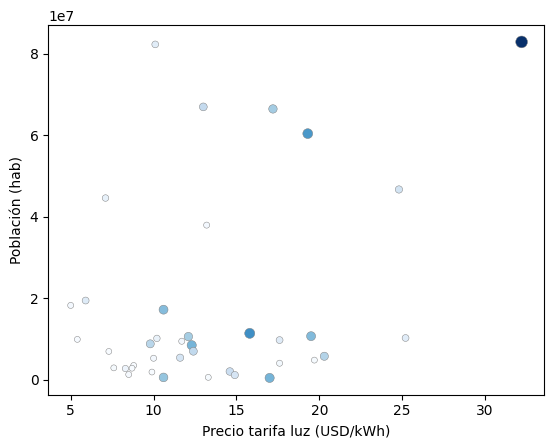

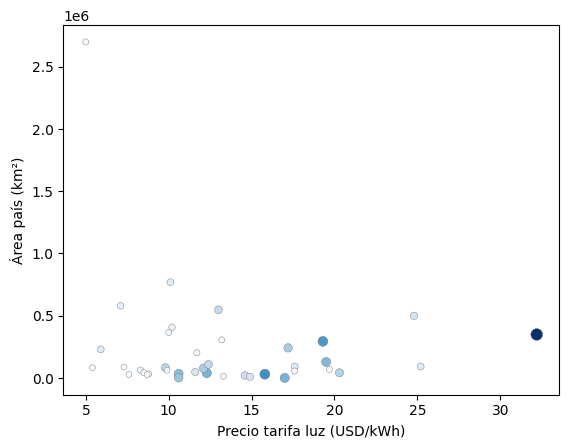

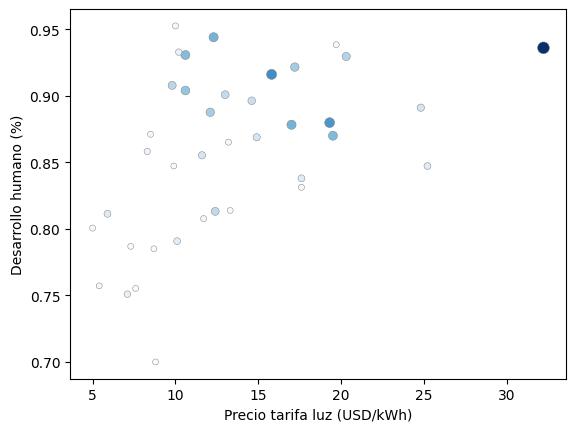

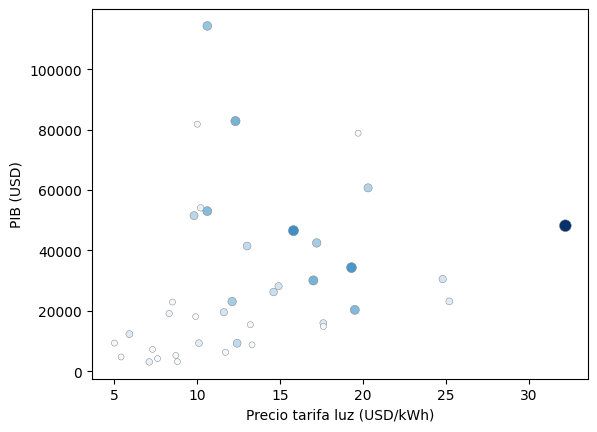

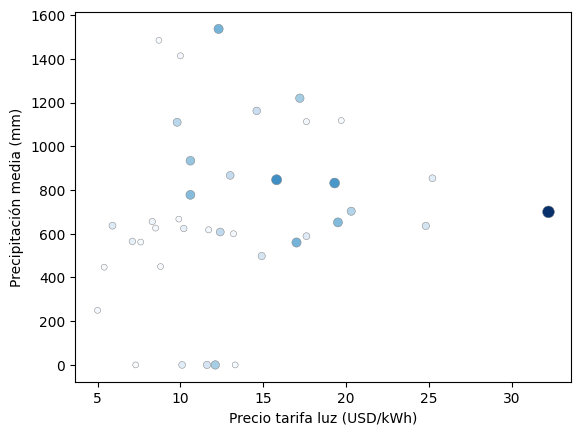

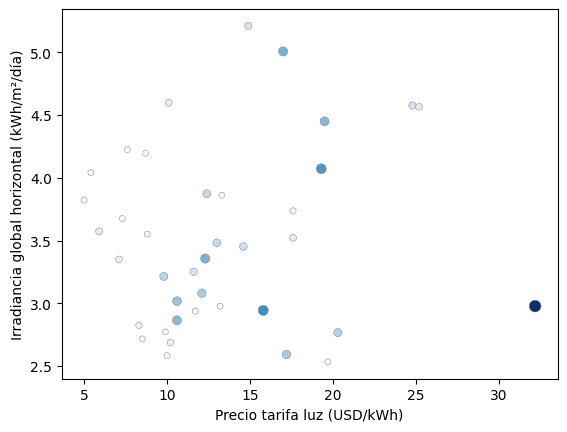

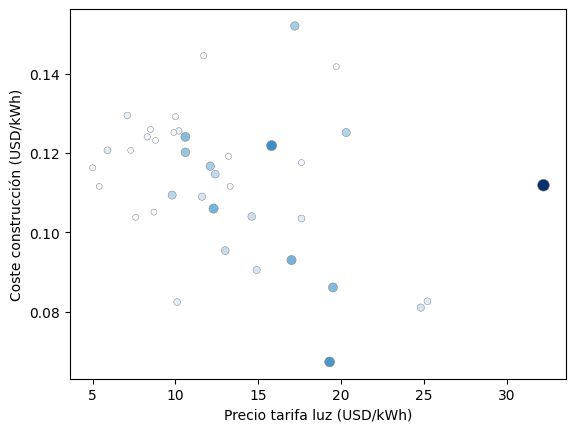

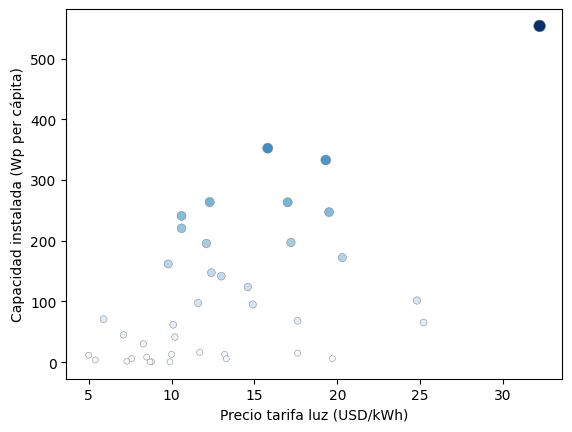

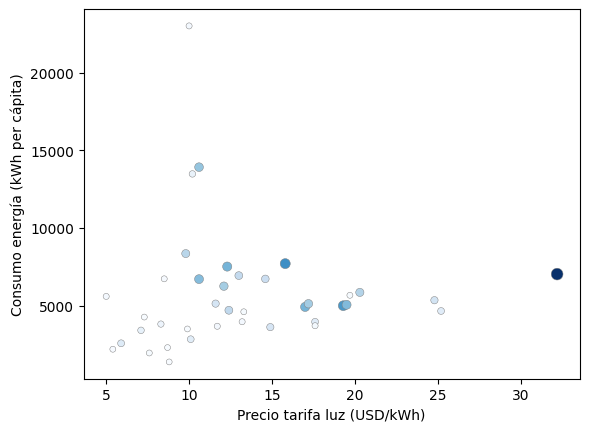

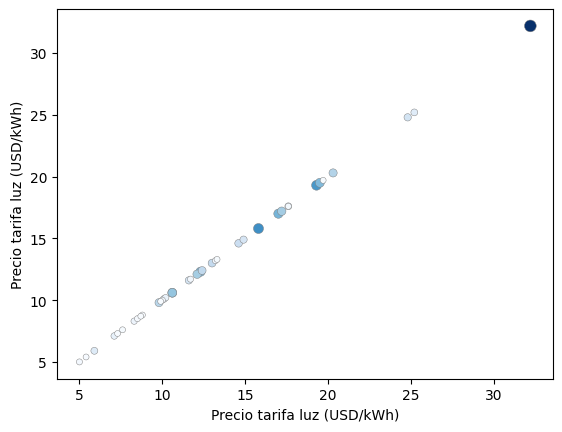

In [94]:
dispersion_3_var(df_eu_capacidad_upper,"Precio tarifa luz (USD/kWh)","Capacidad instalada (Wp per cápita)")

4 variables - Gráfico de dispersión

In [95]:
#Función grafico dispersión de 4 variables
def dispersion_4_var(df,x1,z1,w1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[w1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

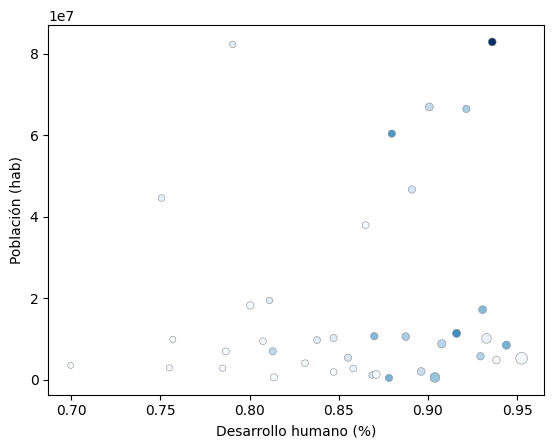

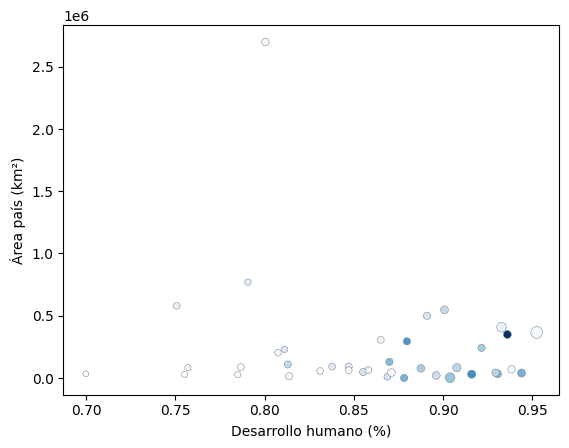

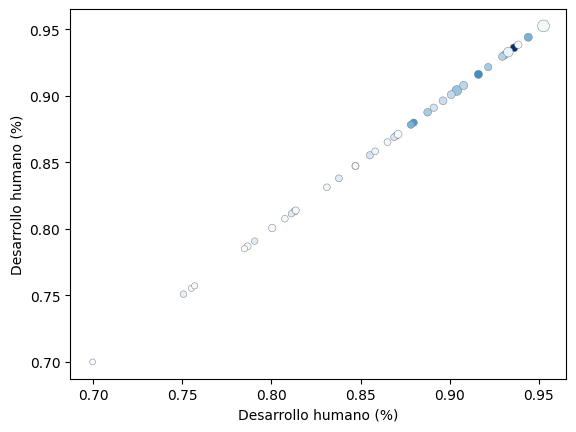

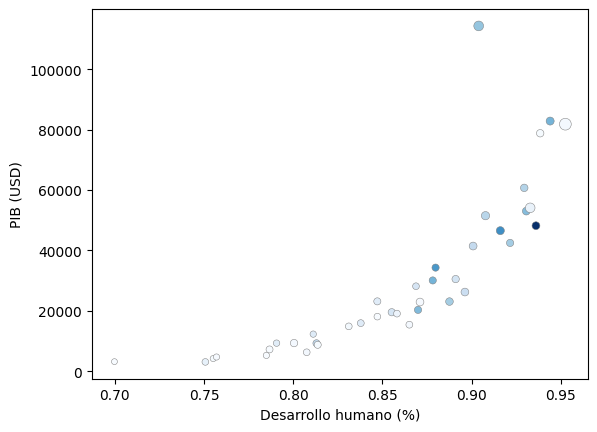

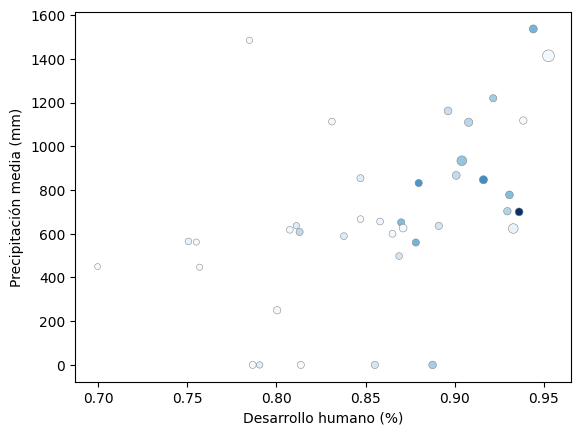

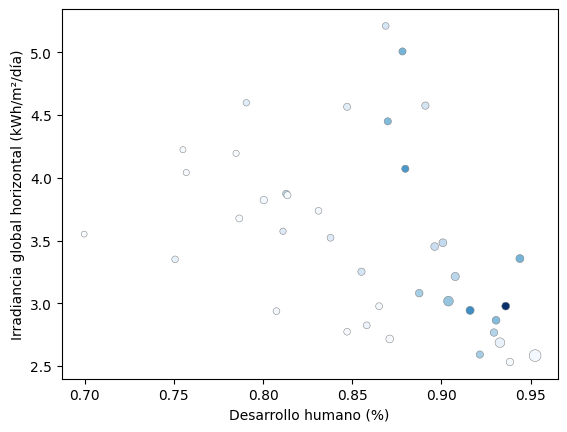

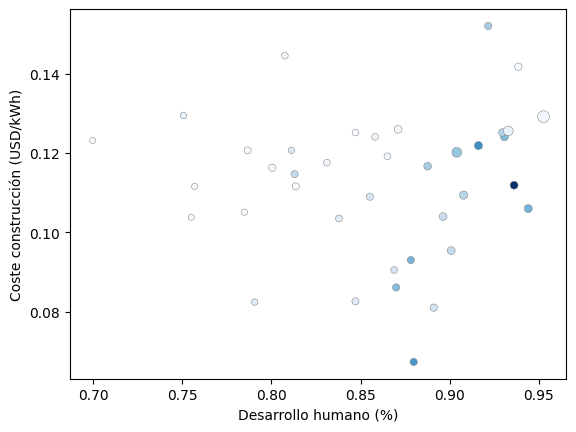

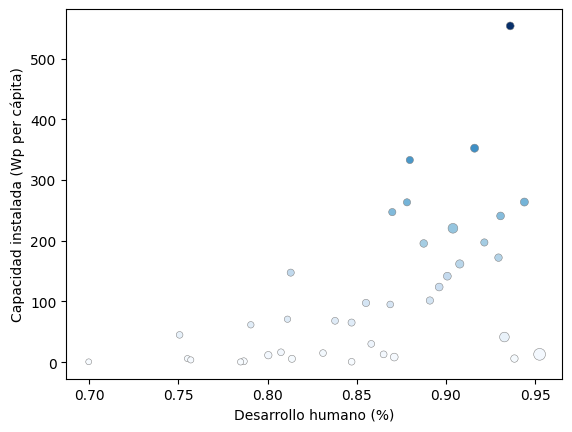

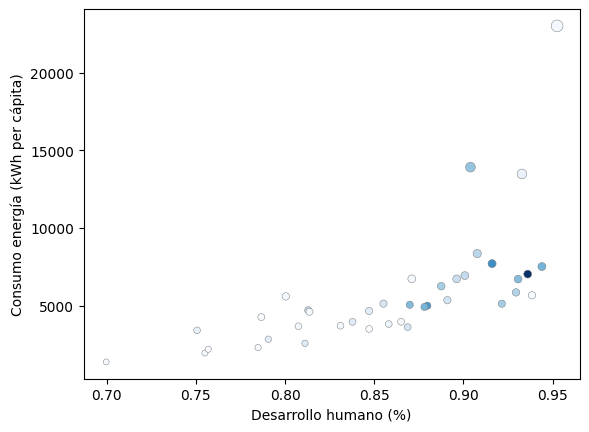

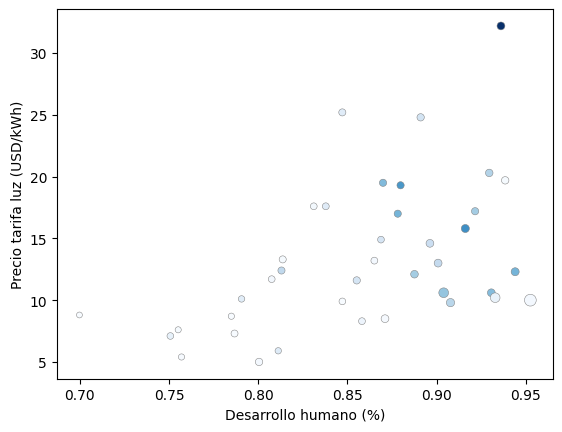

In [96]:
dispersion_4_var(df_eu_capacidad_upper,"Desarrollo humano (%)","Consumo energía (kWh per cápita)", "Capacidad instalada (Wp per cápita)" )

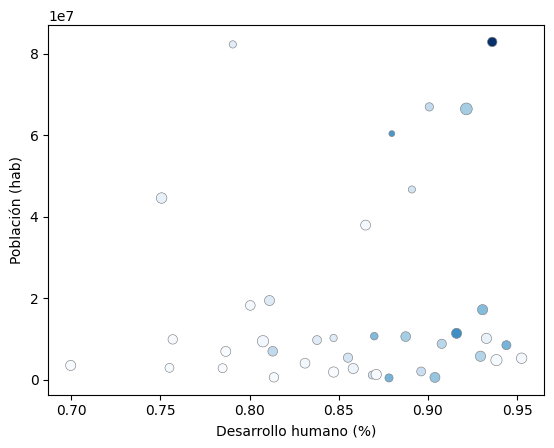

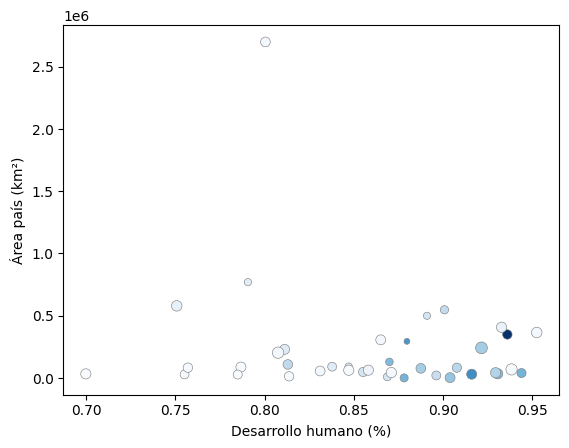

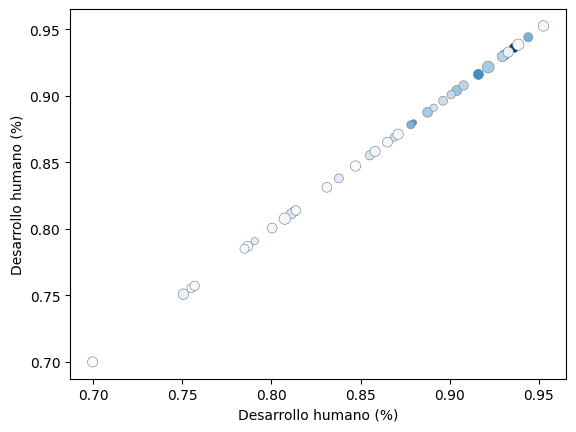

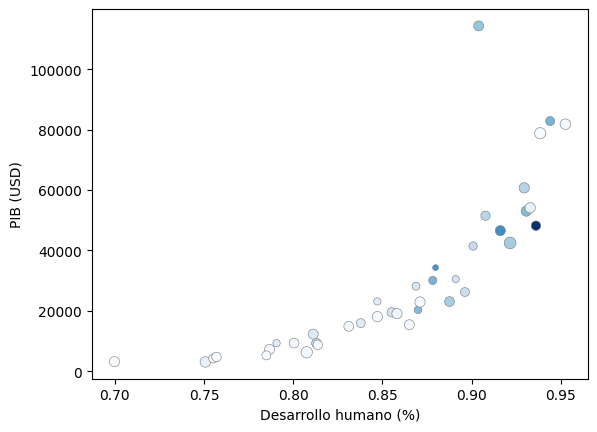

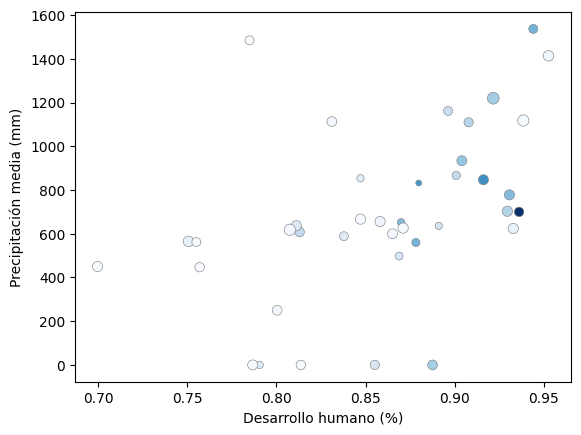

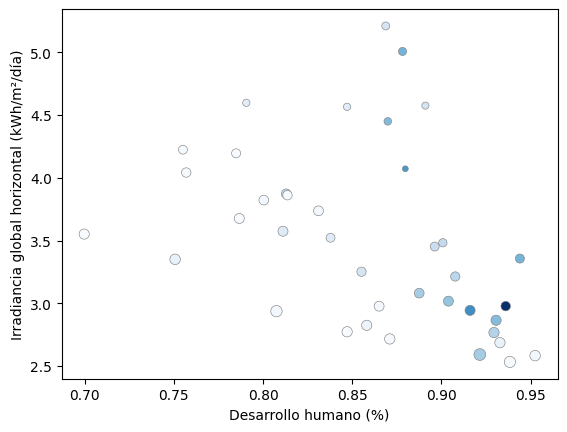

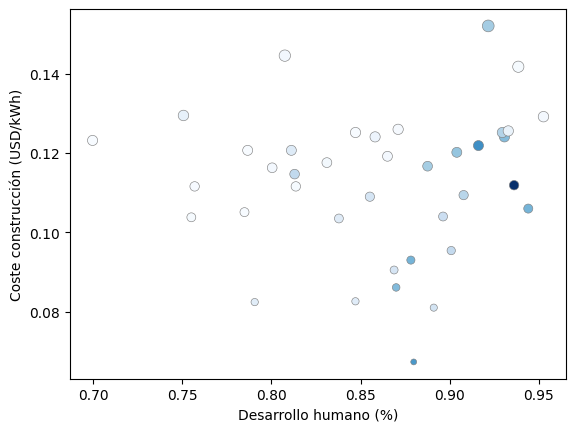

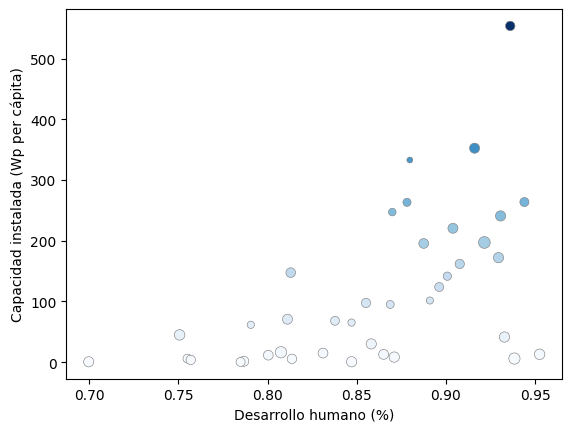

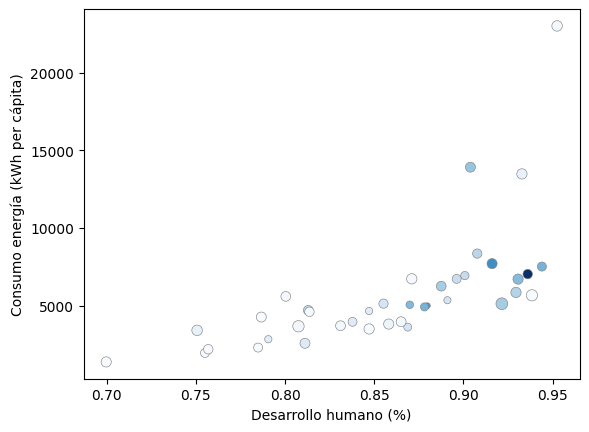

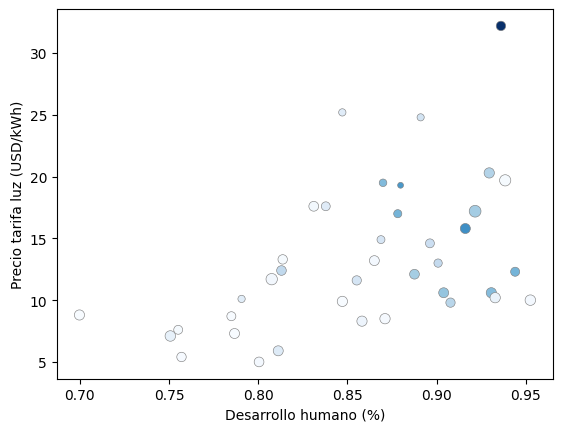

In [97]:
dispersion_4_var(df_eu_capacidad_upper,"Desarrollo humano (%)","Coste construcción (USD/kWh)", "Capacidad instalada (Wp per cápita)" )

In [98]:

#Si no encontramos porque se invierte, quiza interesa saber porque NO se invierte,
# slicing de coste  de 0.10 a 0.13 y capacidad instalada menor

df_eu_coste = df_index.loc[(df_index["Coste construcción (USD/kWh)"]<0.13) & (df_index["Coste construcción (USD/kWh)"]>0.10) ]

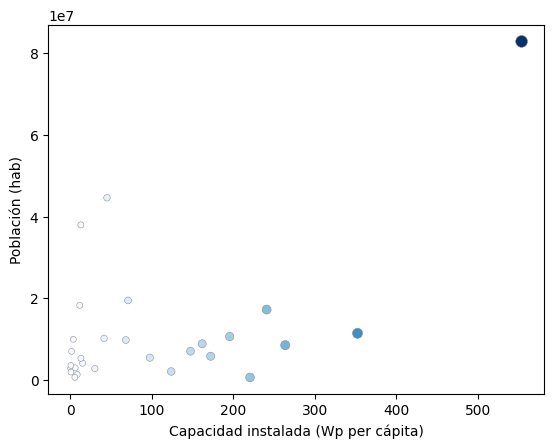

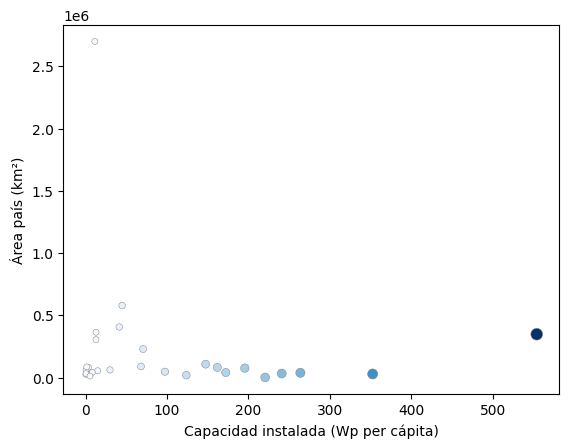

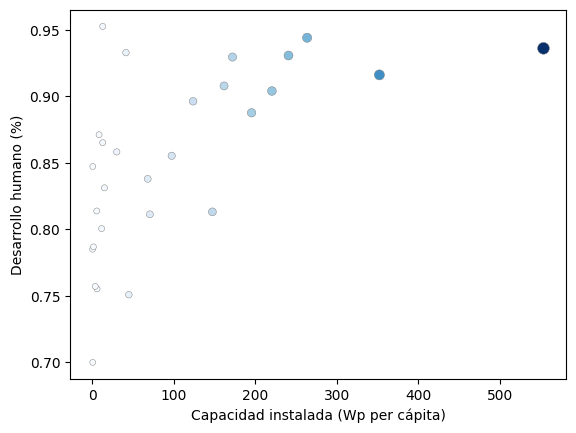

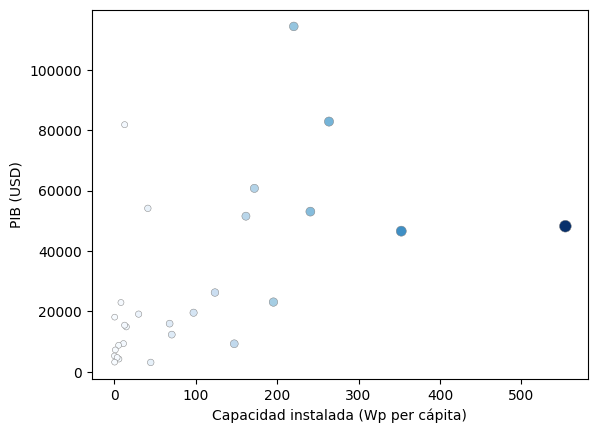

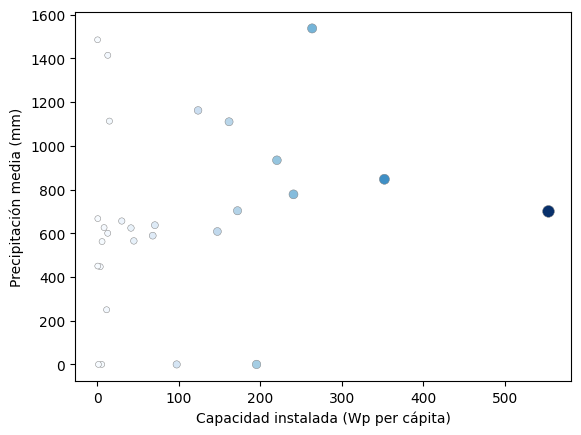

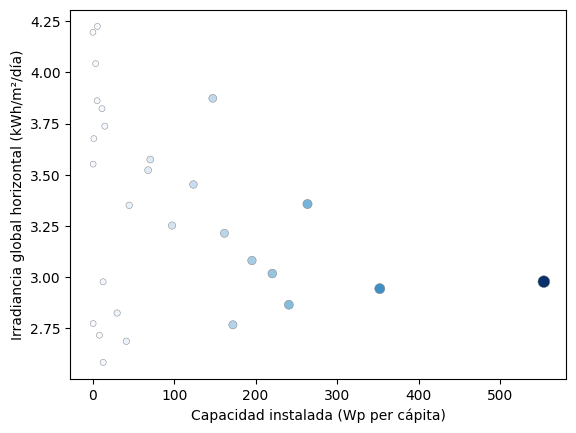

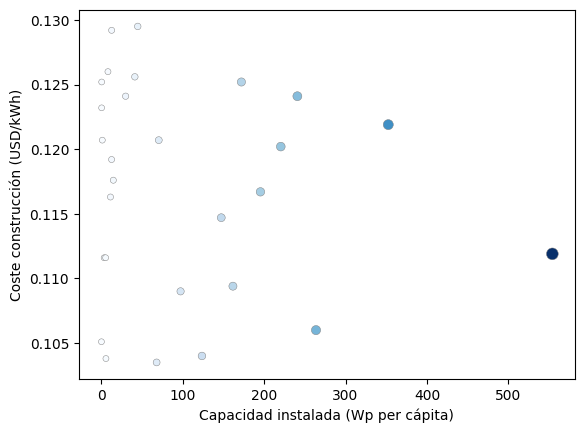

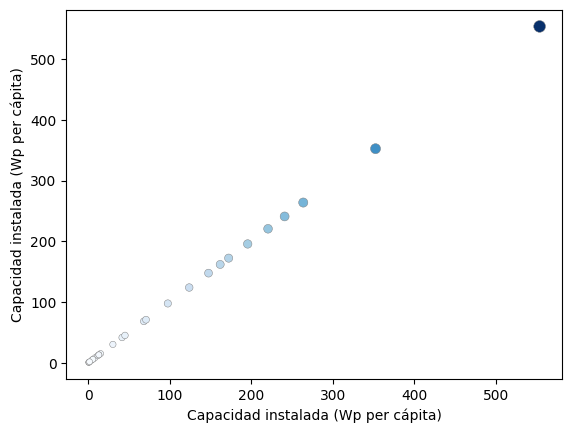

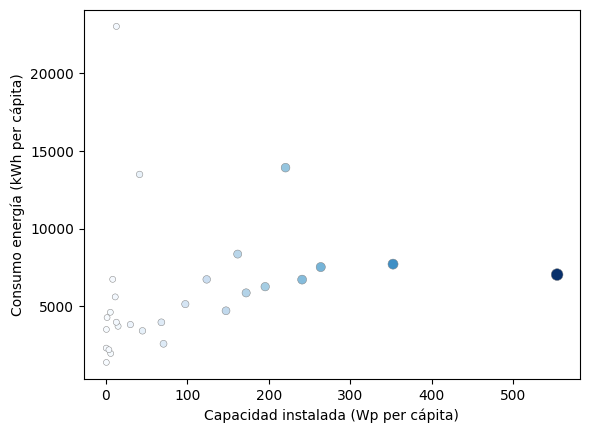

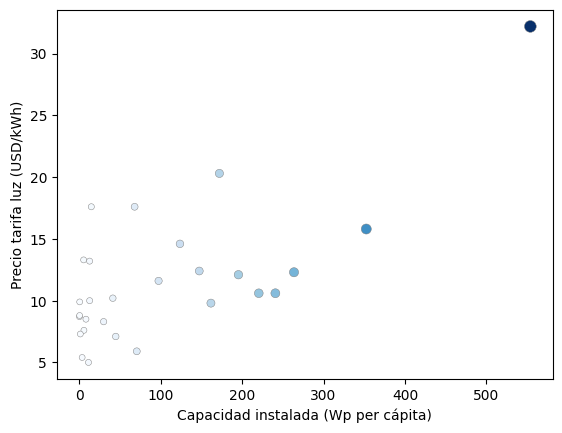

In [99]:
dispersion_4_var(df_eu_coste,"Capacidad instalada (Wp per cápita)","Capacidad instalada (Wp per cápita)", "Capacidad instalada (Wp per cápita)" )

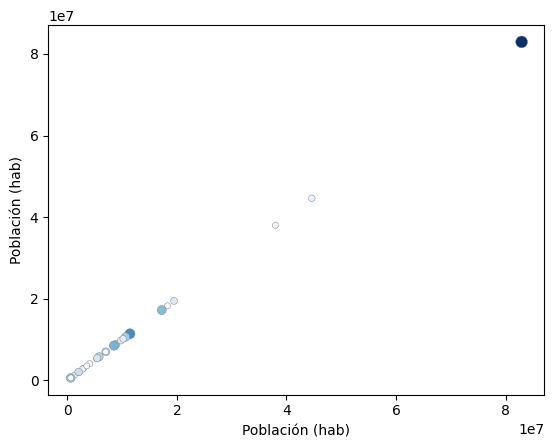

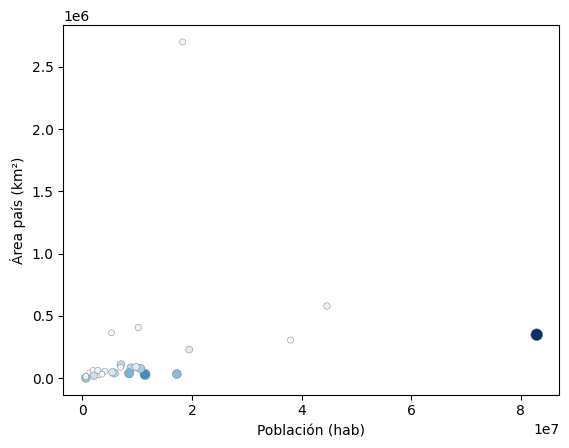

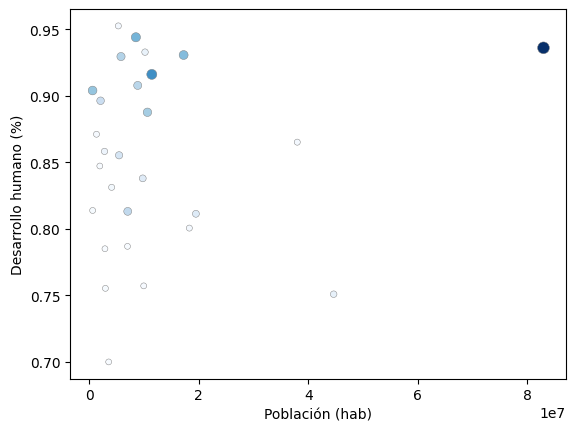

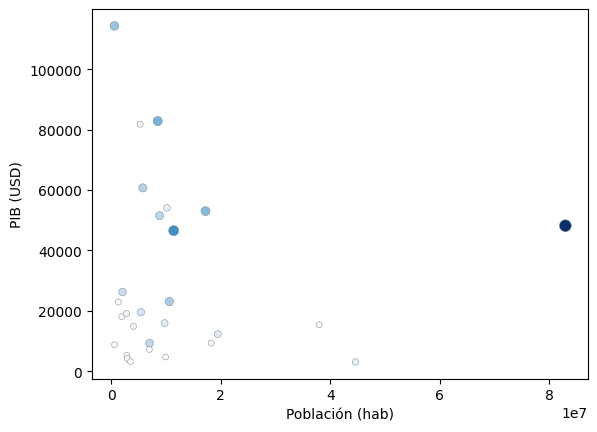

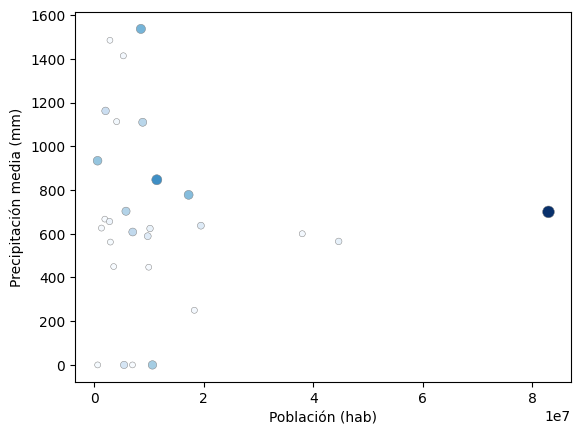

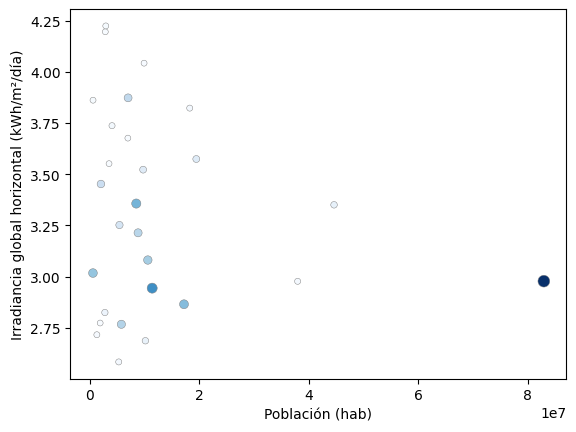

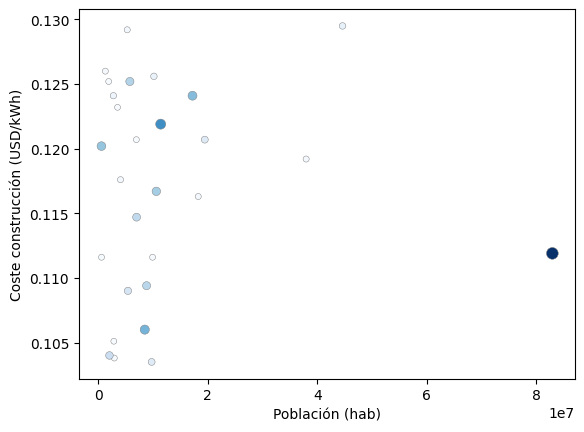

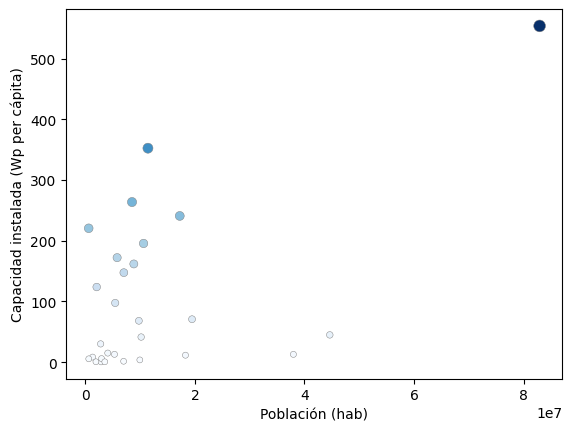

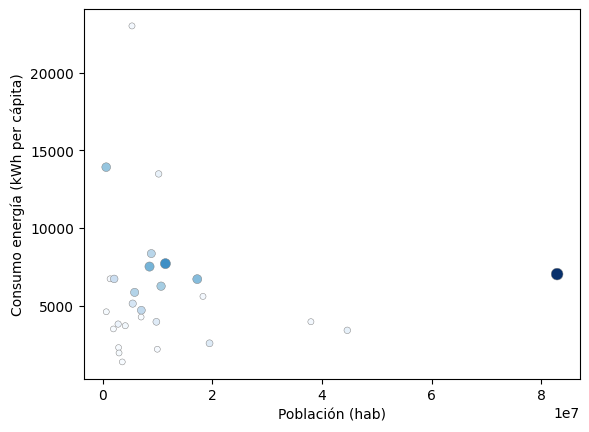

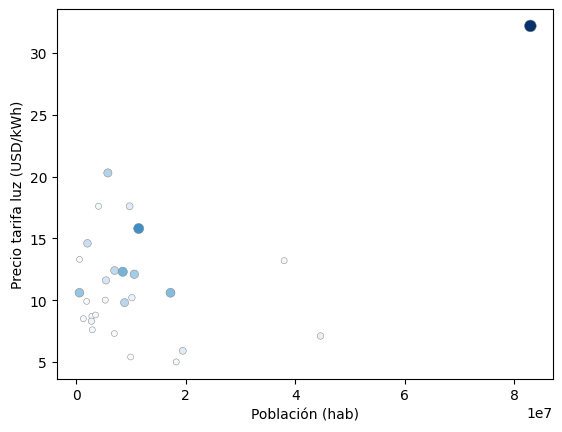

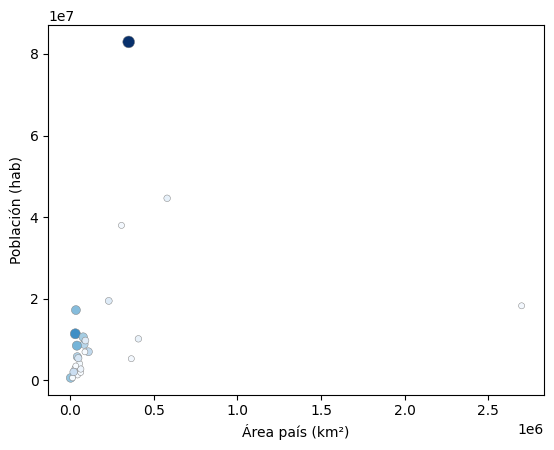

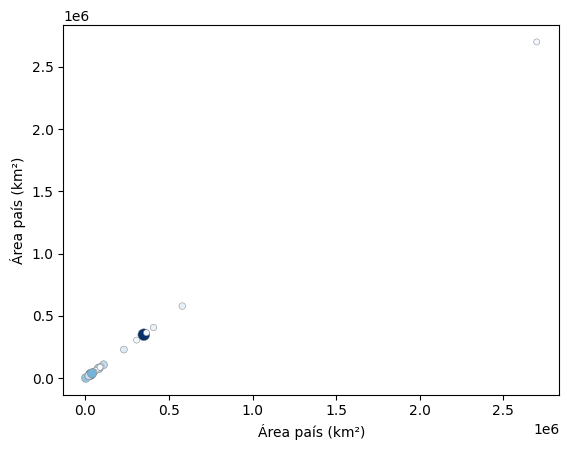

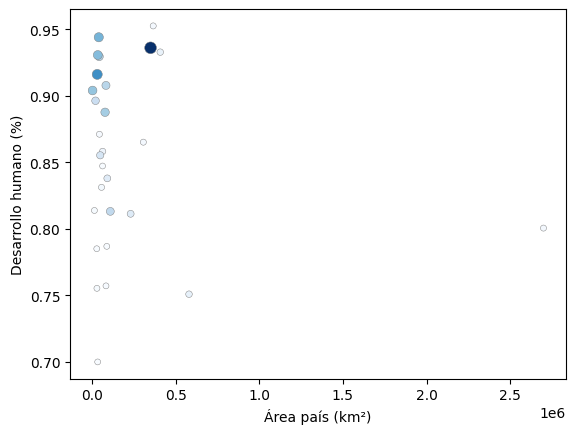

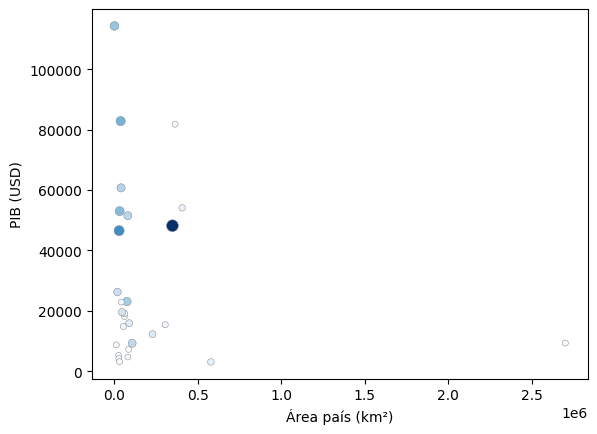

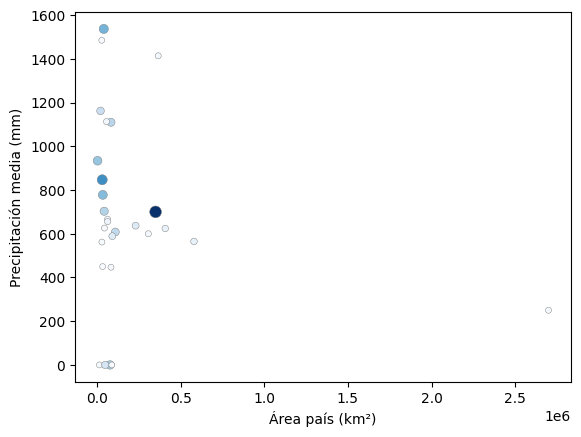

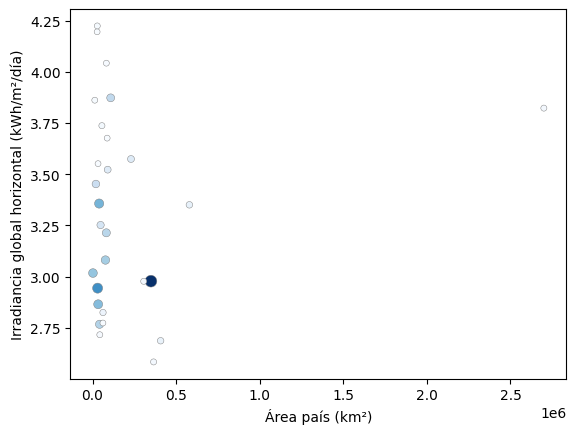

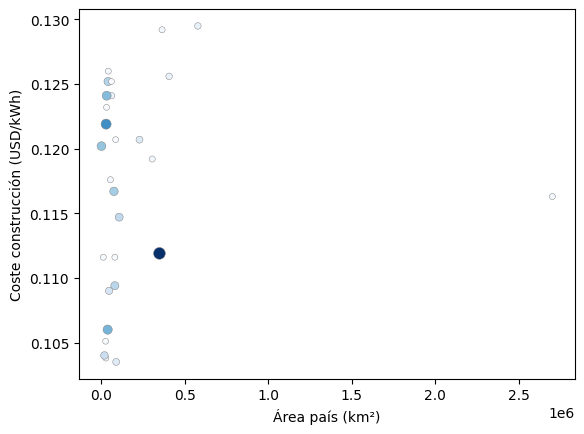

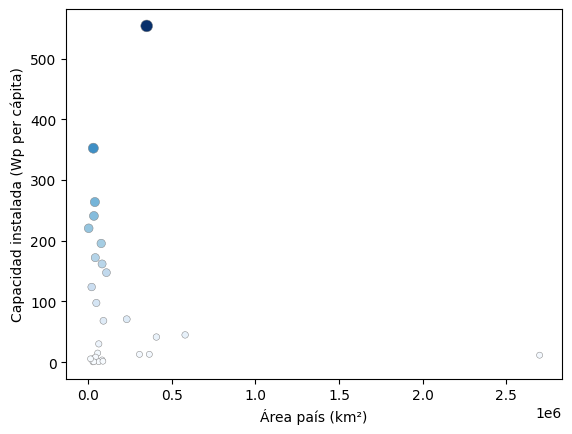

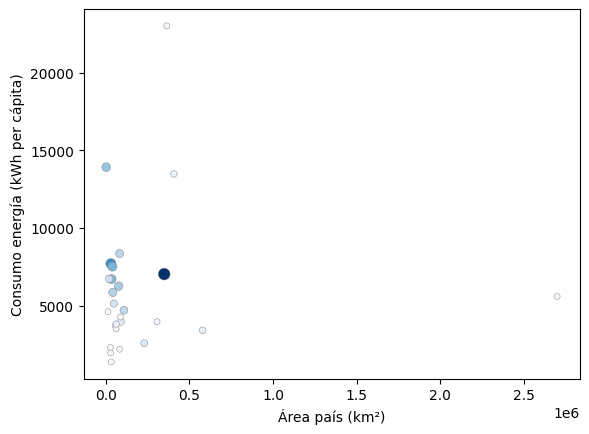

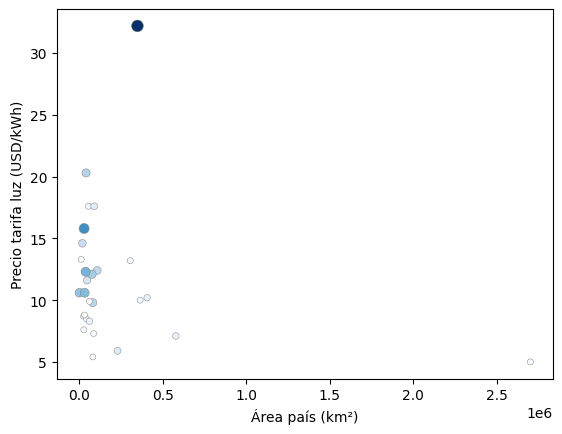

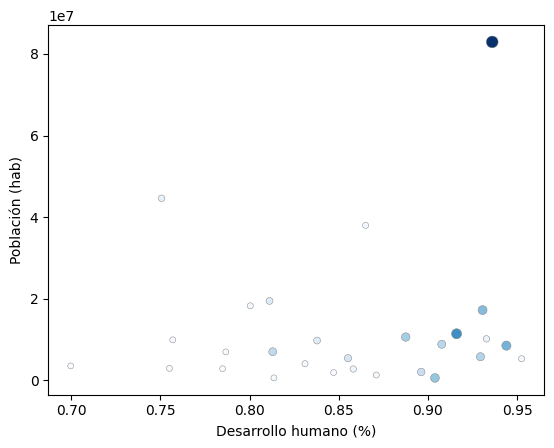

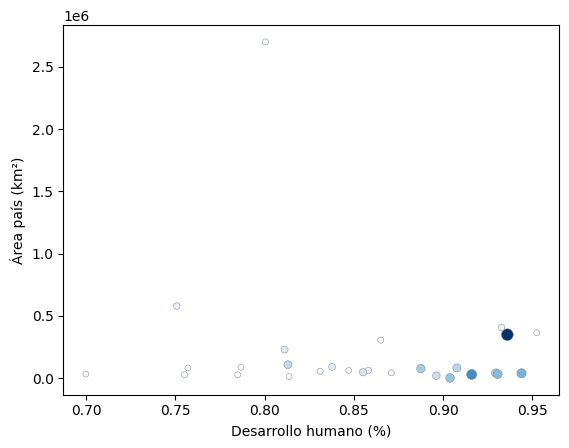

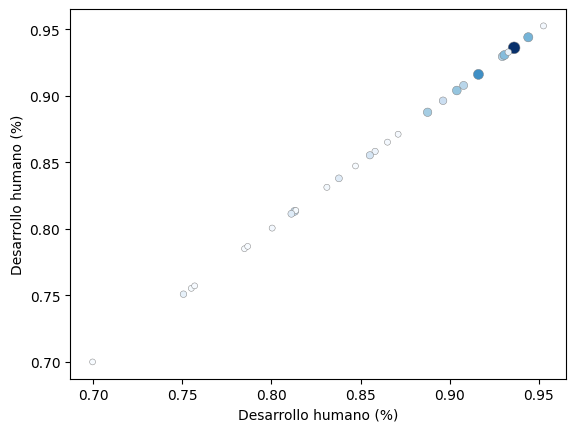

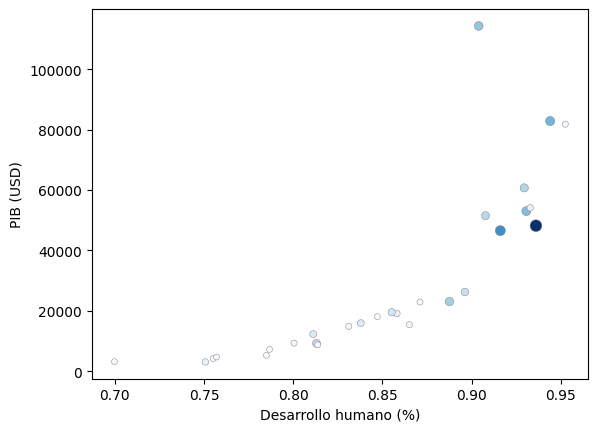

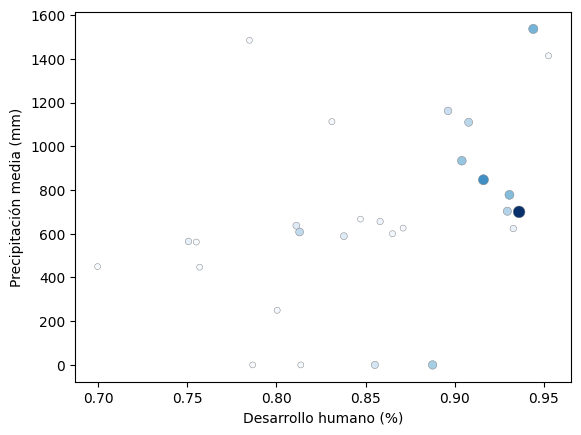

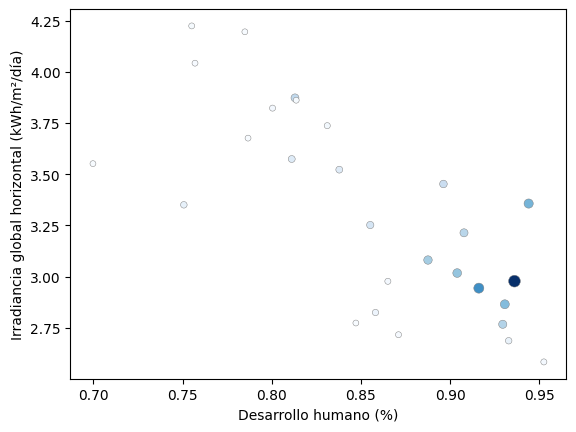

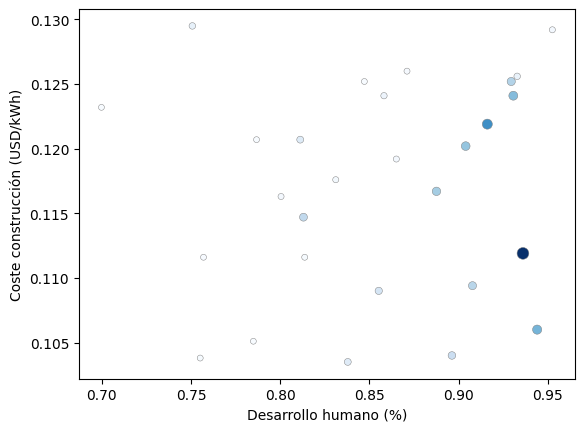

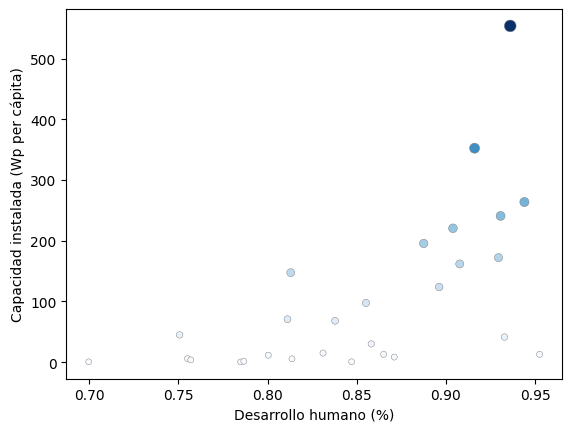

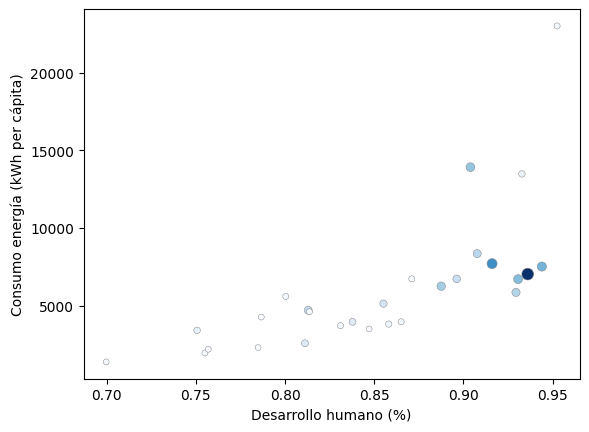

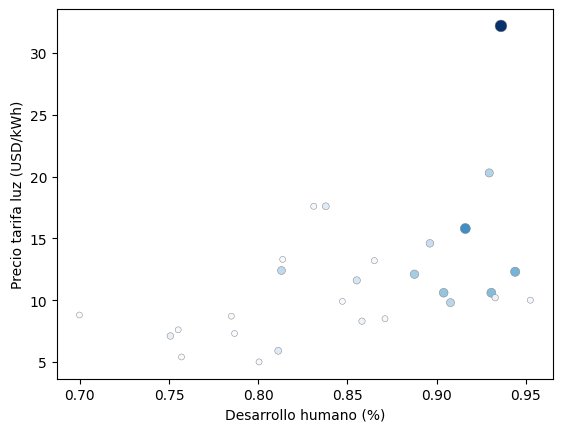

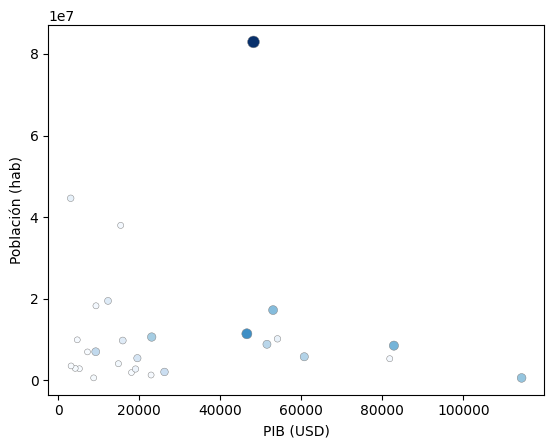

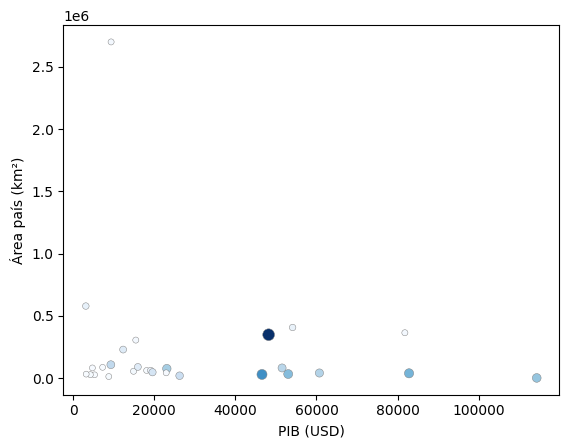

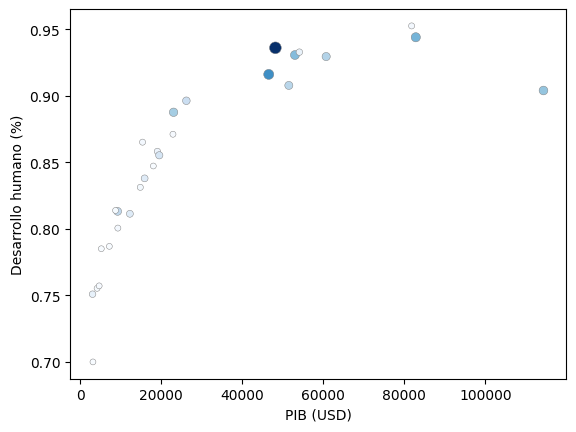

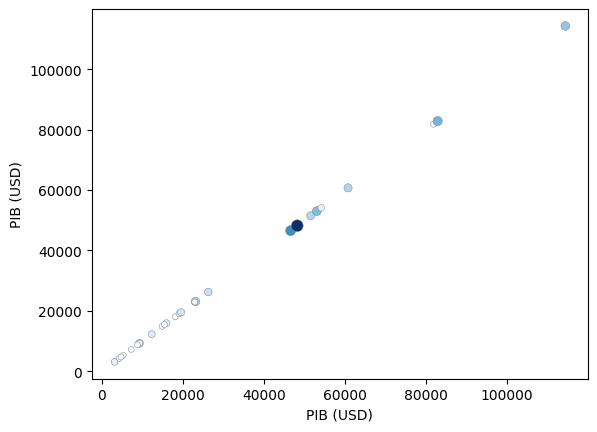

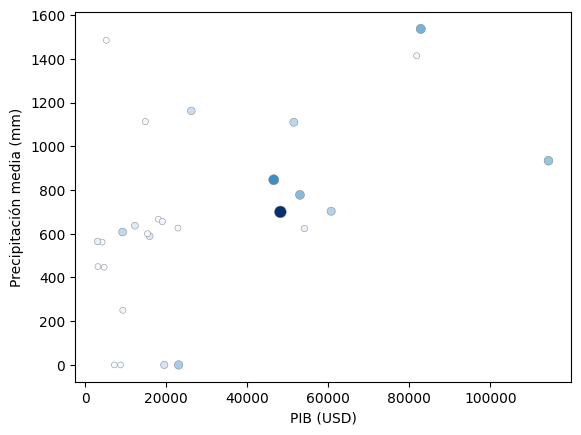

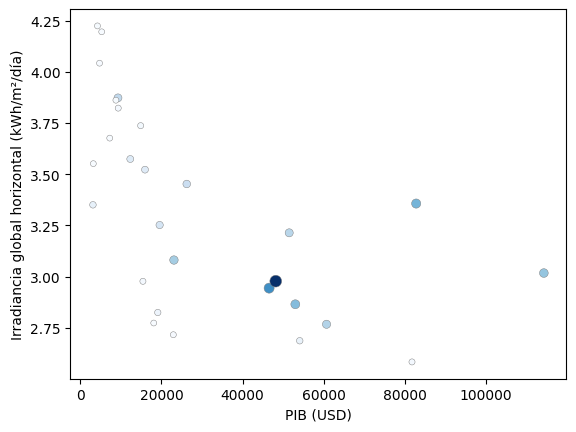

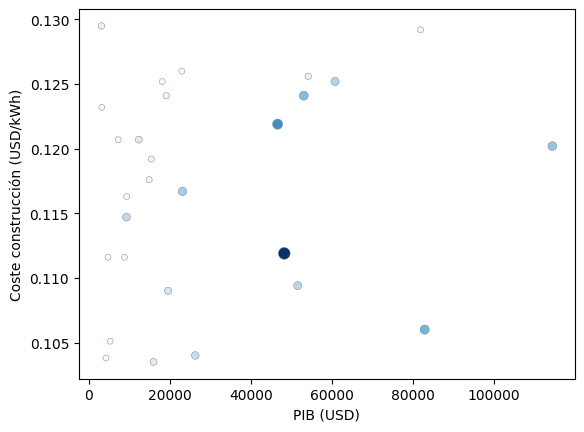

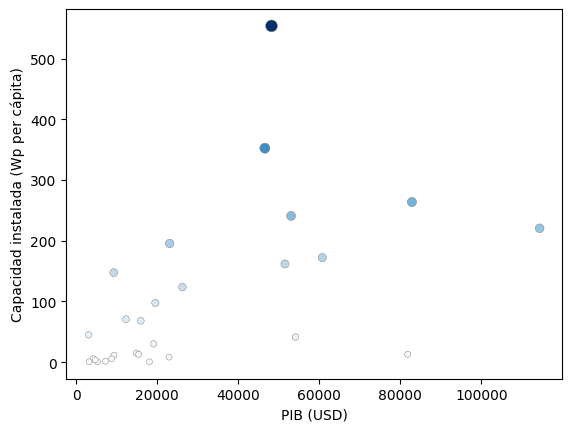

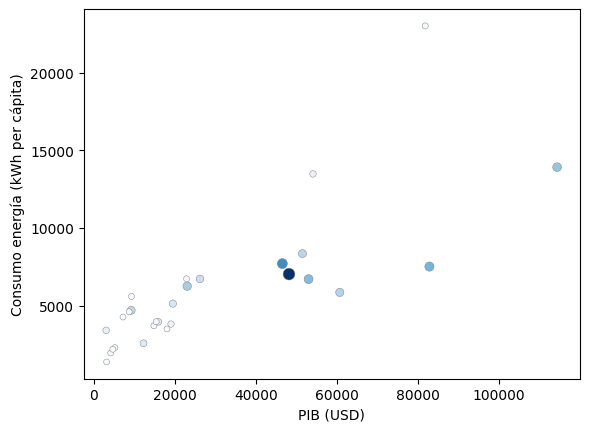

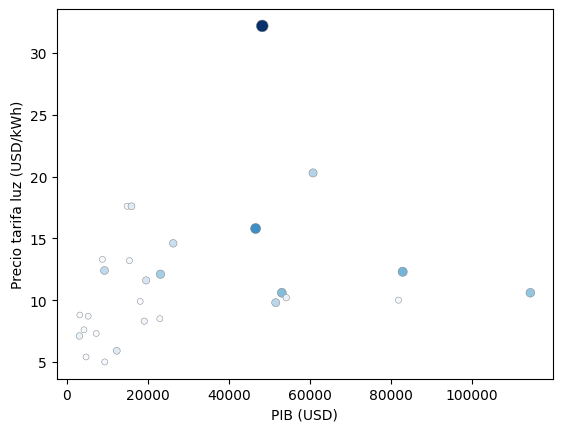

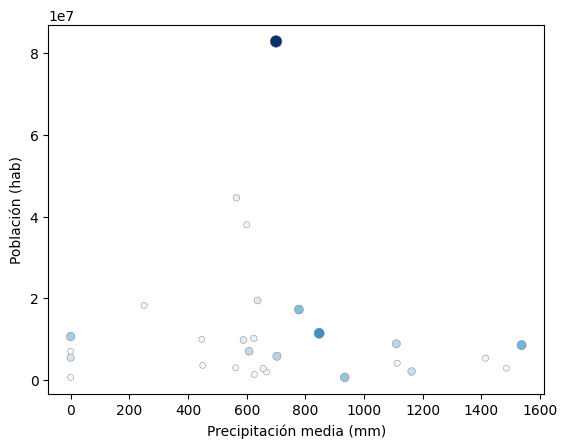

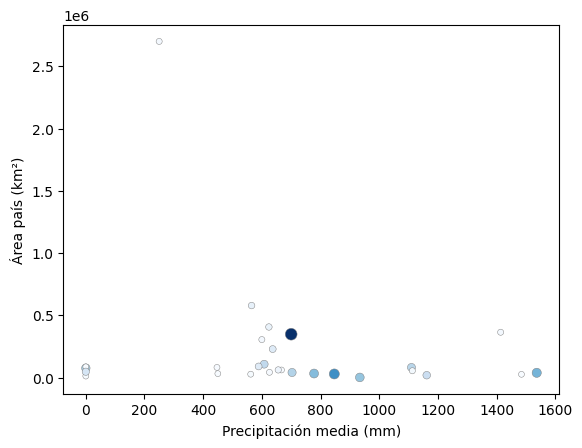

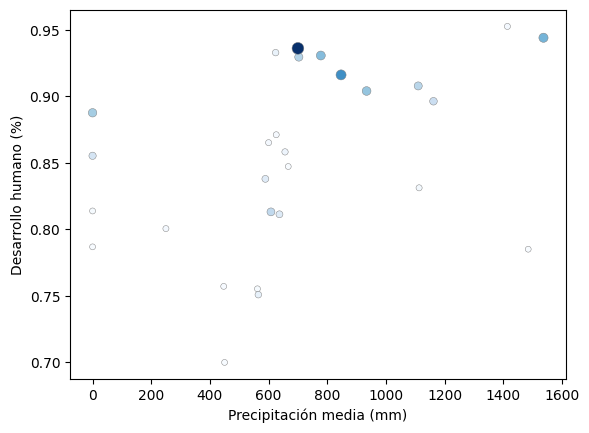

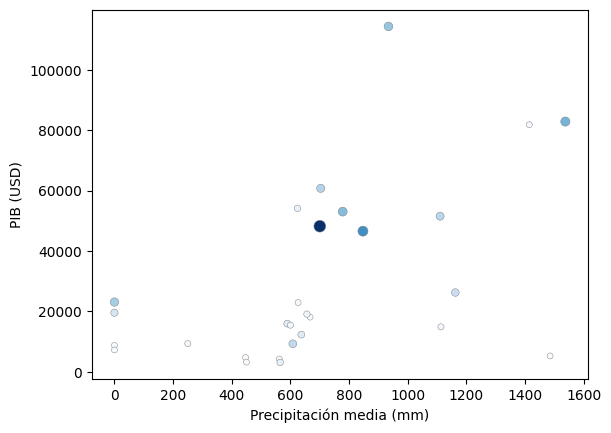

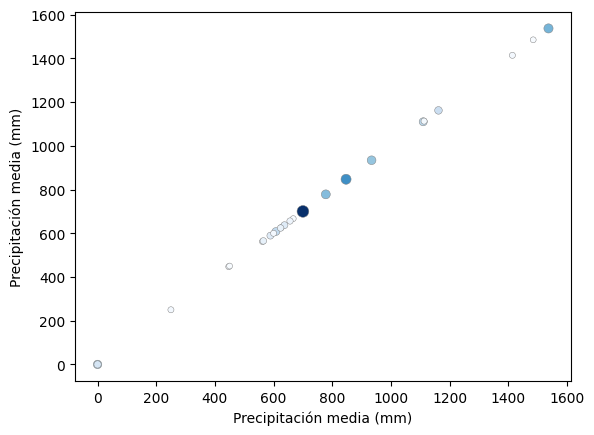

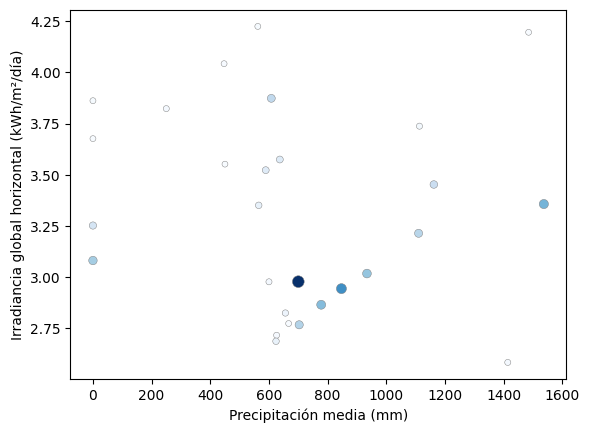

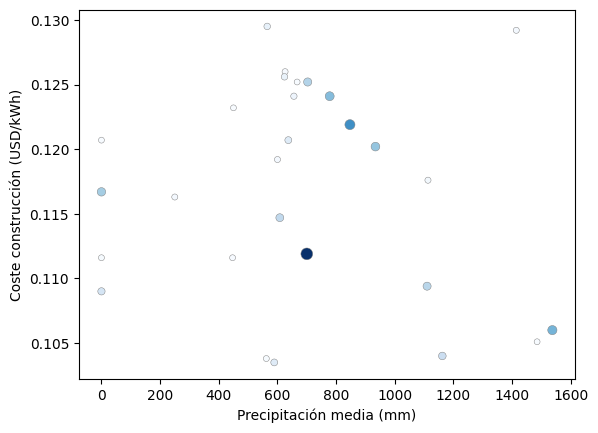

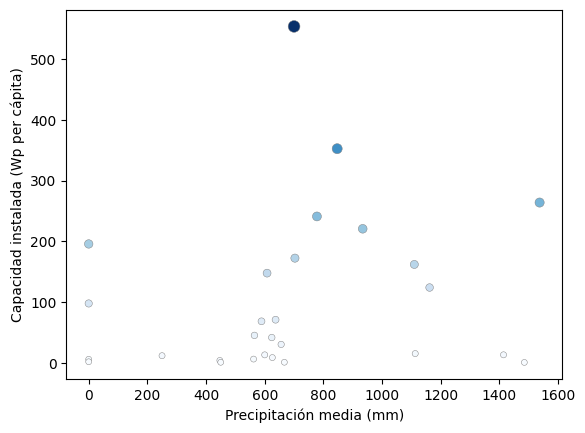

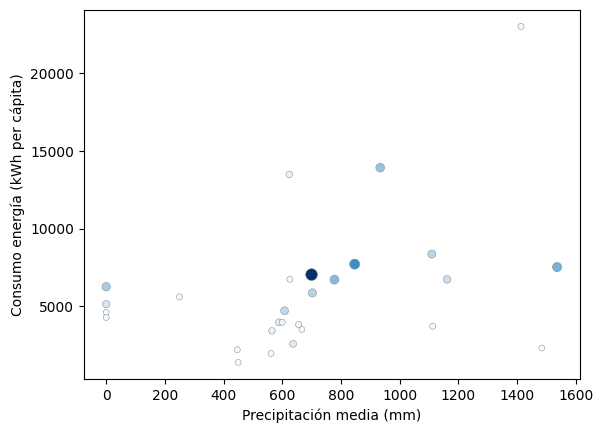

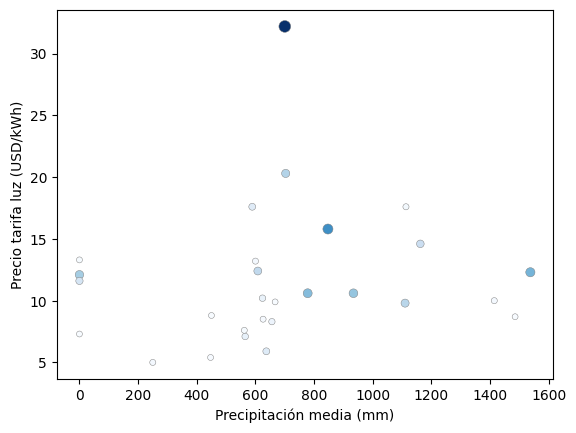

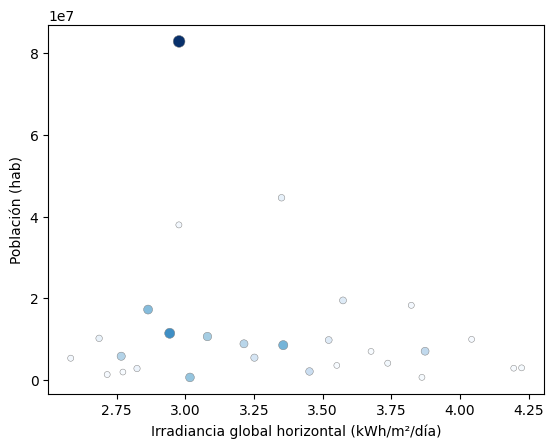

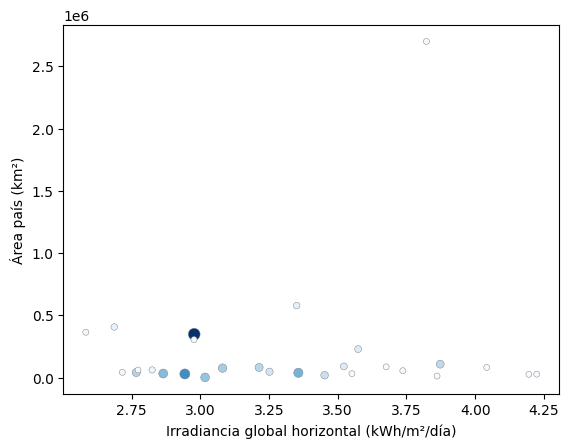

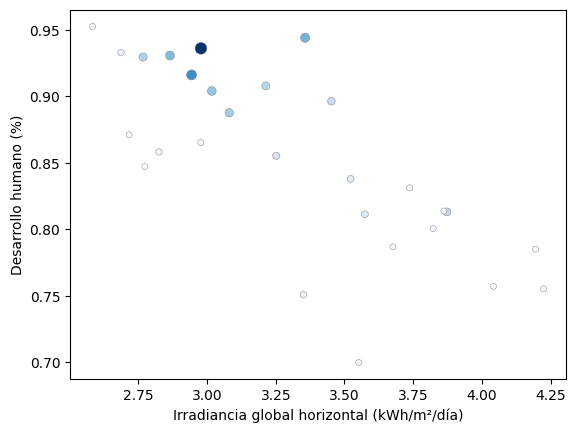

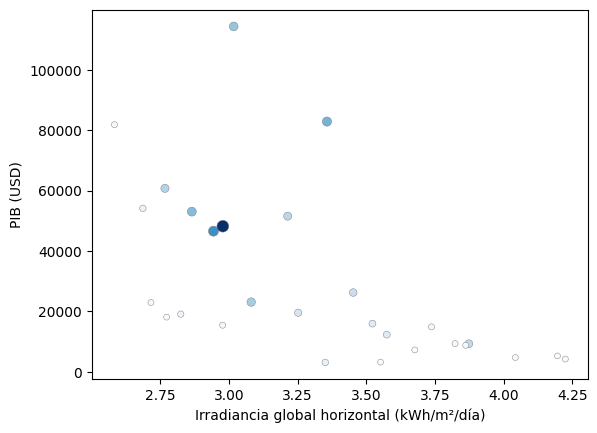

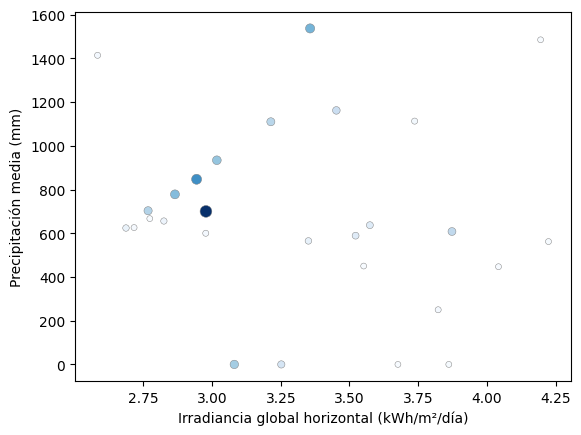

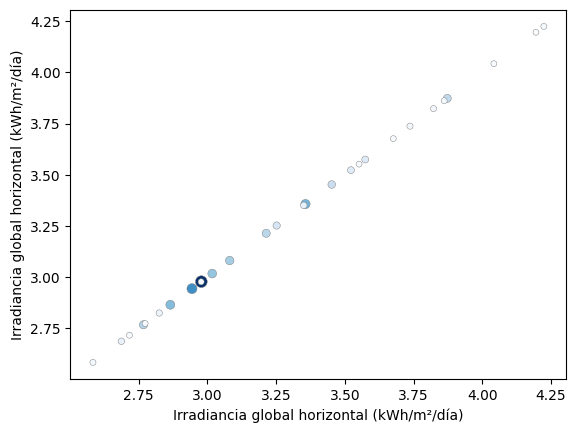

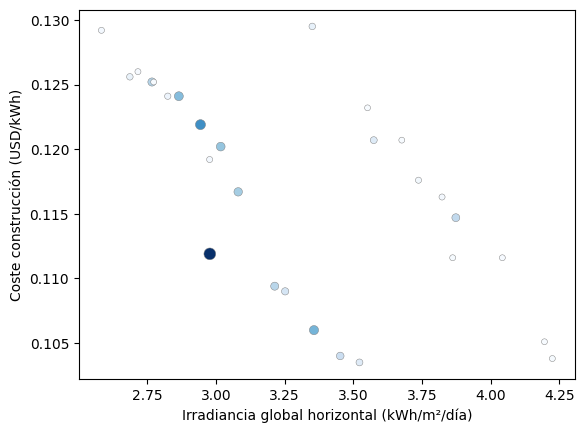

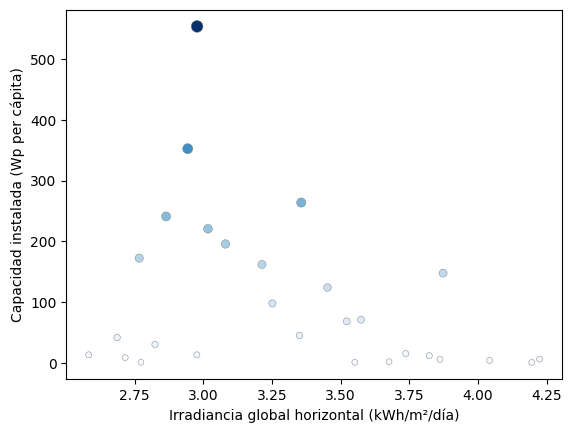

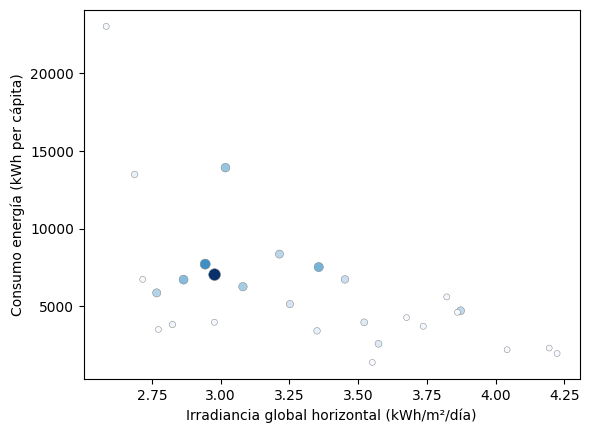

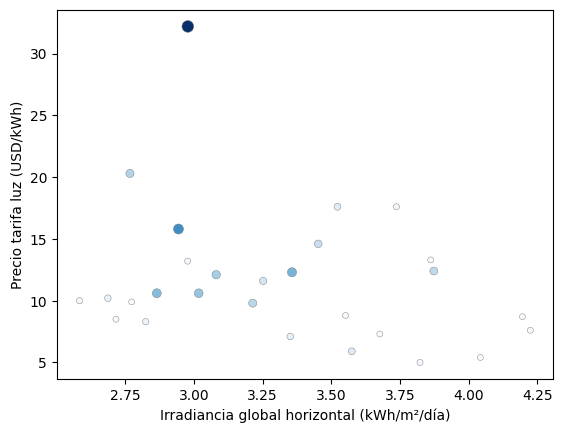

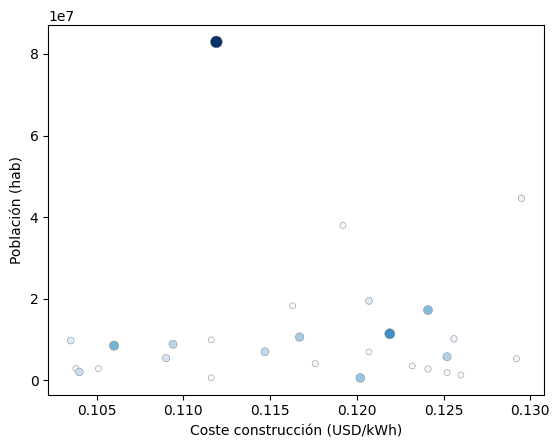

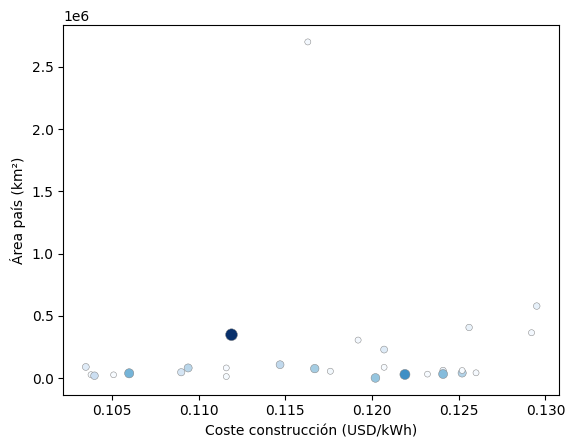

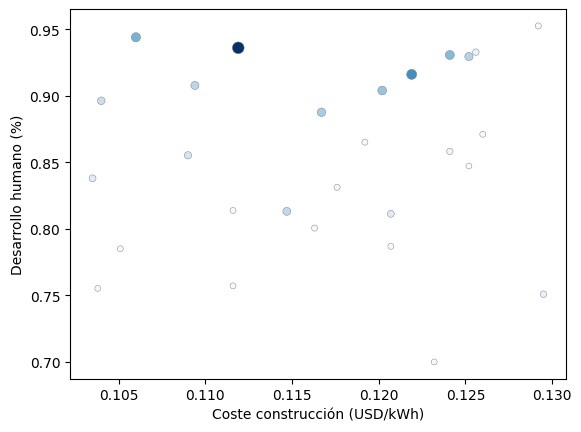

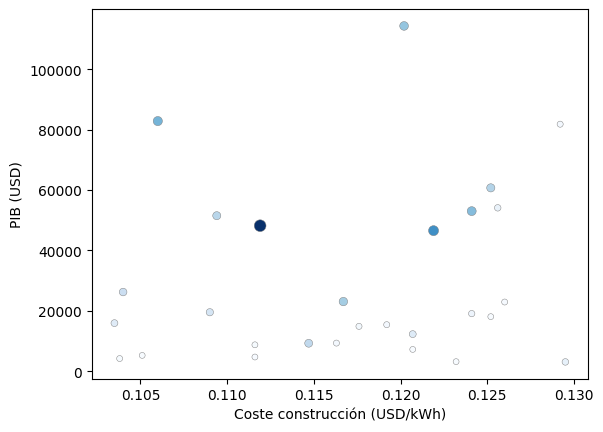

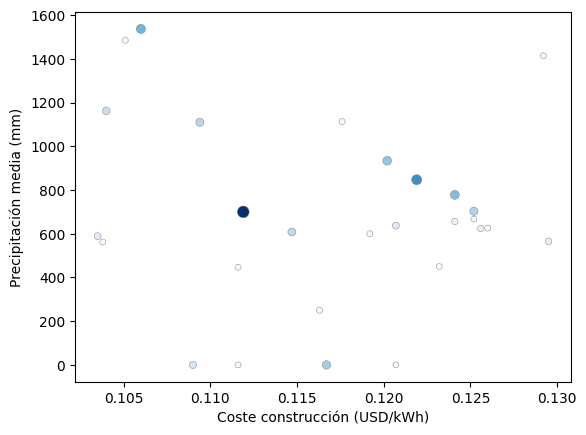

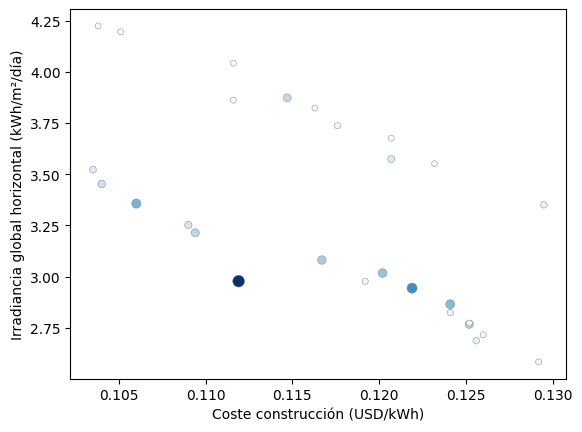

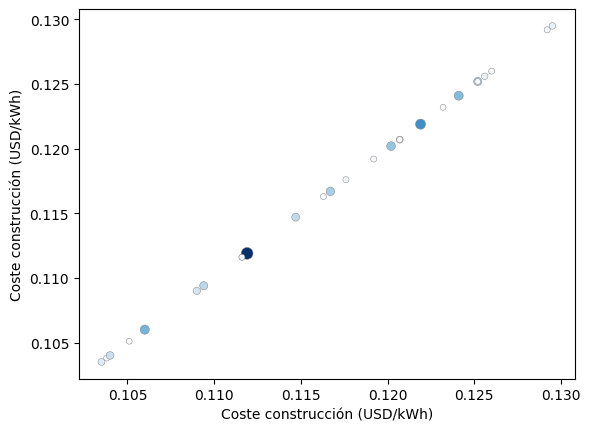

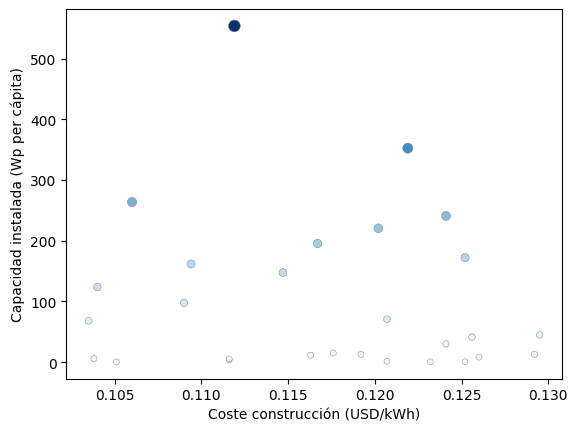

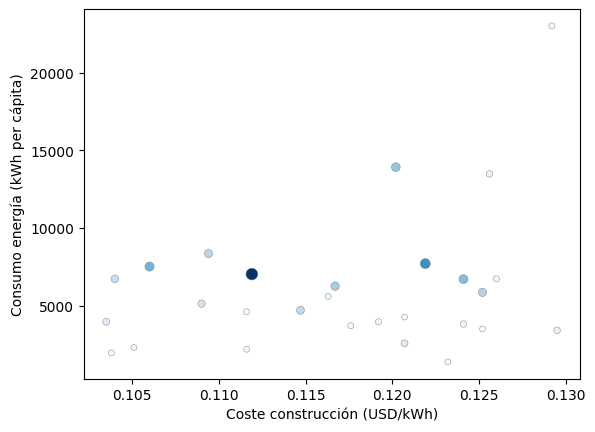

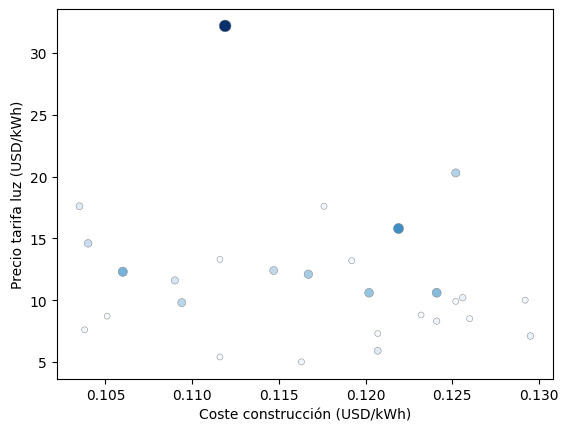

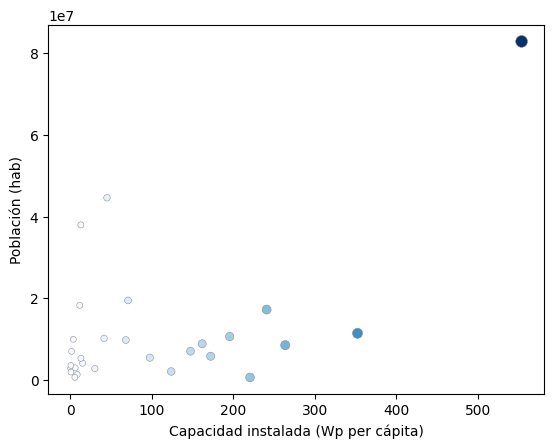

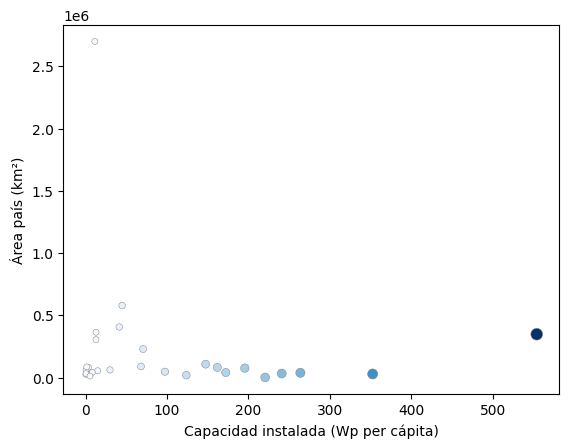

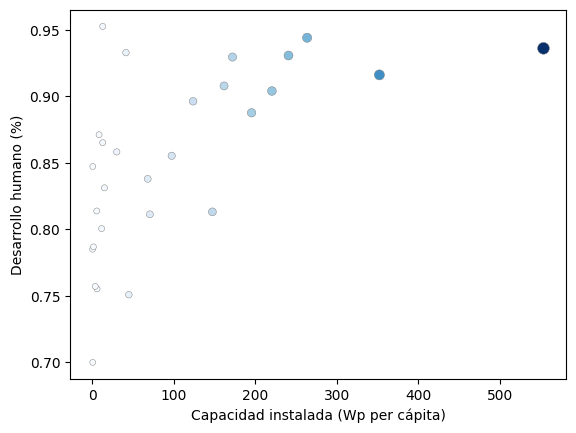

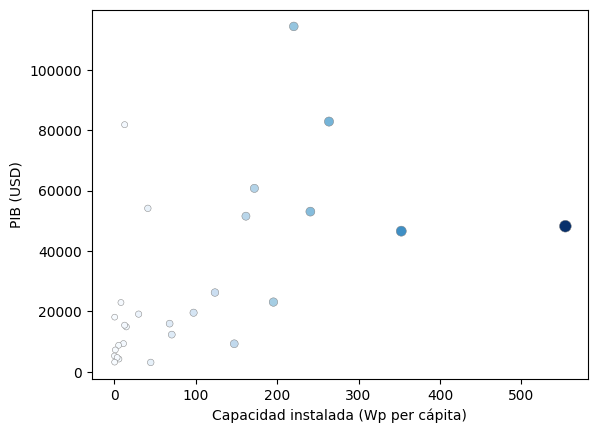

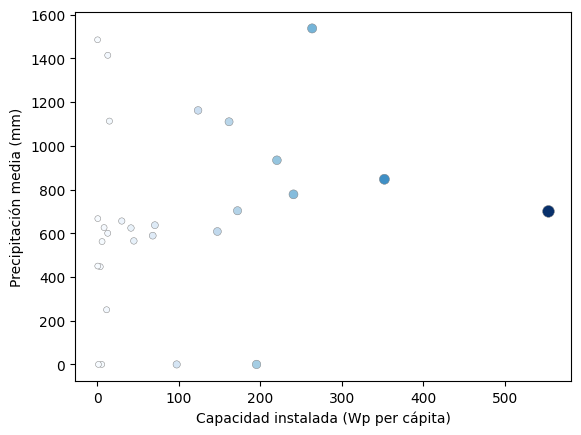

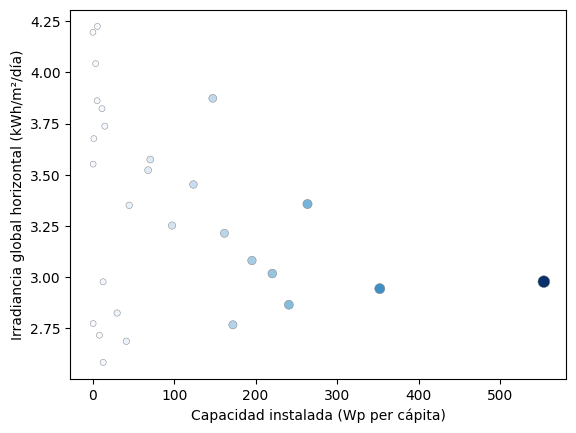

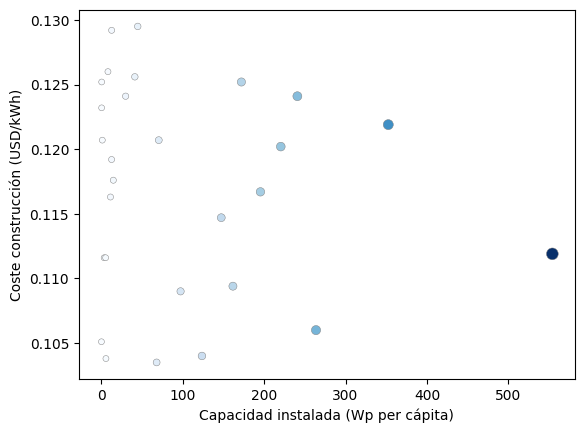

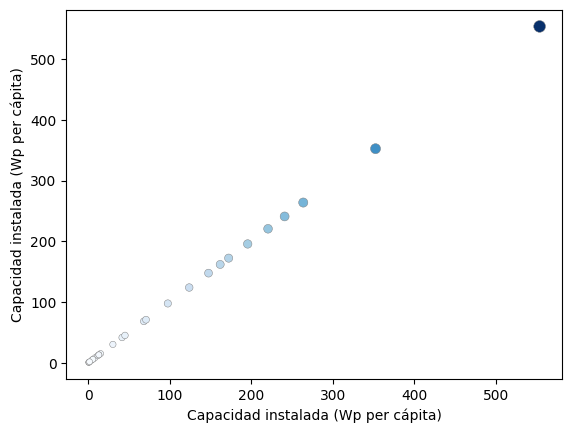

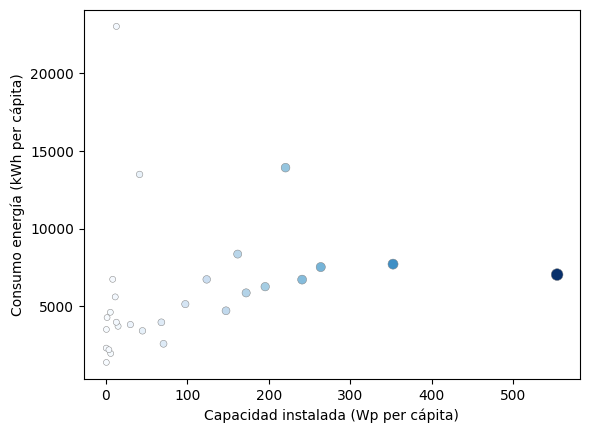

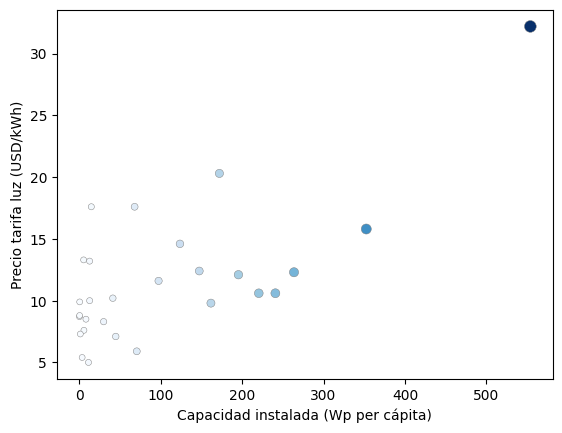

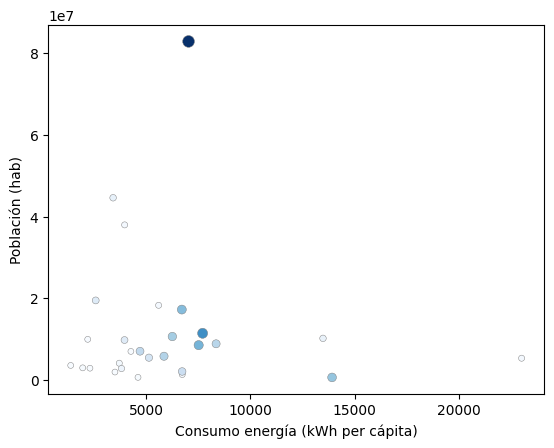

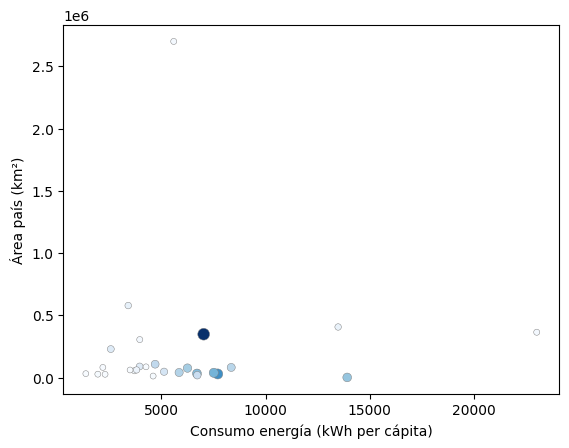

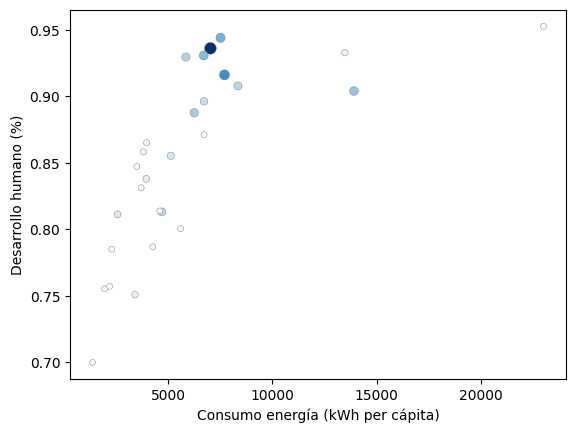

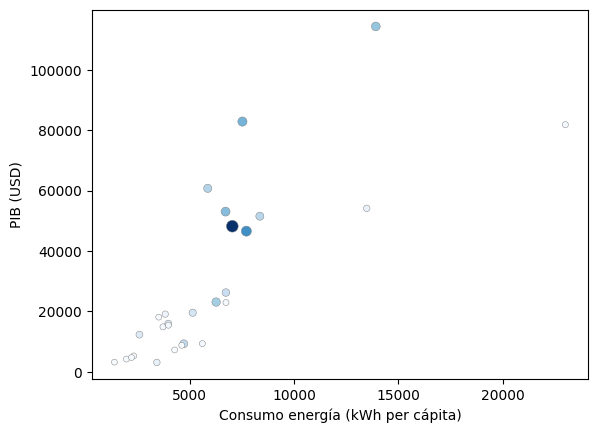

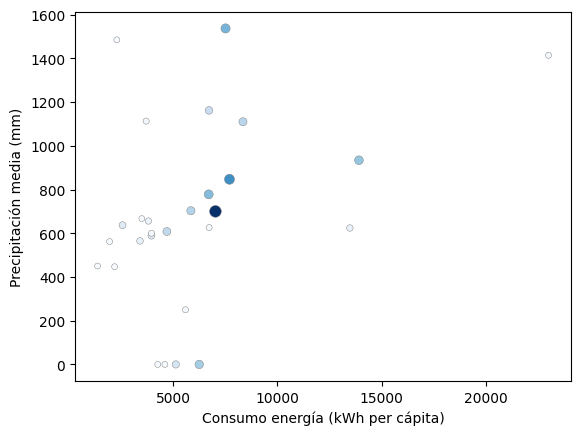

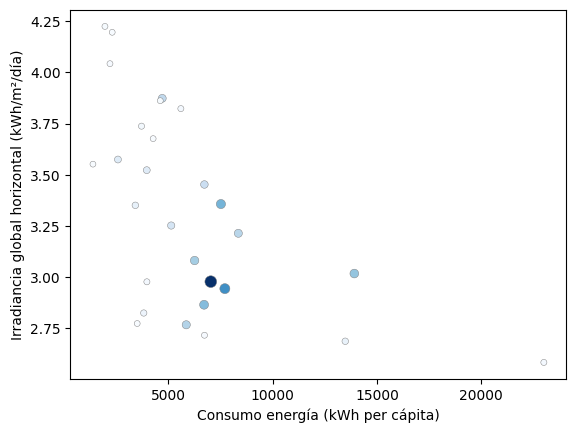

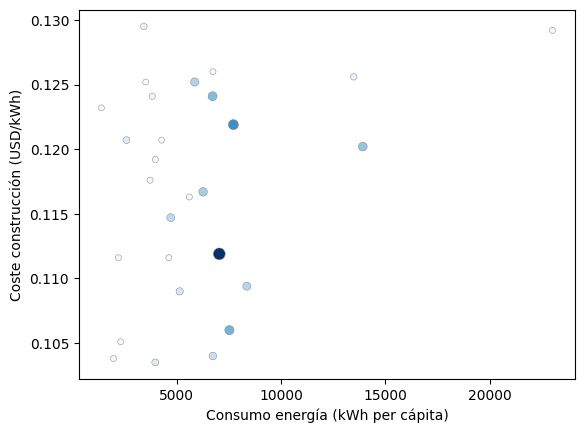

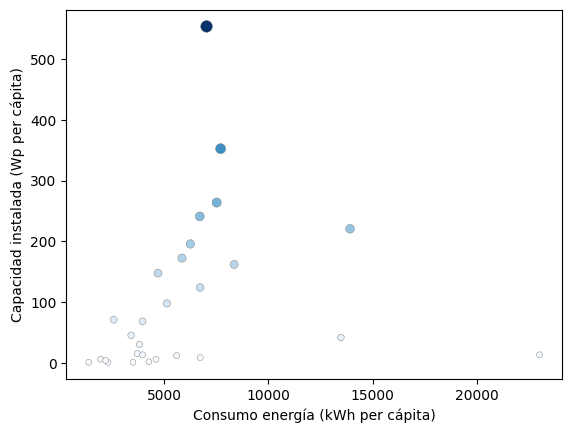

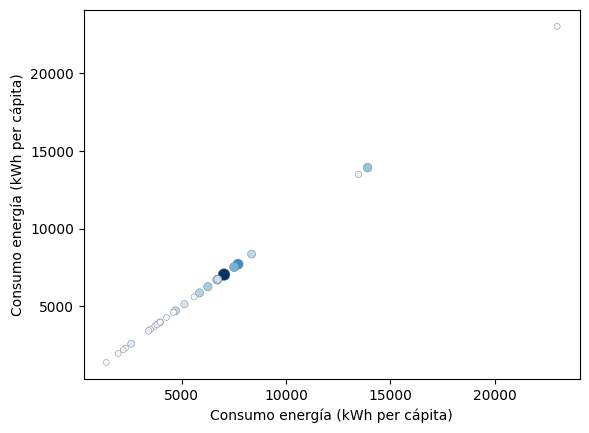

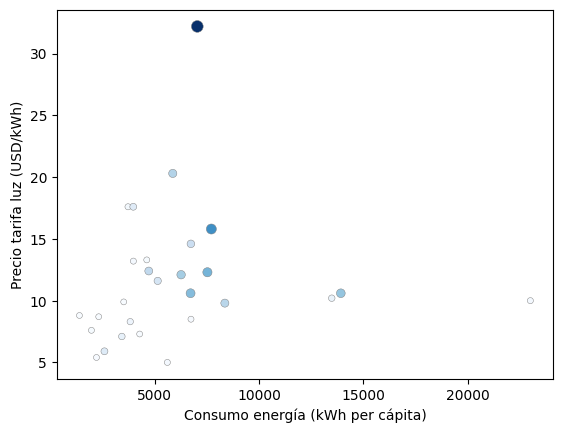

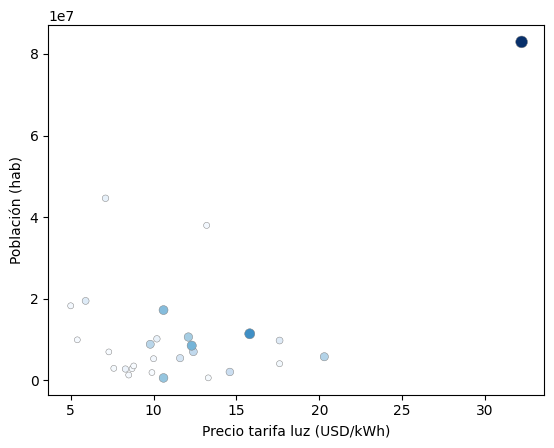

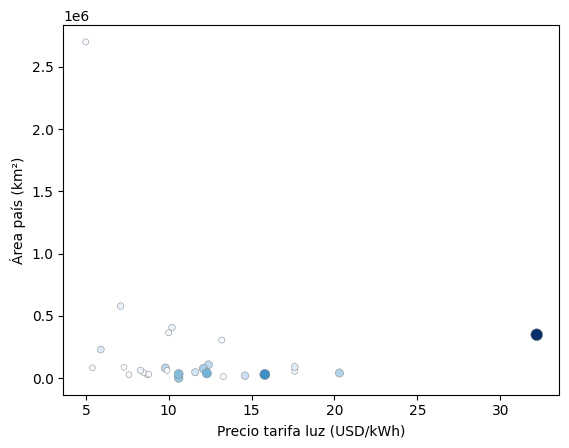

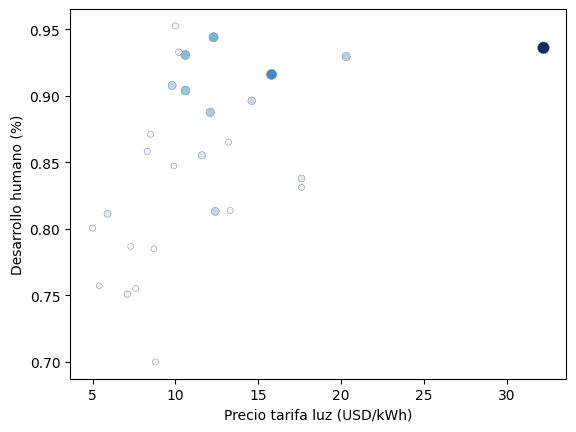

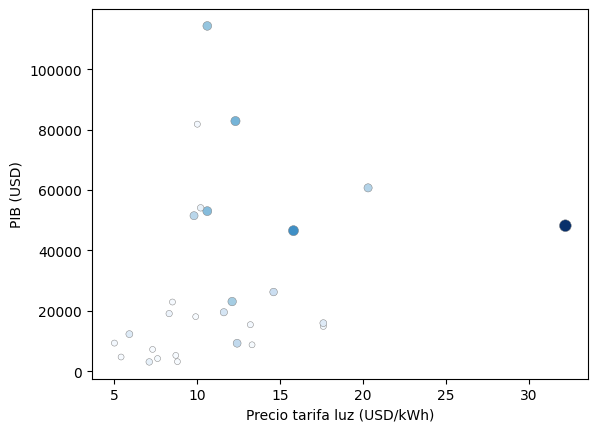

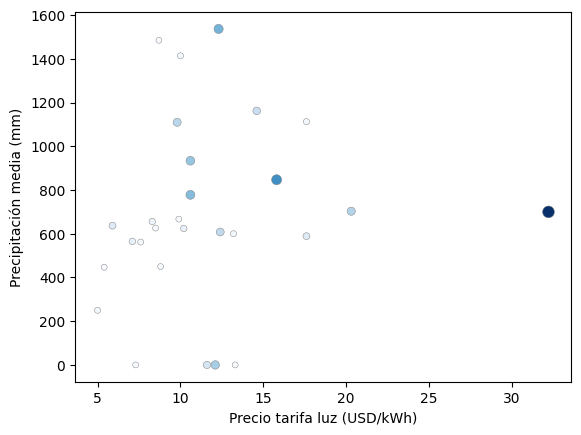

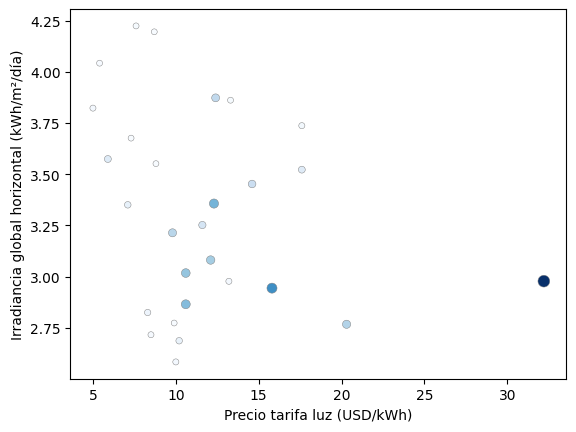

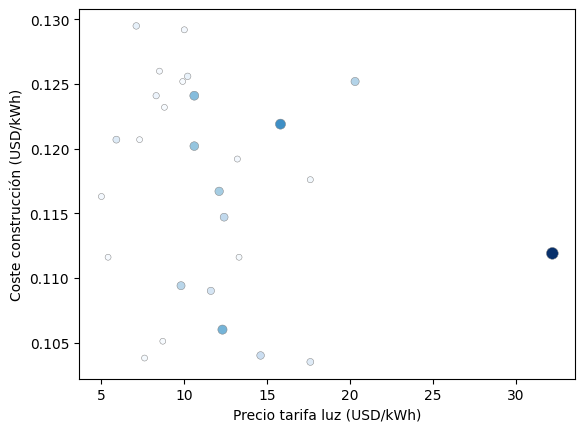

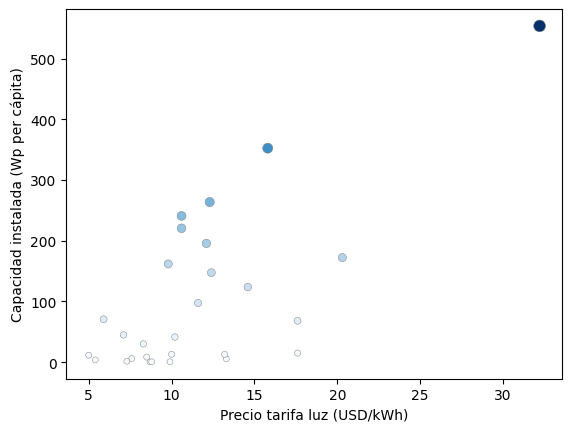

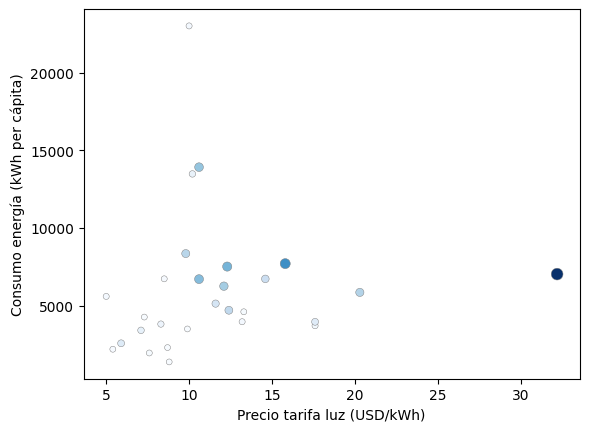

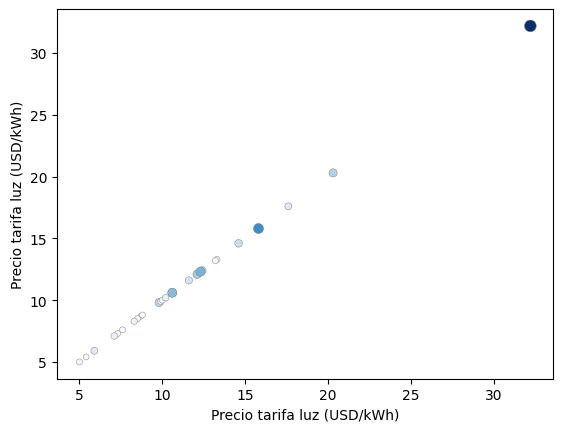

In [100]:
# #Para ver todas las posibles graficas de 4 variables, aunque vamos a tratarla como una de 3
for elemento in df_eu_coste.columns:
    dispersion_4_var(df_eu_coste,elemento,"Capacidad instalada (Wp per cápita)", "Capacidad instalada (Wp per cápita)" )

Comprobación de hipotesis

In [101]:
#Me interesa comprobar las conclusiones a las que he llegado mediante las gráficas
df_eu_capacidad_upper = df_index.sort_values(by = "Capacidad instalada (Wp per cápita)",ascending= False )
df_eu_capacidad_upper_slicing = df_eu_capacidad_upper.head(15)
df_eu_capacidad_upper_slicing
df_eu_capacidad_upper["Capacidad instalada (Wp per cápita)"].median()
df_eu_capacidad_upper["Capacidad instalada (Wp per cápita)"].mean()

df_eu_capacidad_upper.columns

Index(['Población (hab)', 'Área país (km²)', 'Desarrollo humano (%)',
       'PIB (USD)', 'Precipitación media (mm)',
       'Irradiancia global horizontal (kWh/m²/día)',
       'Coste construcción (USD/kWh)', 'Capacidad instalada (Wp per cápita)',
       'Consumo energía (kWh per cápita)', 'Precio tarifa luz (USD/kWh)'],
      dtype='object')

In [102]:
df_eu_capacidad_upper_comprobacion = df_eu_capacidad_upper_slicing.copy()
df_eu_capacidad_upper_comprobacion.drop(columns=[ 'Población (hab)',
                                                  'Área país (km²)',
                                                  'Desarrollo humano (%)',
                                                  'Precipitación media (mm)',
                                                  'Precio tarifa luz (USD/kWh)'], inplace=True)
#Datos para comprobacion
df_eu_capacidad_upper_comprobacion

PIB (USD)  Irradiancia global horizontal (kWh/m²/día)  \
País                                                                        
Germany          48195.579904                                      2.9777   
Belgium          46556.099567                                      2.9436   
Italy            34318.351124                                      4.0721   
Switzerland      82838.929445                                      3.3567   
Malta            30074.741185                                      5.0071   
Greece           20324.253564                                      4.4501   
Netherlands      53024.059213                                      2.8649   
Luxembourg      114340.498742                                      3.0173   
United Kingdom   42491.364435                                      2.5918   
Czech Republic   23078.573487                                      3.0809   
Denmark          60726.466535                                      2.7671   
Austria          51512.905475                                      3.2138   
Bulgaria          9272.629304                                      3.8729   
France           41463.644023                                      3.4825   
Slovenia         26234.022896                                      3.4522   

                Coste construcción (USD/kWh)  \
País                                           
Germany                               0.1119   
Belgium                               0.1219   
Italy                                 0.0673   
Switzerland                           0.1060   
Malta                                 0.0930   
Greece                                0.0861   
Netherlands                           0.1241   
Luxembourg                            0.1202   
United Kingdom                        0.1521   
Czech Republic                        0.1167   
Denmark                               0.1252   
Austria                               0.1094   
Bulgaria                              0.1147   
France                                0.0954   
Slovenia                              0.1040   

                Capacidad instalada (Wp per cápita)  \
País                                                  
Germany                                  553.854467   
Belgium                                  352.440556   
Italy                                    332.940143   
Switzerland                              263.722029   
Malta                                    263.272186   
Greece                                   247.164621   
Netherlands                              240.844751   
Luxembourg                               220.493379   
United Kingdom                           197.145419   
Czech Republic                           195.516623   
Denmark                                  172.144769   
Austria                                  161.749069   
Bulgaria                                 147.432824   
France                                   141.570237   
Slovenia                                 123.731965   

                Consumo energía (kWh per cápita)  
País                                              
Germany                              7035.482975  
Belgium                              7709.123078  
Italy                                5002.406680  
Switzerland                          7520.166025  
Malta                                4924.544019  
Greece                               5062.606422  
Netherlands                          6712.774758  
Luxembourg                          13914.678449  
United Kingdom                       5129.527793  
Czech Republic                       6258.891037  
Denmark                              5858.801536  
Austria                              8355.841952  
Bulgaria                             4708.927458  
France                               6939.521474  
Slovenia                             6727.999302

In [103]:
#Tabla final de comprobación

df_eu_capacidad_upper_comprobacion.loc[df_eu_capacidad_upper_comprobacion["Coste construcción (USD/kWh)"] > 0.10 ].head(5)

PIB (USD)  Irradiancia global horizontal (kWh/m²/día)  \
País                                                                     
Germany       48195.579904                                      2.9777   
Belgium       46556.099567                                      2.9436   
Switzerland   82838.929445                                      3.3567   
Netherlands   53024.059213                                      2.8649   
Luxembourg   114340.498742                                      3.0173   

             Coste construcción (USD/kWh)  \
País                                        
Germany                            0.1119   
Belgium                            0.1219   
Switzerland                        0.1060   
Netherlands                        0.1241   
Luxembourg                         0.1202   

             Capacidad instalada (Wp per cápita)  \
País                                               
Germany                               553.854467   
Belgium                               352.440556   
Switzerland                           263.722029   
Netherlands                           240.844751   
Luxembourg                            220.493379   

             Consumo energía (kWh per cápita)  
País                                           
Germany                           7035.482975  
Belgium                           7709.123078  
Switzerland                       7520.166025  
Netherlands                       6712.774758  
Luxembourg                       13914.678449

## 7. CONCLUSIÓN ANALISIS


La hipótesis inicial era la inversión en plantas solares debido a la alta irradiancia. Está hipótesis, es “falsa” a medias. 
Porque, además de la irradiancia depende de otros parámetros.

Vemos que hay relaciones entre:
- PIB – Desarrollo humano
- PIB – Consumo energético
- PIB – Irradiancia global horizontal
- Irradiancia global horizontal – Coste de construcción


Parámetros decisorios:
-	Coste de construcción 0.10 - 0.13
-	PIB > 42300
-	Consumo energético >5800
-	IGH > 2.75


Vemos que podemos estudiar también por debajo de los 0.10 de coste de construcción junto con alta irradiancia. Para ver cual es el otro escenario.




## 8. ESTUDIO MACHINE LEARNING

In [104]:
from sklearn.cluster import KMeans

Inicialmente vamos a hacer una clasificación, en función a una unica feature: Capacidad instalada. En 5 grupos: Muy baja, baja, media, alta, muy alta.

In [105]:
#Clasificación por cuantiles, mismo numero de paises por franja.
df_index["Clase_cuantiles"] = pd.qcut(df_index["Capacidad instalada (Wp per cápita)"], q=5, labels = [1,2,3,4,5])

In [106]:
#Clasificacion por intervalos uniformes
df_index['Clase_uniformes'] = pd.cut(df_index["Capacidad instalada (Wp per cápita)"], bins=5, labels=[1, 2, 3, 4, 5])

In [107]:
#Clasificación basada en estadisticos
mean = df_index["Capacidad instalada (Wp per cápita)"].mean()
std = df_index["Capacidad instalada (Wp per cápita)"].std()
df_index["Clase_estadisticos"] = pd.cut(df_index["Capacidad instalada (Wp per cápita)"], bins=[-np.inf, mean-std, mean, mean+std, mean+2*std, np.inf], labels=[1, 2, 3, 4, 5])

In [108]:
#Clasificación clustering - KMeans

Reshape_instalada = df_index ["Capacidad instalada (Wp per cápita)"].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5, random_state=42)
df_index["Clase_Kmeans"] = kmeans.fit_predict(Reshape_instalada)

In [109]:
df_index_sorted = df_index.sort_values(by="Capacidad instalada (Wp per cápita)", ascending=True)
df_index_sorted.head(5)

Población (hab)  Área país (km²)  Desarrollo humano (%)  \
País                                                                  
Albania             2866376          27400.0               0.784911   
Moldova             3545883          32890.0               0.699753   
Latvia              1926542          62180.0               0.847143   
Serbia              6982084          87460.0               0.786693   
Azerbaijan          9942334          82670.0               0.756965   

               PIB (USD)  Precipitación media (mm)  \
País                                                 
Albania      5253.630064                    1485.0   
Moldova      3189.355812                     450.0   
Latvia      18088.927252                     667.0   
Serbia       7233.995874                       0.0   
Azerbaijan   4721.178087                     447.0   

            Irradiancia global horizontal (kWh/m²/día)  \
País                                                     
Albania                                         4.1954   
Moldova                                         3.5516   
Latvia                                          2.7733   
Serbia                                          3.6762   
Azerbaijan                                      4.0422   

            Coste construcción (USD/kWh)  Capacidad instalada (Wp per cápita)  \
País                                                                            
Albania                           0.1051                             0.348873   
Moldova                           0.1232                             0.564034   
Latvia                            0.1252                             0.622878   
Serbia                            0.1207                             1.432237   
Azerbaijan                        0.1116                             3.661112   

            Consumo energía (kWh per cápita)  Precio tarifa luz (USD/kWh)  \
País                                                                        
Albania                          2309.366503                          8.7   
Moldova                          1386.234439                          8.8   
Latvia                           3507.404521                          9.9   
Serbia                           4271.744667                          7.3   
Azerbaijan                       2202.393918                          5.4   

           Clase_cuantiles Clase_uniformes Clase_estadisticos  Clase_Kmeans  
País                                                                         
Albania                  1               1                  2             4  
Moldova                  1               1                  2             4  
Latvia                   1               1                  2             4  
Serbia                   1               1                  2             4  
Azerbaijan               1               1                  2             4

In [110]:
#La conclusion es que el Kmeans y el método estadistico son casi iguales.
#Eliminamos el resto de columnas que no sirven
df_index_sorted.drop(columns= ["Clase_cuantiles", "Clase_uniformes", "Clase_estadisticos"], inplace = True)


In [111]:
df_index_sorted

Población (hab)  Área país (km²)  Desarrollo humano (%)  \
País                                                                      
Albania                 2866376          27400.0               0.784911   
Moldova                 3545883          32890.0               0.699753   
Latvia                  1926542          62180.0               0.847143   
Serbia                  6982084          87460.0               0.786693   
Azerbaijan              9942334          82670.0               0.756965   
Montenegro               622345          13450.0               0.813692   
Armenia                 2951776          28470.0               0.755113   
Ireland                 4853506          68890.0               0.938410   
Estonia                 1320884          43470.0               0.871042   
Kazakhstan             18276499        2699700.0               0.800435   
Poland                 37978548         306190.0               0.865075   
Norway                  5314336         365123.0               0.952522   
Croatia                 4089400          55960.0               0.831102   
Belarus                 9485386         202988.0               0.807530   
Lithuania               2789533          62642.0               0.858135   
Sweden                 10183175         407310.0               0.932805   
Ukraine                44622516         579290.0               0.750710   
Turkey                 82319724         769630.0               0.790634   
Portugal               10281762          91606.0               0.847113   
Hungary                 9768785          90530.0               0.837845   
Romania                19473936         230080.0               0.811192   
Cyprus                  1189265           9240.0               0.868784   
Slovakia                5447011          48080.0               0.855200   
Spain                  46723749         499564.0               0.891020   
Slovenia                2067372          20142.0               0.896224   
France                 66987244         547557.0               0.900802   
Bulgaria                7024216         108560.0               0.813006   
Austria                 8847037          82523.0               0.907755   
Denmark                 5797446          41990.0               0.929474   
Czech Republic         10625695          77220.0               0.887561   
United Kingdom         66488991         241930.0               0.921549   
Luxembourg               607728           2430.0               0.903939   
Netherlands            17231017          33690.0               0.930639   
Greece                 10727668         128900.0               0.869934   
Malta                    483530            320.0               0.878187   
Switzerland             8516543          39516.0               0.943998   
Italy                  60431283         294140.0               0.879769   
Belgium                11422068          30280.0               0.916066   
Germany                82927922         349360.0               0.936043   

                    PIB (USD)  Precipitación media (mm)  \
País                                                      
Albania           5253.630064                    1485.0   
Moldova           3189.355812                     450.0   
Latvia           18088.927252                     667.0   
Serbia            7233.995874                       0.0   
Azerbaijan        4721.178087                     447.0   
Montenegro        8760.692286                       0.0   
Armenia           4212.070943                     562.0   
Ireland          78806.431996                    1118.0   
Estonia          22927.744417                     626.0   
Kazakhstan        9331.046950                     250.0   
Poland           15424.046025                     600.0   
Norway           81807.198039                    1414.0   
Croatia          14869.090682                    1113.0   
Belarus           6289.938553                     618.0

In [112]:
#Renombrar las categorias
cluster_labels = {0: 'Alto', 1: 'Bajo', 2: 'Medio', 3: 'Muy alto', 4: 'Muy bajo'}
cluster_valor = {0: '4', 1: '2', 2: '3', 3: '5', 4: '1'}
df_index_sorted['Cluster_valor'] = df_index_sorted['Clase_Kmeans'].map(cluster_valor)
df_index_sorted['Cluster'] = df_index_sorted['Clase_Kmeans'].map(cluster_labels)
df_index_sorted.drop(columns= "Clase_Kmeans", inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10728\333840782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="Blues")


Text(0, 0.5, 'Número de países')

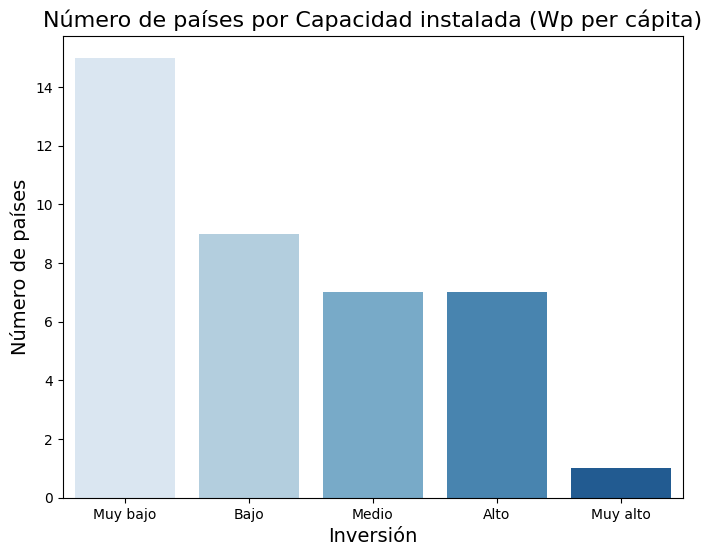

In [113]:
#La conclusion es que el Kmeans y el método estadistico son casi iguales.
#Vamos a ver un diagrama de barras para ver si los datos están desbalanceados.
# Contar las frecuencias de cada categoría en 'Clase_estadisticos'
categoria_counts = df_index_sorted["Cluster"].value_counts()

# Crear una gráfica de barras con Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="Blues")

# Ajustar detalles de la gráfica
plt.title("Número de países por Capacidad instalada (Wp per cápita)", fontsize=16)
plt.xlabel("Inversión", fontsize=14)
plt.ylabel("Número de países", fontsize=14)

TypeError: Legend.__init__() got an unexpected keyword argument 'label'

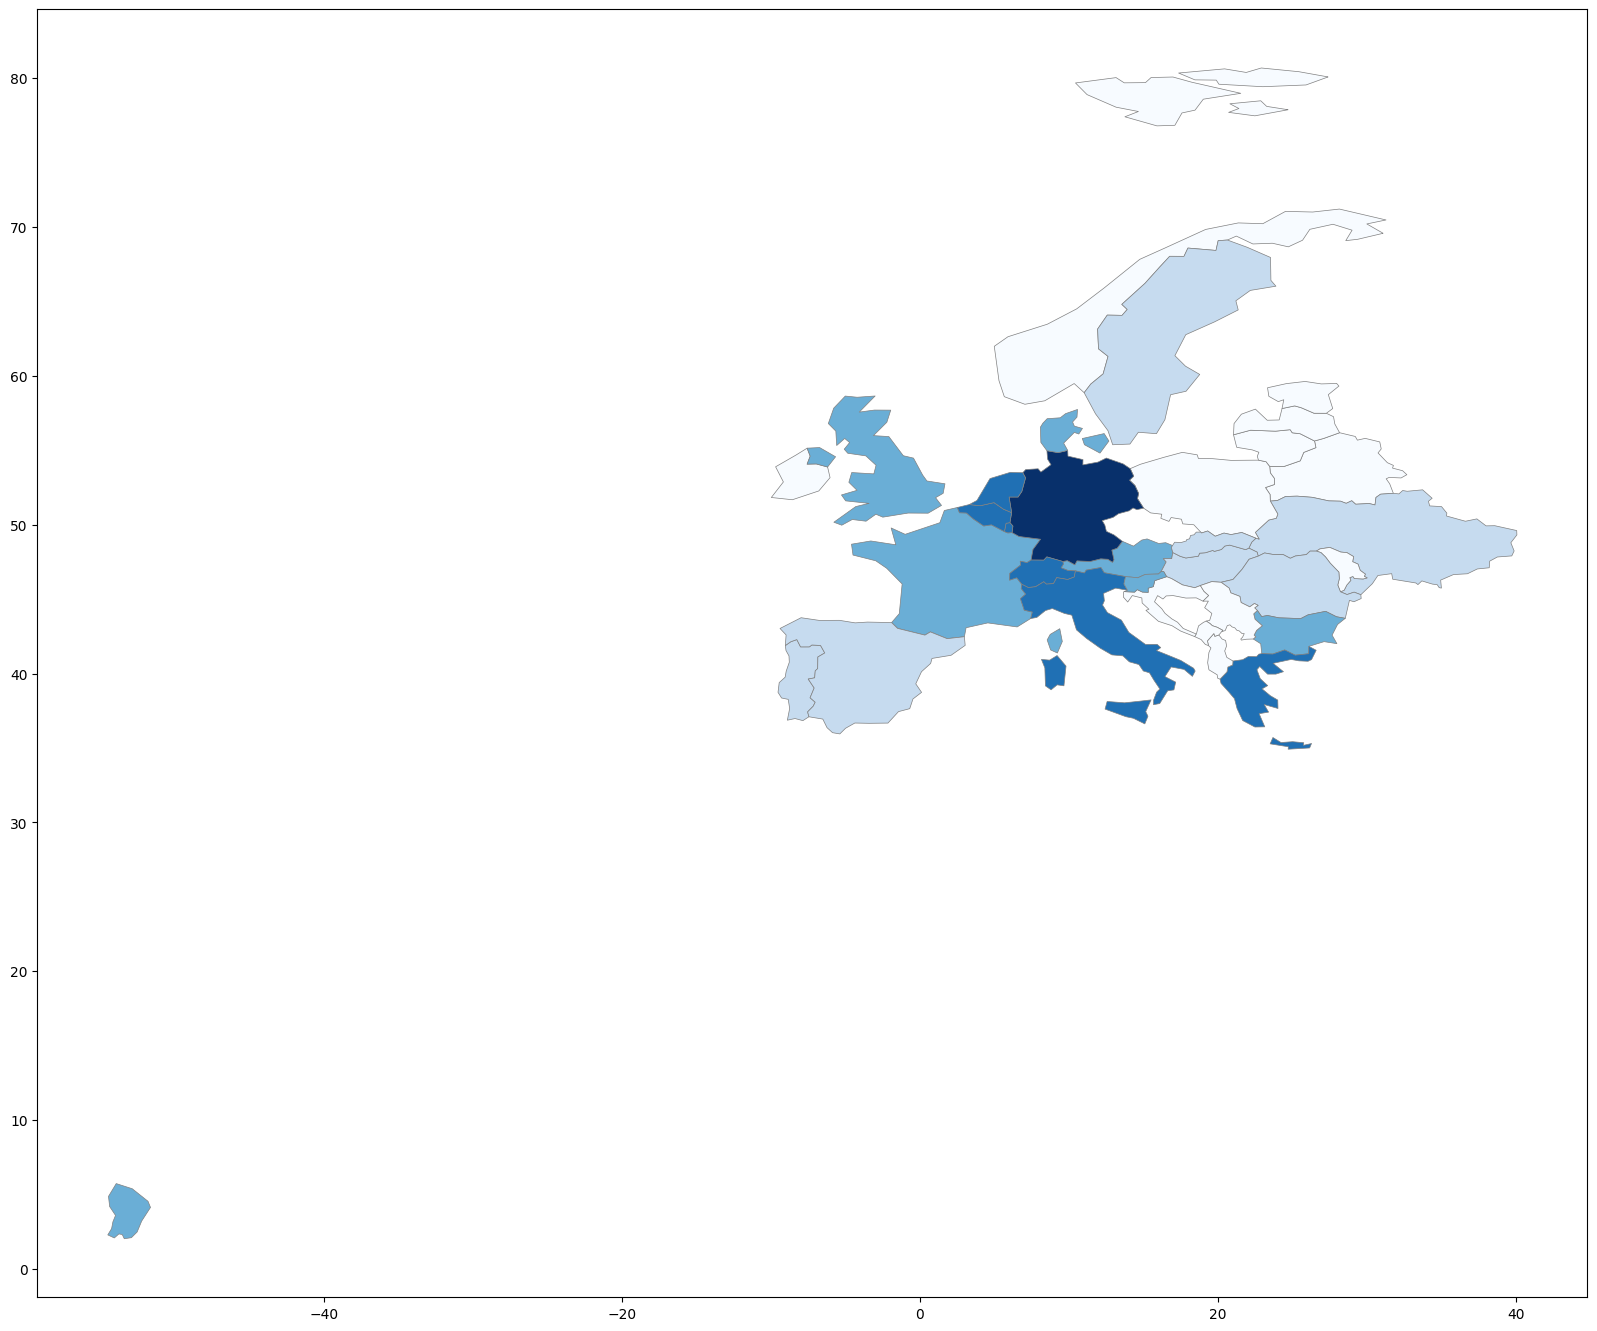

In [114]:
mapa_europa(df_index_sorted,df_sin_index,"Cluster_valor")